In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.special import erf
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.signal import correlate
from scipy.signal import windows
from scipy.fft import fft, ifft, fftfreq
from scipy.linalg import toeplitz
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.stats import linregress
from scipy.special import jn, yn            
from scipy.special import jv, yv
from scipy.special import kv, iv
from scipy.special import gamma, gammainc
from scipy.special import zeta, zetac
from scipy.special import erf, erfc
from scipy.special import expi, loggamma
from scipy.special import comb, perm
from scipy.special import sph_harm, lpmv
from scipy.special import wofz          
import sympy as sp
from sympy import symbols, diff, integrate, simplify
from sympy import sin, cos, exp, log, sqrt
import pandas as pd



In [50]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')


In [3]:
train

,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Y1,Y2
0,0,0.207366,-0.159951,-0.634176,-0.580962,-0.266505,0.060173,-0.475257,-1.486516,-0.332594,-0.671466,-0.226149,-0.187624,-0.780237,-0.785965,-0.935902,-0.310081
1,1,0.188828,-0.265508,0.042143,-0.550442,-0.132319,-0.185219,0.028295,0.093210,-0.518139,-0.251917,-0.347845,-0.359069,-0.161254,0.020401,-0.089707,-0.305374
2,2,-0.144261,-0.577142,-0.214634,-0.747391,-0.184255,-0.464831,-0.085181,0.700449,-0.603438,0.197773,-0.566696,-0.580799,0.202726,0.135261,-0.077855,-0.631485
3,3,0.208982,-0.310449,0.513708,-0.562868,0.742308,-0.305487,0.762246,1.363020,-0.384575,0.525556,-0.348514,-0.428099,0.548993,0.471031,0.941271,-0.535212
4,4,0.093320,-0.358156,0.173188,-0.687296,-0.161461,-0.116062,-0.245748,0.863372,-0.655588,-0.263358,-0.557428,-0.481214,0.083602,0.003087,-0.039582,-0.490561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,80000,-0.339802,-0.372094,-0.120952,-0.363438,0.266299,-0.222866,-0.000358,0.470755,-0.412086,-0.332426,-0.374358,-0.251086,-0.058820,0.312828,-0.564065,-0.154864
79996,80001,-0.421921,-0.222554,-0.689585,-0.512266,-0.206562,-0.494450,-0.197705,-0.566908,-0.570731,-1.093729,-0.382964,-0.249580,-0.446410,-0.527049,0.031323,-0.474736
79997,80002,-0.467038,-0.282018,0.010707,-0.589594,0.067635,-0.410820,0.032695,-0.506164,-0.513340,-0.871582,-0.345584,-0.402364,-0.372984,-0.419894,-0.213572,-0.503083
79998,80003,-0.369710,-0.322384,-0.540326,-0.563206,-0.568736,-0.550024,-0.339077,-0.903734,-0.212600,-0.571418,-0.223712,-0.307187,-1.057527,-2.012514,-0.600713,-0.233209


In [52]:
-train['Y1']

0        0.935902
1        0.089707
2        0.077855
3       -0.941271
4        0.039582
           ...   
79995    0.564065
79996   -0.031323
79997    0.213572
79998    0.600713
79999    0.518910
Name: Y1, Length: 80000, dtype: float64

In [54]:
# Calculate correlation between C and Y1
correlation = (-train['Y1']).corr(train['Y2'])
print(f"Correlation between C and Y1: {correlation:.4f}")

Correlation between C and Y1: 0.0643


In [8]:
train['A'].max()
print(train['A'].mean())
print(train['A'].std())

0.06897902942587102
1.078270576292425


In [5]:
test

,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,15992,95996,-0.453361,-0.196443,-0.050846,-0.447012,-0.077724,-0.592894,-0.161817,-0.511905,-0.596177,-0.442584,-0.216181,0.122004,-0.697862,0.104958
15992,15993,95997,-0.481709,-0.258110,-0.454017,-0.603110,0.040541,-0.508827,-0.062558,-0.437095,-0.662719,-0.329388,-0.429567,-0.345853,0.092401,-0.273531
15993,15994,95998,-0.457018,-0.300467,0.403098,-0.555525,0.255084,-0.561159,0.126289,0.315079,-0.548791,0.373037,-0.210124,0.131684,0.659701,0.128788
15994,15995,95999,-0.366164,-0.059930,0.541362,-0.505980,0.351848,-0.450031,-0.220432,0.985248,-0.513131,0.912360,-0.439541,0.741077,1.317468,0.268901


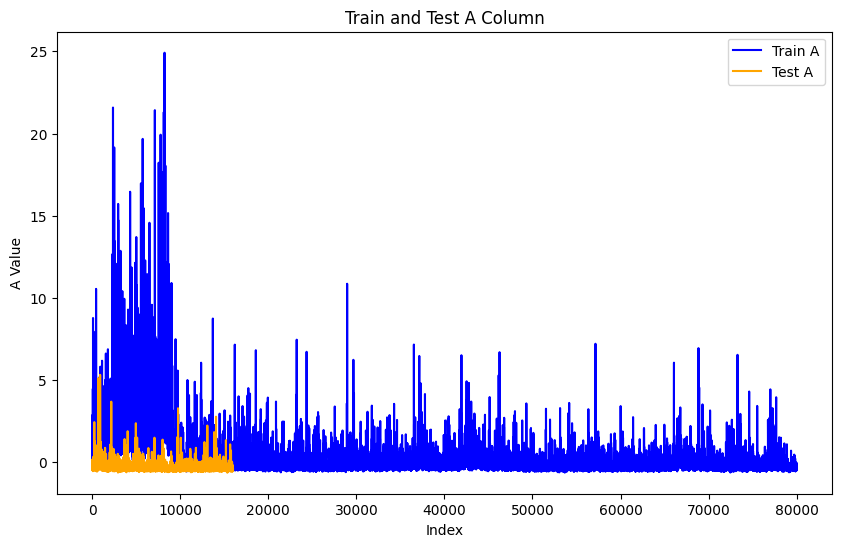

In [6]:
#plot A column 
plt.figure(figsize=(10, 6))
plt.plot(train['A'], label='Train A', color='blue')
plt.plot(test['A'], label='Test A', color='orange')
plt.xlabel('Index')
plt.ylabel('A Value')
plt.title('Train and Test A Column')
plt.legend()
plt.show()

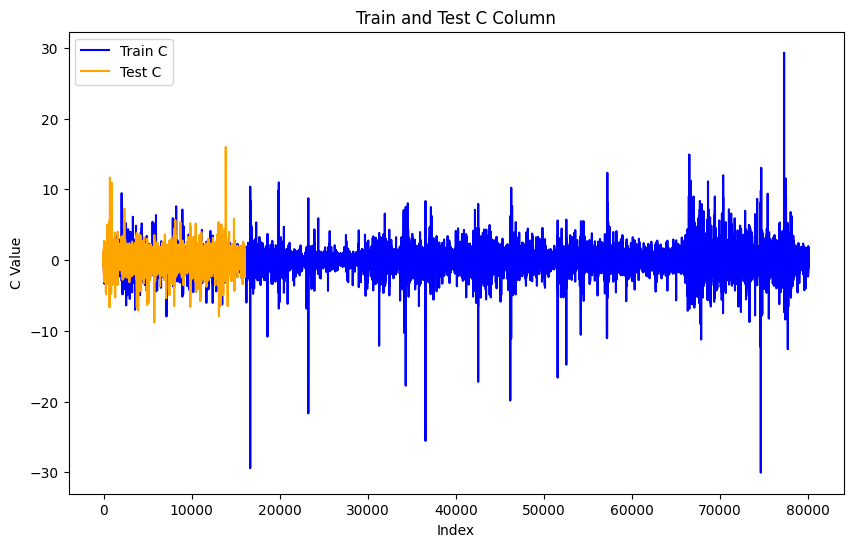

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(train['C'], label='Train C', color='blue')
plt.plot(test['C'], label='Test C', color='orange')
plt.xlabel('Index')
plt.ylabel('C Value')
plt.title('Train and Test C Column')
plt.legend()
plt.show()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    80000 non-null  int64  
 1   A       80000 non-null  float64
 2   B       80000 non-null  float64
 3   C       80000 non-null  float64
 4   D       80000 non-null  float64
 5   E       80000 non-null  float64
 6   F       80000 non-null  float64
 7   G       80000 non-null  float64
 8   H       80000 non-null  float64
 9   I       80000 non-null  float64
 10  J       80000 non-null  float64
 11  K       80000 non-null  float64
 12  L       80000 non-null  float64
 13  M       80000 non-null  float64
 14  N       80000 non-null  float64
 15  Y1      80000 non-null  float64
 16  Y2      80000 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 10.4 MB


In [ ]:
def zscore_normalize(series):
    mean = series.mean()
    std = series.std()
    normalized = (series - mean) / std
    return normalized, mean, std

def zscore_denormalize(normalized_series, mean, std):
    return normalized_series * std + mean
train['A_norm'], a_mean, a_std = zscore_normalize(train['A'])

train['A_denorm'] = zscore_denormalize(train['A_norm'], a_mean, a_std)

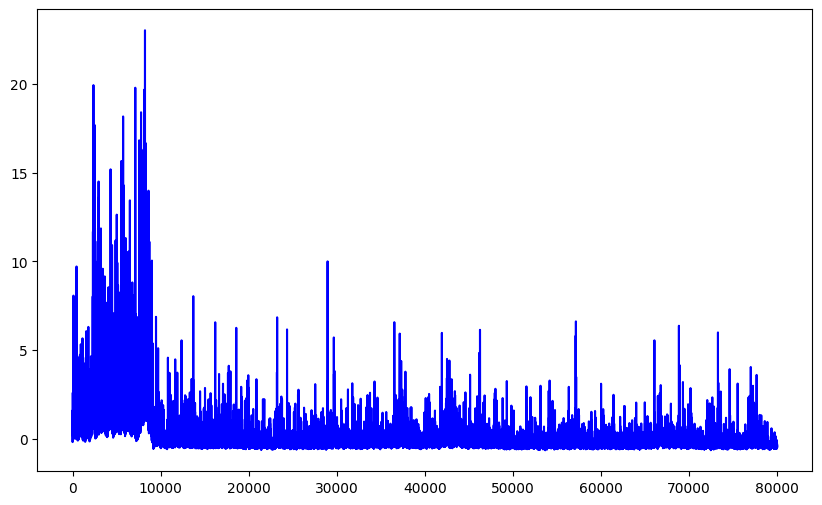

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(train['A_norm'], label='Train A', color='blue')

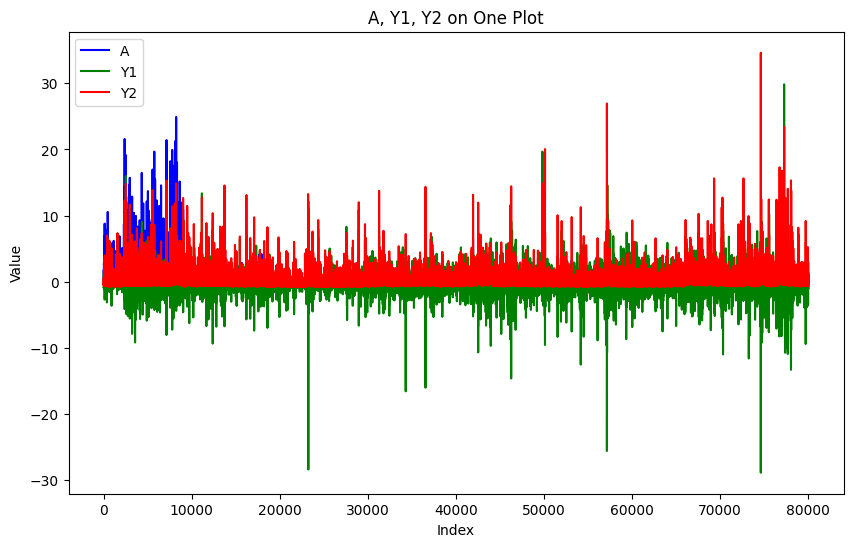

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(train['A'], label='A', color='blue')
plt.plot(train['Y1'], label='Y1', color='green')
plt.plot(train['Y2'], label='Y2', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('A, Y1, Y2 on One Plot')
plt.legend()
plt.show()

In [49]:
import pandas as pd
from statsmodels.tsa.stattools import coint
score, pvalue, _ = coint(train['Y2'], train['Y1'])

print("Cointegration test p-value:", pvalue)

Cointegration test p-value: 0.0


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
cols_for_coint = ['A', 'B','C', 'Y1', 'Y2']
data_for_coint = train[cols_for_coint]
data_for_coint = data_for_coint.loc[:, data_for_coint.std() > 0]

johansen_test = coint_johansen(data_for_coint, det_order=0, k_ar_diff=1)
print("Trace Statistics:", johansen_test.lr1)
print("Critical Values (5%):", johansen_test.cvt[:, 1])  # column index 1 → 5% level

print("Max-Eigen Statistics:", johansen_test.lr2)
print("Critical Values (5%):", johansen_test.cvm[:, 1])  # 5% level
for i in range(len(johansen_test.lr1)):
    if johansen_test.lr1[i] > johansen_test.cvt[i, 1]:
        print(f"✅ Reject null hypothesis of ≤ {i} cointegration vectors at 5% level.")
    else:
        print(f"❌ Cannot reject null hypothesis of ≤ {i} cointegration vectors at 5% level.")


Trace Statistics: [87611.43847336 54506.70783237 21964.74603341 10921.15109236
  2818.68178645]
Critical Values (5%): [69.8189 47.8545 29.7961 15.4943  3.8415]
Max-Eigen Statistics: [33104.73064099 32541.96179896 11043.59494105  8102.46930591
  2818.68178645]
Critical Values (5%): [33.8777 27.5858 21.1314 14.2639  3.8415]
✅ Reject null hypothesis of ≤ 0 cointegration vectors at 5% level.
✅ Reject null hypothesis of ≤ 1 cointegration vectors at 5% level.
✅ Reject null hypothesis of ≤ 2 cointegration vectors at 5% level.
✅ Reject null hypothesis of ≤ 3 cointegration vectors at 5% level.
✅ Reject null hypothesis of ≤ 4 cointegration vectors at 5% level.


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, coint
results = []
for col in train.columns:
    if col == "Y1" and col == "Y2": 
        continue

    feature = train[col]
    target = train["Y1"]
    corr = feature.corr(target)
    adf_feature = adfuller(feature.dropna())[1]  # p-value
    adf_target = adfuller(target.dropna())[1]
    coint_test = coint(feature, target)
    coint_p = coint_test[1]

    results.append({
        "Feature": col,
        "Correlation_with_Y1": corr,
        "ADF_p_Feature": adf_feature,
        "ADF_p_Y1": adf_target,
        "Cointegration_p": coint_p
    })

# Convert to DataFrame for easy view
results_df = pd.DataFrame(results)

print(results_df)


/var/folders/f9/72n1pd6d1n7bwzskjwp2b1k80000gn/T/ipykernel_43490/1950312861.py:19: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_test = coint(feature, target)


     Feature  Correlation_with_Y1  ADF_p_Feature  ADF_p_Y1  Cointegration_p
0       time            -0.005645   6.131874e-01       0.0     9.851350e-01
1          A            -0.006105   9.711617e-20       0.0     1.208690e-18
2          B            -0.094995   2.493889e-29       0.0     2.834783e-28
3          C             0.703823   0.000000e+00       0.0     0.000000e+00
4          D            -0.057097   0.000000e+00       0.0     0.000000e+00
5          E             0.684297   0.000000e+00       0.0     0.000000e+00
6          F            -0.073191   2.047646e-30       0.0     1.378666e-29
7          G             0.814568   0.000000e+00       0.0     0.000000e+00
8          H             0.707560   0.000000e+00       0.0     0.000000e+00
9          I            -0.090226   0.000000e+00       0.0     0.000000e+00
10         J             0.723921   0.000000e+00       0.0     0.000000e+00
11         K            -0.080196   7.556750e-30       0.0     5.666762e-29
12         L

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, coint
results1 = []
for col in train.columns:
    if col == "Y1" and col == "Y2": 
        continue

    feature = train[col]
    target = train["Y2"]

    # 1. Correlation
    corr = feature.corr(target)

    # 2. Stationarity (ADF test)
    adf_feature = adfuller(feature.dropna())[1]  # p-value
    adf_target = adfuller(target.dropna())[1]

    # 3. Cointegration (Engle-Granger test)
    coint_test = coint(feature, target)
    coint_p = coint_test[1]

    results1.append({
        "Feature": col,
        "Correlation_with_Y2": corr,
        "ADF_p_Feature": adf_feature,
        "ADF_p_Y2": adf_target,
        "Cointegration_p": coint_p
    })
results_df = pd.DataFrame(results1)

print(results_df)

/var/folders/f9/72n1pd6d1n7bwzskjwp2b1k80000gn/T/ipykernel_43490/3478339603.py:19: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_test = coint(feature, target)


     Feature  Correlation_with_Y2  ADF_p_Feature  ADF_p_Y2  Cointegration_p
0       time             0.059143   6.131874e-01       0.0     9.553359e-01
1          A             0.484746   9.711617e-20       0.0     1.066453e-14
2          B             0.581859   2.493889e-29       0.0     1.330696e-27
3          C            -0.073009   0.000000e+00       0.0     0.000000e+00
4          D             0.611063   0.000000e+00       0.0     1.034963e-28
5          E            -0.044583   0.000000e+00       0.0     0.000000e+00
6          F             0.496667   2.047646e-30       0.0     2.716042e-29
7          G            -0.060187   0.000000e+00       0.0     0.000000e+00
8          H            -0.086976   0.000000e+00       0.0     0.000000e+00
9          I             0.508347   0.000000e+00       0.0     0.000000e+00
10         J            -0.097986   0.000000e+00       0.0     0.000000e+00
11         K             0.599183   7.556750e-30       0.0     1.195676e-28
12         L

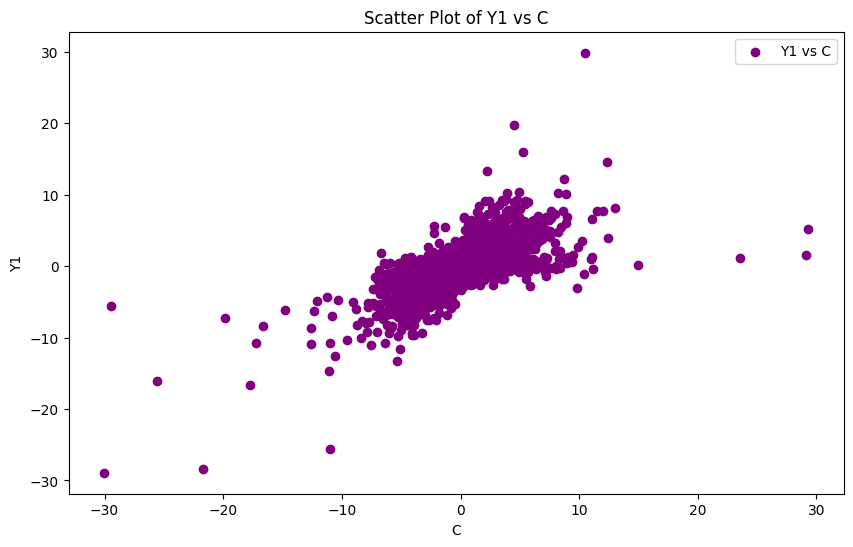

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(train['C'], train['Y1'], label='Y1 vs C', color='purple')
plt.xlabel('C')
plt.ylabel('Y1')
plt.title('Scatter Plot of Y1 vs C')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Conv1D, BatchNormalization, Activation, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


class TCN_LSTM_Model:
    def __init__(self, sequence_length=20, tcn_filters=64, lstm_units=50, dropout_rate=0.2):
        self.sequence_length = sequence_length
        self.tcn_filters = tcn_filters
        self.lstm_units = lstm_units
        self.dropout_rate = dropout_rate
        self.model = None
        self.feature_scaler = StandardScaler()
        self.target_scaler = StandardScaler()
        self.feature_columns = ['A', 'B', 'D', 'F', 'I', 'K', 'L']
        self.target_column = 'Y2'
        
    def create_tcn_block(self, inputs, filters, kernel_size, dilation_rate):
        conv1 = Conv1D(filters=filters, 
                      kernel_size=kernel_size, 
                      dilation_rate=dilation_rate, 
                      padding='causal')(inputs)
        conv1 = BatchNormalization()(conv1)
        conv1 = Activation('relu')(conv1)
        conv1 = Dropout(self.dropout_rate)(conv1)
        
        # Second convolution
        conv2 = Conv1D(filters=filters, 
                      kernel_size=kernel_size, 
                      dilation_rate=dilation_rate, 
                      padding='causal')(conv1)
        conv2 = BatchNormalization()(conv2)
        conv2 = Activation('relu')(conv2)
        conv2 = Dropout(self.dropout_rate)(conv2)
        
        # Residual connection
        if inputs.shape[-1] != filters:
            residual = Conv1D(filters=filters, kernel_size=1, padding='same')(inputs)
        else:
            residual = inputs
            
        output = Add()([conv2, residual])
        output = Activation('relu')(output)
        
        return output
    
    def build_model(self, n_features):
        """Build the TCN-LSTM model architecture"""
        inputs = Input(shape=(self.sequence_length, n_features))
        
        # TCN layers with increasing dilation rates
        tcn = self.create_tcn_block(inputs, self.tcn_filters, kernel_size=3, dilation_rate=1)
        tcn = self.create_tcn_block(tcn, self.tcn_filters, kernel_size=3, dilation_rate=2)
        tcn = self.create_tcn_block(tcn, self.tcn_filters, kernel_size=3, dilation_rate=4)
        tcn = self.create_tcn_block(tcn, self.tcn_filters, kernel_size=3, dilation_rate=8)
        
        # LSTM layers
        lstm1 = LSTM(self.lstm_units, return_sequences=True, dropout=self.dropout_rate)(tcn)
        lstm2 = LSTM(self.lstm_units//2, return_sequences=False, dropout=self.dropout_rate)(lstm1)
        
        # Dense layers for final prediction
        dense1 = Dense(32, activation='relu')(lstm2)
        dense1 = Dropout(self.dropout_rate)(dense1)
        dense2 = Dense(16, activation='relu')(dense1)
        dense2 = Dropout(self.dropout_rate)(dense2)
        output = Dense(1, activation='linear')(dense2)
        
        self.model = Model(inputs=inputs, outputs=output)
        
        # Compile model
        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae', 'mse']
        )
        
        return self.model
    
    def create_sequences(self, data, target=None, is_training=True):
        """Create sequences for time series prediction"""
        X_sequences = []
        y_sequences = []
        
        for i in range(self.sequence_length, len(data)):
            # Get sequence of features
            X_sequences.append(data[i-self.sequence_length:i])
            
            # Get target value (only for training)
            if is_training and target is not None:
                y_sequences.append(target[i])
        
        X_sequences = np.array(X_sequences)
        
        if is_training and target is not None:
            y_sequences = np.array(y_sequences)
            return X_sequences, y_sequences
        else:
            return X_sequences
    
    def prepare_data(self, train_df, test_df=None):
        """Prepare and scale the data"""
        # Extract features and target from training data
        X_train = train_df[self.feature_columns].values
        y_train = train_df[self.target_column].values.reshape(-1, 1)
        
        # Scale the data
        X_train_scaled = self.feature_scaler.fit_transform(X_train)
        y_train_scaled = self.target_scaler.fit_transform(y_train)
        
        # Create sequences for training
        X_train_seq, y_train_seq = self.create_sequences(
            X_train_scaled, 
            y_train_scaled.flatten(), 
            is_training=True
        )
        
        result = {
            'X_train': X_train_seq,
            'y_train': y_train_seq
        }
        
        # Prepare test data if provided
        if test_df is not None:
            X_test = test_df[self.feature_columns].values
            X_test_scaled = self.feature_scaler.transform(X_test)
            X_test_seq = self.create_sequences(X_test_scaled, is_training=False)
            result['X_test'] = X_test_seq
            
        return result
    
    def train(self, train_df, validation_split=0.2, epochs=100, batch_size=32, verbose=1):
        """Train the TCN-LSTM model"""
        # Prepare data
        data = self.prepare_data(train_df)
        X_train, y_train = data['X_train'], data['y_train']
        
        # Build model
        n_features = len(self.feature_columns)
        self.build_model(n_features)
        
        # Print model summary
        if verbose:
            print("Model Architecture:")
            self.model.summary()
        
        # Define callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=15,
                restore_best_weights=True,
                verbose=1
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=8,
                min_lr=1e-7,
                verbose=1
            )
        ]
        
        # Train the model
        history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=validation_split,
            callbacks=callbacks,
            verbose=verbose
        )
        
        return history
    
    def predict(self, test_df):
        """Make predictions on test data"""
        if self.model is None:
            raise ValueError("Model must be trained before making predictions")
        
        # Prepare test data
        X_test = test_df[self.feature_columns].values
        X_test_scaled = self.feature_scaler.transform(X_test)
        X_test_seq = self.create_sequences(X_test_scaled, is_training=False)
        
        # Make predictions
        y_pred_scaled = self.model.predict(X_test_seq, verbose=0)
        
        # Inverse transform predictions
        y_pred = self.target_scaler.inverse_transform(y_pred_scaled)
        
        return y_pred.flatten()
    
    def evaluate_model(self, train_df, plot_results=True):
        """Evaluate model performance on training data"""
        # Prepare data for evaluation
        data = self.prepare_data(train_df)
        X_train, y_train = data['X_train'], data['y_train']
        
        # Make predictions on training data
        y_pred_scaled = self.model.predict(X_train, verbose=0)
        y_pred = self.target_scaler.inverse_transform(y_pred_scaled).flatten()
        y_true = self.target_scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
        
        # Calculate metrics
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        
        print(f"Training Performance Metrics:")
        print(f"MSE: {mse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R²: {r2:.4f}")
        
        if plot_results:
            plt.figure(figsize=(12, 8))
            
            # Plot actual vs predicted
            plt.subplot(2, 2, 1)
            plt.scatter(y_true, y_pred, alpha=0.5)
            plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
            plt.xlabel('Actual Y1')
            plt.ylabel('Predicted Y1')
            plt.title(f'Actual vs Predicted (R² = {r2:.3f})')
            
            # Plot time series
            plt.subplot(2, 2, 2)
            plt.plot(y_true[:200], label='Actual', alpha=0.7)
            plt.plot(y_pred[:200], label='Predicted', alpha=0.7)
            plt.xlabel('Time Steps')
            plt.ylabel('Y1 Values')
            plt.title('Time Series Comparison (First 200 points)')
            plt.legend()
            
            # Plot residuals
            plt.subplot(2, 2, 3)
            residuals = y_true - y_pred
            plt.scatter(y_pred, residuals, alpha=0.5)
            plt.axhline(y=0, color='r', linestyle='--')
            plt.xlabel('Predicted Y1')
            plt.ylabel('Residuals')
            plt.title('Residual Plot')
            
            # Plot residual distribution
            plt.subplot(2, 2, 4)
            plt.hist(residuals, bins=50, alpha=0.7, edgecolor='black')
            plt.xlabel('Residuals')
            plt.ylabel('Frequency')
            plt.title('Residual Distribution')
            
            plt.tight_layout()
            plt.show()
        
        return {
            'mse': mse,
            'mae': mae, 
            'rmse': rmse,
            'r2': r2,
            'predictions': y_pred,
            'actual': y_true
        }
    
    def plot_training_history(self, history):
        """Plot training history"""
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='Training MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title('Model MAE')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# Example usage:

# Initialize the model
tcn_lstm = TCN_LSTM_Model(
    sequence_length=20,    # Look back 20 time steps
    tcn_filters=64,        # TCN filter size
    lstm_units=50,         # LSTM units
    dropout_rate=0.2       # Dropout for regularization
)

# Train the model
history = tcn_lstm.train(
    train_df=train,        # Your training dataframe
    validation_split=0.2,  # 20% for validation
    epochs=100,            # Maximum epochs
    batch_size=32,         # Batch size
    verbose=1              # Show training progress
)

# Plot training history
tcn_lstm.plot_training_history(history)

# Evaluate model performance
evaluation_results = tcn_lstm.evaluate_model(train, plot_results=True)

# Make predictions on test data
test_predictions = tcn_lstm.predict(test)

# Add predictions to test dataframe
test['Y1_predicted'] = np.nan
test.iloc[tcn_lstm.sequence_length:, test.columns.get_loc('Y1_predicted')] = test_predictions

print(f"Test predictions shape: {test_predictions.shape}")
print(f"Sample predictions: {test_predictions[:10]}")


In [14]:
train_new  = pd.read_csv("train_new.csv")
test_new  = pd.read_csv("test_new.csv")

In [18]:
train

,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Y1,Y2
0,0,0.207366,-0.159951,-0.634176,-0.580962,-0.266505,0.060173,-0.475257,-1.486516,-0.332594,-0.671466,-0.226149,-0.187624,-0.780237,-0.785965,-0.935902,-0.310081
1,1,0.188828,-0.265508,0.042143,-0.550442,-0.132319,-0.185219,0.028295,0.093210,-0.518139,-0.251917,-0.347845,-0.359069,-0.161254,0.020401,-0.089707,-0.305374
2,2,-0.144261,-0.577142,-0.214634,-0.747391,-0.184255,-0.464831,-0.085181,0.700449,-0.603438,0.197773,-0.566696,-0.580799,0.202726,0.135261,-0.077855,-0.631485
3,3,0.208982,-0.310449,0.513708,-0.562868,0.742308,-0.305487,0.762246,1.363020,-0.384575,0.525556,-0.348514,-0.428099,0.548993,0.471031,0.941271,-0.535212
4,4,0.093320,-0.358156,0.173188,-0.687296,-0.161461,-0.116062,-0.245748,0.863372,-0.655588,-0.263358,-0.557428,-0.481214,0.083602,0.003087,-0.039582,-0.490561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,80000,-0.339802,-0.372094,-0.120952,-0.363438,0.266299,-0.222866,-0.000358,0.470755,-0.412086,-0.332426,-0.374358,-0.251086,-0.058820,0.312828,-0.564065,-0.154864
79996,80001,-0.421921,-0.222554,-0.689585,-0.512266,-0.206562,-0.494450,-0.197705,-0.566908,-0.570731,-1.093729,-0.382964,-0.249580,-0.446410,-0.527049,0.031323,-0.474736
79997,80002,-0.467038,-0.282018,0.010707,-0.589594,0.067635,-0.410820,0.032695,-0.506164,-0.513340,-0.871582,-0.345584,-0.402364,-0.372984,-0.419894,-0.213572,-0.503083
79998,80003,-0.369710,-0.322384,-0.540326,-0.563206,-0.568736,-0.550024,-0.339077,-0.903734,-0.212600,-0.571418,-0.223712,-0.307187,-1.057527,-2.012514,-0.600713,-0.233209


In [19]:
train_new

,O,P
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,0.0
4,NaN,NaN
...,...,...
79995,NaN,NaN
79996,NaN,0.0
79997,NaN,NaN
79998,NaN,NaN


In [30]:
train = pd.read_csv("train.csv")
train = pd.concat([train, train_new], axis=1)
train

,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Y1,Y2,O,P
0,0,0.207366,-0.159951,-0.634176,-0.580962,-0.266505,0.060173,-0.475257,-1.486516,-0.332594,-0.671466,-0.226149,-0.187624,-0.780237,-0.785965,-0.935902,-0.310081,NaN,NaN
1,1,0.188828,-0.265508,0.042143,-0.550442,-0.132319,-0.185219,0.028295,0.093210,-0.518139,-0.251917,-0.347845,-0.359069,-0.161254,0.020401,-0.089707,-0.305374,NaN,NaN
2,2,-0.144261,-0.577142,-0.214634,-0.747391,-0.184255,-0.464831,-0.085181,0.700449,-0.603438,0.197773,-0.566696,-0.580799,0.202726,0.135261,-0.077855,-0.631485,NaN,NaN
3,3,0.208982,-0.310449,0.513708,-0.562868,0.742308,-0.305487,0.762246,1.363020,-0.384575,0.525556,-0.348514,-0.428099,0.548993,0.471031,0.941271,-0.535212,NaN,0.0
4,4,0.093320,-0.358156,0.173188,-0.687296,-0.161461,-0.116062,-0.245748,0.863372,-0.655588,-0.263358,-0.557428,-0.481214,0.083602,0.003087,-0.039582,-0.490561,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,80000,-0.339802,-0.372094,-0.120952,-0.363438,0.266299,-0.222866,-0.000358,0.470755,-0.412086,-0.332426,-0.374358,-0.251086,-0.058820,0.312828,-0.564065,-0.154864,NaN,NaN
79996,80001,-0.421921,-0.222554,-0.689585,-0.512266,-0.206562,-0.494450,-0.197705,-0.566908,-0.570731,-1.093729,-0.382964,-0.249580,-0.446410,-0.527049,0.031323,-0.474736,NaN,0.0
79997,80002,-0.467038,-0.282018,0.010707,-0.589594,0.067635,-0.410820,0.032695,-0.506164,-0.513340,-0.871582,-0.345584,-0.402364,-0.372984,-0.419894,-0.213572,-0.503083,NaN,NaN
79998,80003,-0.369710,-0.322384,-0.540326,-0.563206,-0.568736,-0.550024,-0.339077,-0.903734,-0.212600,-0.571418,-0.223712,-0.307187,-1.057527,-2.012514,-0.600713,-0.233209,NaN,NaN


In [11]:
train_new['O'].max()

3645.0

In [13]:
train_new['P'].min()

0.0

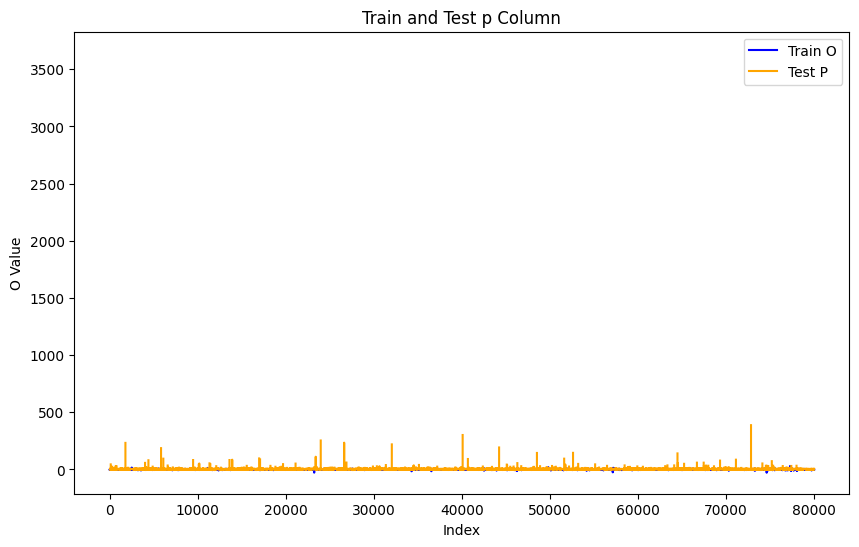

In [ ]:
#plot A column 
plt.figure(figsize=(10, 6))
plt.plot(train['Y1'], label='Train O', color='blue')
plt.plot(train_new['O'], label='Train P', color='orange')
plt.xlabel('Index')
plt.ylabel('O Value')
plt.title('Train and Test p Column')
plt.legend()
plt.show()

In [ ]:
%pip install keras-tcn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tcn import TCN

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Define feature columns and target
feature_cols = ['A', 'B', 'D', 'F', 'I', 'K', 'L']
target_col = 'Y2'

# Combine train and test for consistent scaling
full_data = pd.concat([train[feature_cols], test[feature_cols]], axis=0)

# Scale features to a range of [0, 1] for the neural network
feature_scaler = MinMaxScaler()
full_data_scaled = feature_scaler.fit_transform(full_data)

# Scale the target variable separately
target_scaler = MinMaxScaler()
train_y_scaled = target_scaler.fit_transform(train[[target_col]])

# Split scaled data back into train and test sets
train_x_scaled = full_data_scaled[:len(train)]
test_x_scaled = full_data_scaled[len(train):]

# This function converts our data into sequences (samples, timesteps, features)
def create_sequences(input_data, target_data, timesteps):
    X, y = [], []
    for i in range(len(input_data) - timesteps):
        X.append(input_data[i:(i + timesteps)])
        y.append(target_data[i + timesteps])
    return np.array(X), np.array(y)

timesteps = 10 # You can tune this hyperparameter

X_train, y_train = create_sequences(train_x_scaled, train_y_scaled, timesteps)
# Note: Test sequences will be created at prediction time

print(f"Shape of training features (X_train): {X_train.shape}")
print(f"Shape of training target (y_train): {y_train.shape}")


n_features = len(feature_cols)

model = Sequential([
    # TCN layer to process sequences. It can see patterns across the timesteps.
    # The input shape is (timesteps, number_of_features)
    TCN(
        input_shape=(timesteps, n_features),
        nb_filters=64,
        kernel_size=3,
        dilations=[1, 2, 4],
        return_sequences=True # Must be True to pass sequences to the next LSTM layer
    ),
    # LSTM layer to capture dependencies in the feature sequence extracted by TCN
    LSTM(units=50, activation='relu'),
    
    # Final output layer to make the prediction
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


print("\nStarting model training... 🏋️")
history = model.fit(
    X_train,
    y_train,
    epochs=50,      # You can tune this
    batch_size=32,  # You can tune this
    validation_split=0.2, # Use part of the data for validation
    verbose=1
)
print("Model training finished! 🎉")


print("\nMaking predictions on the test set... 🧠")

# Combine the last `timesteps` of training data with the test data
# This is crucial so the model has context for the first test predictions
inputs = np.concatenate((train_x_scaled[-timesteps:], test_x_scaled), axis=0)

# Create sequences from the combined test input
X_test = []
for i in range(len(inputs) - timesteps + 1):
    X_test.append(inputs[i:i+timesteps])
X_test = np.array(X_test)
# The loop above creates one extra sequence, so we take all but the last one
X_test = X_test[:-1]


# Predict
predicted_y_scaled = model.predict(X_test)
predicted_y = target_scaler.inverse_transform(predicted_y_scaled)

# Add predictions to the test dataframe
test['Y1_predicted'] = predicted_y

print("Predictions complete!")
print(test.head())

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr, pearsonr, f_oneway, kruskal, ttest_ind
TARGET  = "Y1"
FEATURE = "P"
train = pd.read_csv("train.csv")
train = pd.concat([train, train_new], axis=1)
df = train.copy()
df[FEATURE] = pd.to_numeric(df[FEATURE], errors="coerce")
df[TARGET]  = pd.to_numeric(df[TARGET],  errors="coerce")
mask_null   = df[FEATURE].isna()
mask_zero   = ~mask_null & np.isclose(df[FEATURE], 0.0, equal_nan=False)
mask_one    = ~mask_null & np.isclose(df[FEATURE], 1.0, equal_nan=False)
mask_valid_binary = mask_zero | mask_one

def _clean(arr):
    return np.asarray(pd.Series(arr).dropna(), dtype=float)

def cohen_d(a, b):
    a, b = _clean(a), _clean(b)
    if len(a) < 2 or len(b) < 2:
        return np.nan
    n1, n2 = len(a), len(b)
    v1, v2 = np.var(a, ddof=1), np.var(b, ddof=1)
    if (n1+n2-2) <= 0 or (v1==0 and v2==0):
        return np.nan
    sp2 = ((n1-1)*v1 + (n2-1)*v2) / (n1+n2-2)
    return (np.mean(a) - np.mean(b)) / np.sqrt(sp2) if sp2 > 0 else np.nan

def eta_squared_anova(groups):
    groups = [ _clean(g) for g in groups if len(_clean(g)) > 0 ]
    if len(groups) < 2:
        return np.nan
    all_vals = np.concatenate(groups)
    gm = np.mean(all_vals)
    ss_between = sum(len(g) * (np.mean(g) - gm)**2 for g in groups)
    ss_total   = np.sum((all_vals - gm)**2)
    return ss_between / ss_total if ss_total > 0 else np.nan
y_null = df.loc[mask_null, TARGET]
y_0    = df.loc[mask_zero, TARGET]
y_1    = df.loc[mask_one,  TARGET]
y_nonnull = df.loc[mask_valid_binary, TARGET]
x_nonnull = df.loc[mask_valid_binary, FEATURE].round().astype(int)  

pb_r, pb_p = (np.nan, np.nan)
if x_nonnull.nunique() == 2 and len(y_nonnull.dropna()) > 2:
    pb_r, pb_p = pointbiserialr(x_nonnull.values, y_nonnull.values)
pearson_r, pearson_p = (np.nan, np.nan)
if x_nonnull.nunique() == 2 and len(y_nonnull.dropna()) > 2:
    pearson_r, pearson_p = pearsonr(x_nonnull.values, y_nonnull.values)
g_means = {
    "P=null": float(np.nanmean(y_null)) if len(y_null.dropna()) else np.nan,
    "P=0"   : float(np.nanmean(y_0))    if len(y_0.dropna())    else np.nan,
    "P=1"   : float(np.nanmean(y_1))    if len(y_1.dropna())    else np.nan,
}
g_counts = {"P=null": int(y_null.notna().sum()), "P=0": int(y_0.notna().sum()), "P=1": int(y_1.notna().sum())}

anova_F, anova_p = (np.nan, np.nan)
kruskal_H, kruskal_p = (np.nan, np.nan)
eta2 = np.nan

groups_for_tests = [ _clean(y_null), _clean(y_0), _clean(y_1) ]
nonempty = [g for g in groups_for_tests if len(g) > 0]
if len(nonempty) >= 2:
    # If at least two groups have data, run ANOVA on all nonempty groups (must be >=2)
    if sum(len(g)>0 for g in groups_for_tests) >= 2:
        try:
            anova_F, anova_p = f_oneway(*[g for g in groups_for_tests if len(g) > 0])
        except Exception:
            pass
        try:
            kruskal_H, kruskal_p = kruskal(*[g for g in groups_for_tests if len(g) > 0])
        except Exception:
            pass
        eta2 = eta_squared_anova(groups_for_tests)
def welch_t(a, b):
    a, b = _clean(a), _clean(b)
    if len(a) < 2 or len(b) < 2:
        return (np.nan, np.nan, np.nan)
    tstat, p = ttest_ind(a, b, equal_var=False)
    d = cohen_d(a, b)
    return tstat, p, d

pairs = {
    "P=0 vs P=1": welch_t(y_0, y_1),
    "P=0 vs P=null": welch_t(y_0, y_null),
    "P=1 vs P=null": welch_t(y_1, y_null),
}
pairs_adj = {
    k: {"t": v[0], "p_raw": v[1], "p_bonf": min(v[1]*3, 1.0), "cohen_d": v[2]}
    for k, v in pairs.items()
}
df["is_null"] = df[FEATURE].isna().astype(int)
mask_y = df[TARGET].notna()
if df.loc[mask_y, "is_null"].nunique() == 2 and mask_y.sum() > 2:
    m_pb_r, m_pb_p = pointbiserialr(df.loc[mask_y, "is_null"].values, df.loc[mask_y, TARGET].values)
y_missing     = df.loc[df["is_null"] == 1, TARGET]
y_not_missing = df.loc[df["is_null"] == 0, TARGET]
miss_t, miss_p, miss_d = welch_t(y_missing, y_not_missing)

print("\n=== 1) Point-biserial (SciPy) : Y1 ~ P (drop nulls) ===")
print(f"r = {pb_r:.6f}, p = {pb_p:.3e}, n = {int(mask_valid_binary.sum())}")

print("\n=== 2) Point-biserial via Pearson (equivalence check) : Y1 ~ P ===")
print(f"r = {pearson_r:.6f}, p = {pearson_p:.3e}")

print("\n=== 3) Group means & tests across P ∈ {{null,0,1}} ===")
print("Counts:", g_counts)
print("Means :", {k: (np.nan if np.isnan(v) else round(v, 6)) for k, v in g_means.items()})
print(f"ANOVA: F = {anova_F:.6f}, p = {anova_p:.3e} | eta^2 = {eta2:.6f}")
print(f"Kruskal–Wallis: H = {kruskal_H:.6f}, p = {kruskal_p:.3e}")
print("Pairwise Welch t-tests (Bonferroni):")
for k, v in pairs_adj.items():
    print(f"  {k}: t = {v['t']:.6f}, p_raw = {v['p_raw']:.3e}, p_bonf = {v['p_bonf']:.3e}, cohen_d = {v['cohen_d']:.4f}")

print("\n=== 4) Missingness as signal: Y1 ~ is_null ===")
print(f"Point-biserial: r = {m_pb_r:.6f}, p = {m_pb_p:.3e}, n = {int(mask_y.sum())}")
print(f"Welch t-test (Y1 | missing vs not): t = {miss_t:.6f}, p = {miss_p:.3e}, Cohen's d = {miss_d:.4f}")
if not mask_valid_binary.any():
    print("\n[WARN] No valid 0/1 values found in P (after dropping NaNs). Check if P truly contains 0/1.")
extra_vals = df.loc[~mask_null & ~mask_valid_binary, FEATURE].unique()
if len(extra_vals) > 0:
    print(f"[NOTE] Ignored non-binary values in P: {extra_vals[:10]} (showing up to 10).")



=== 1) Point-biserial (SciPy) : Y1 ~ P (drop nulls) ===
r = 0.074776, p = 2.818e-21, n = 15994

=== 2) Point-biserial via Pearson (equivalence check) : Y1 ~ P ===
r = 0.074776, p = 2.818e-21

=== 3) Group means & tests across P ∈ {{null,0,1}} ===
Counts: {'P=null': 64006, 'P=0': 12396, 'P=1': 3598}
Means : {'P=null': -0.003074, 'P=0': -0.040406, 'P=1': 0.131465}
ANOVA: F = 43.773631, p = 9.994e-20 | eta^2 = 0.001093
Kruskal–Wallis: H = 45.994730, p = 1.029e-10
Pairwise Welch t-tests (Bonferroni):
  P=0 vs P=1: t = -8.294347, p_raw = 1.394e-16, p_bonf = 4.182e-16, cohen_d = -0.1796
  P=0 vs P=null: t = -4.188957, p_raw = 2.815e-05, p_bonf = 8.446e-05, cohen_d = -0.0388
  P=1 vs P=null: t = 6.905704, p_raw = 5.809e-12, p_bonf = 1.743e-11, cohen_d = 0.1368

=== 4) Missingness as signal: Y1 ~ is_null ===
Point-biserial: r = -0.000549, p = 8.766e-01, n = 80000
Welch t-test (Y1 | missing vs not): t = -0.156547, p = 8.756e-01, Cohen's d = -0.0014


In [ ]:
import pandas as pd
import xgboost as xgb
train = pd.read_csv("train.csv")
train = pd.concat([train, train_new], axis=1)
test = pd.read_csv("test.csv")
test = pd.concat([test, test_new], axis=1)
features = ['A', 'B', 'D', 'F', 'I', 'K', 'L', 'O', 'P']
train = pd.read_csv("train.csv")
train = pd.concat([train, train_new], axis=1)
# Prepare training data
X_train = train[features]
y_train = train['Y2']
X_test = test[features]

model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Default for regression; adjust as needed
    n_estimators=100,              # Number of trees; tune based on data
    learning_rate=0.1,             # Step size; tune as needed
    max_depth=6,                   # Tree depth; tune to prevent overfitting
    random_state=42                # For reproducibility
)

model.fit(X_train, y_train)

# Predict on test data and add to the test DataFrame
test['Y2'] = model.predict(X_test)

# Optionally, print or save the predictions
print(test[['Y2']])  #

             Y2
0     -0.351686
1     -0.493967
2     -0.299334
3     -0.148141
4     -0.074968
...         ...
15991 -0.382575
15992 -0.504880
15993 -0.467840
15994 -0.446199
15995 -0.492913

[15996 rows x 1 columns]


In [ ]:
import pandas as pd
import xgboost as xgb
features = ['C', 'E', 'G', 'H', 'J', 'M', 'N', 'O', 'P']

# Prepare training data
X_train = train[features]
y_train = train['Y1']
X_test = test[features]
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Default for regression; adjust as needed
    n_estimators=100,              # Number of trees; tune based on data
    learning_rate=0.1,             # Step size; tune as needed
    max_depth=6,                   # Tree depth; tune to prevent overfitting
    random_state=42                # For reproducibility
)

model.fit(X_train, y_train)

# Predict on test data and add to the test DataFrame
test['Y1'] = model.predict(X_test)

# Optionally, print or save the predictions
print(test[['Y1']])  # View the predicted 'Y1' column

             Y1
0      0.427540
1     -0.181175
2     -0.229573
3     -0.365668
4     -0.920964
...         ...
15991 -0.224381
15992 -0.145874
15993  0.280169
15994  0.465698
15995  0.317040

[15996 rows x 1 columns]


In [44]:
test

,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Y2,Y1
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796,NaN,NaN,-0.351686,0.427540
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599,NaN,NaN,-0.493967,-0.181175
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331,NaN,NaN,-0.299334,-0.229573
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772,NaN,0.0,-0.148141,-0.365668
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936,NaN,NaN,-0.074968,-0.920964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,15992,95996,-0.453361,-0.196443,-0.050846,-0.447012,-0.077724,-0.592894,-0.161817,-0.511905,-0.596177,-0.442584,-0.216181,0.122004,-0.697862,0.104958,NaN,NaN,-0.382575,-0.224381
15992,15993,95997,-0.481709,-0.258110,-0.454017,-0.603110,0.040541,-0.508827,-0.062558,-0.437095,-0.662719,-0.329388,-0.429567,-0.345853,0.092401,-0.273531,NaN,NaN,-0.504880,-0.145874
15993,15994,95998,-0.457018,-0.300467,0.403098,-0.555525,0.255084,-0.561159,0.126289,0.315079,-0.548791,0.373037,-0.210124,0.131684,0.659701,0.128788,NaN,0.0,-0.467840,0.280169
15994,15995,95999,-0.366164,-0.059930,0.541362,-0.505980,0.351848,-0.450031,-0.220432,0.985248,-0.513131,0.912360,-0.439541,0.741077,1.317468,0.268901,NaN,NaN,-0.446199,0.465698


In [45]:
# drop all columns except Y1 and Y2 and id column and save to preds.csv file where id,Y1 ,Y2 this order 
test[['id', 'Y1', 'Y2']].to_csv('preds.csv', index=False)
test[['id', 'Y1', 'Y2']]

,id,Y1,Y2
0,1,0.427540,-0.351686
1,2,-0.181175,-0.493967
2,3,-0.229573,-0.299334
3,4,-0.365668,-0.148141
4,5,-0.920964,-0.074968
...,...,...,...
15991,15992,-0.224381,-0.382575
15992,15993,-0.145874,-0.504880
15993,15994,0.280169,-0.467840
15994,15995,0.465698,-0.446199


In [ ]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load data
train = pd.read_csv("train.csv")
train = pd.concat([train, train_new], axis=1)
test = pd.read_csv("test.csv") 
test = pd.concat([test, test_new], axis=1)

def create_advanced_features(df, target_col='Y1', is_train=True):
    """
    Create advanced features including lags, rolling statistics, and technical indicators
    """
    df_enhanced = df.copy()
    
    if target_col in df_enhanced.columns:
        # Lag features (using past values only)
        for lag in [1, 2, 3, 5, 7, 10, 14, 21]:
            df_enhanced[f'{target_col}_lag_{lag}'] = df_enhanced[target_col].shift(lag)
        
        # Rolling window statistics (using past values only)
        windows = [3, 5, 7, 10, 14, 21, 30]
        for window in windows:
            # Rolling mean
            df_enhanced[f'{target_col}_rolling_mean_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).mean().shift(1)
            
            # Rolling standard deviation
            df_enhanced[f'{target_col}_rolling_std_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).std().shift(1)
            
            # Rolling min/max
            df_enhanced[f'{target_col}_rolling_min_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).min().shift(1)
            df_enhanced[f'{target_col}_rolling_max_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).max().shift(1)
            
            # Rolling median
            df_enhanced[f'{target_col}_rolling_median_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).median().shift(1)
        
        # Simple Moving Averages (SMA) with different periods
        sma_periods = [5, 10, 20, 50]
        for period in sma_periods:
            df_enhanced[f'{target_col}_sma_{period}'] = df_enhanced[target_col].rolling(window=period, min_periods=1).mean().shift(1)
        
        # Exponential Moving Average (EMA)
        ema_periods = [5, 10, 20]
        for period in ema_periods:
            df_enhanced[f'{target_col}_ema_{period}'] = df_enhanced[target_col].ewm(span=period).mean().shift(1)
        
        # Technical indicators
        # Rate of change
        for period in [5, 10, 20]:
            df_enhanced[f'{target_col}_roc_{period}'] = ((df_enhanced[target_col] - df_enhanced[target_col].shift(period)) / df_enhanced[target_col].shift(period) * 100).shift(1)
        
        # Momentum
        for period in [5, 10, 20]:
            df_enhanced[f'{target_col}_momentum_{period}'] = (df_enhanced[target_col] - df_enhanced[target_col].shift(period)).shift(1)
        
        # Bollinger Bands components
        for window in [10, 20]:
            rolling_mean = df_enhanced[target_col].rolling(window=window, min_periods=1).mean().shift(1)
            rolling_std = df_enhanced[target_col].rolling(window=window, min_periods=1).std().shift(1)
            df_enhanced[f'{target_col}_bb_upper_{window}'] = rolling_mean + (rolling_std * 2)
            df_enhanced[f'{target_col}_bb_lower_{window}'] = rolling_mean - (rolling_std * 2)
            df_enhanced[f'{target_col}_bb_width_{window}'] = df_enhanced[f'{target_col}_bb_upper_{window}'] - df_enhanced[f'{target_col}_bb_lower_{window}']
        
        # Relative strength index (simplified version)
        def calculate_rsi(series, period=14):
            delta = series.diff()
            gain = (delta.where(delta > 0, 0)).rolling(window=period, min_periods=1).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=period, min_periods=1).mean()
            rs = gain / loss
            return 100 - (100 / (1 + rs))
        
        df_enhanced[f'{target_col}_rsi_14'] = calculate_rsi(df_enhanced[target_col]).shift(1)
        
        # Volatility measures
        for window in [5, 10, 20]:
            df_enhanced[f'{target_col}_volatility_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).std().shift(1)
    
    # Interaction features with existing features
    base_features = ['C', 'E', 'G', 'H', 'J', 'M', 'N', 'O', 'P']

    # Polynomial features (degree 2) for selected features
    important_features = ['C', 'E', 'G', 'H','J','M','N']  # Adjust based on importance
    for feature in important_features:
        if feature in df_enhanced.columns:
            df_enhanced[f'{feature}_squared'] = df_enhanced[feature] ** 2
            df_enhanced[f'{feature}_cubed'] = df_enhanced[feature] ** 3
    
    # Feature interactions
    feature_pairs = [('C', 'E'), ('G', 'H'), ('M', 'N'), ('O', 'P'),('J', 'M')]
    for f1, f2 in feature_pairs:
        if f1 in df_enhanced.columns and f2 in df_enhanced.columns:
            df_enhanced[f'{f1}_{f2}_interaction'] = df_enhanced[f1] * df_enhanced[f2]
            df_enhanced[f'{f1}_{f2}_ratio'] = df_enhanced[f1] / (df_enhanced[f2] + 1e-8)  # Add small epsilon to avoid division by zero
    
    # Statistical features of base features (rolling)
    for feature in base_features:
        if feature in df_enhanced.columns:
            for window in [5, 10, 20]:
                df_enhanced[f'{feature}_rolling_mean_{window}'] = df_enhanced[feature].rolling(window=window, min_periods=1).mean()
                df_enhanced[f'{feature}_rolling_std_{window}'] = df_enhanced[feature].rolling(window=window, min_periods=1).std()
    
    return df_enhanced

# Create enhanced features
print("Creating advanced features...")
train_enhanced = create_advanced_features(train, target_col='Y1', is_train=True)
test_enhanced = create_advanced_features(test, target_col='Y1', is_train=False)

# Get feature columns (exclude target and non-feature columns)
exclude_cols = ['Y1', 'Y2']  # Add any other columns to exclude
feature_cols = [col for col in train_enhanced.columns if col not in exclude_cols]

# Ensure only existing columns are used (avoid KeyError)
feature_cols = [col for col in feature_cols if col in train_enhanced.columns and col in test_enhanced.columns]

# Prepare training data
X_train = train_enhanced[feature_cols].fillna(0)  # Fill NaN values
y_train = train_enhanced['Y1']

# Prepare test data
X_test = test_enhanced[feature_cols].fillna(0)

print(f"Total features created: {len(feature_cols)}")
print("Feature columns:", feature_cols[:20], "...")  # Show first 20 features

# Split training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Enhanced XGBoost model with more complexity
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,           # Increased number of trees
    learning_rate=0.05,         # Lower learning rate for better performance
    max_depth=8,                # Increased depth for more complexity
    min_child_weight=1,
    subsample=0.8,              # Subsample ratio of training instances
    colsample_bytree=0.8,       # Subsample ratio of features
    gamma=0,                    # Minimum loss reduction required to make split
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=1.0,             # L2 regularization
    random_state=42,
    n_jobs=-1,                  # Use all available cores
    early_stopping_rounds=50,   # Early stopping
    eval_metric='rmse'
)

# Train the model with validation set for early stopping
print("Training enhanced XGBoost model...")
model.fit(
    X_train_split, 
    y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    verbose=50  # Print progress every 50 iterations
)

# Evaluate on validation set
val_predictions = model.predict(X_val_split)
val_rmse = np.sqrt(mean_squared_error(y_val_split, val_predictions))
val_r2 = r2_score(y_val_split, val_predictions)

print(f"\nValidation RMSE: {val_rmse:.4f}")
print(f"Validation R²: {val_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importance.head(20))

# Train on full training data
print("\nTraining on full training dataset...")
model_final = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=model.best_iteration if hasattr(model, 'best_iteration') else 500,
    learning_rate=0.05,
    max_depth=8,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

model_final.fit(X_train, y_train)

# Predict on test data
print("Making predictions on test data...")
test_predictions = model_final.predict(X_test)
test['Y1'] = test_predictions

# Display predictions
print("\nPredictions summary:")
print(f"Mean predicted Y1: {test_predictions.mean():.4f}")
print(f"Std predicted Y1: {test_predictions.std():.4f}")
print(f"Min predicted Y1: {test_predictions.min():.4f}")
print(f"Max predicted Y1: {test_predictions.max():.4f}")

# Save results
print(f"\nPredicted Y1 values (first 10):")
print(test[['Y1']].head(10))


Creating advanced features...
Total features created: 95
Feature columns: ['time', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'C_squared', 'C_cubed', 'E_squared'] ...
Training enhanced XGBoost model...
[0]	validation_0-rmse:0.91877
[50]	validation_0-rmse:0.45573
[100]	validation_0-rmse:0.44892
[150]	validation_0-rmse:0.44803
[200]	validation_0-rmse:0.44764
[246]	validation_0-rmse:0.44811

Validation RMSE: 0.4476
Validation R²: 0.7801

Top 20 Most Important Features:
            feature  importance
7                 G    0.208928
33  G_H_interaction    0.205034
22          G_cubed    0.117407
21        G_squared    0.071579
31  C_E_interaction    0.029400
39  J_M_interaction    0.027324
18          C_cubed    0.018727
26          J_cubed    0.017527
13                M    0.013650
24          H_cubed    0.012663
10                J    0.012126
23        H_squared    0.010567
20          E_cubed    0.008979
40        J_M_ratio    0.007129
27        M_

In [57]:
test

,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Y1
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796,NaN,NaN,0.538092
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599,NaN,NaN,-0.234834
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331,NaN,NaN,-0.325460
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772,NaN,0.0,-0.397730
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936,NaN,NaN,-0.932368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,15992,95996,-0.453361,-0.196443,-0.050846,-0.447012,-0.077724,-0.592894,-0.161817,-0.511905,-0.596177,-0.442584,-0.216181,0.122004,-0.697862,0.104958,NaN,NaN,-0.272069
15992,15993,95997,-0.481709,-0.258110,-0.454017,-0.603110,0.040541,-0.508827,-0.062558,-0.437095,-0.662719,-0.329388,-0.429567,-0.345853,0.092401,-0.273531,NaN,NaN,-0.142488
15993,15994,95998,-0.457018,-0.300467,0.403098,-0.555525,0.255084,-0.561159,0.126289,0.315079,-0.548791,0.373037,-0.210124,0.131684,0.659701,0.128788,NaN,0.0,0.386081
15994,15995,95999,-0.366164,-0.059930,0.541362,-0.505980,0.351848,-0.450031,-0.220432,0.985248,-0.513131,0.912360,-0.439541,0.741077,1.317468,0.268901,NaN,NaN,0.639712


In [ ]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
def create_advanced_features(df, target_col='Y2', is_train=True):
    df_enhanced = df.copy()
    
    # Sort by time if there's a time column (adjust column name as needed)
    # df_enhanced = df_enhanced.sort_values('time_column').reset_index(drop=True)
    
    if target_col in df_enhanced.columns:
        # Lag features (using past values only)
        for lag in [1, 2, 3, 5, 7, 10, 14, 21]:
            df_enhanced[f'{target_col}_lag_{lag}'] = df_enhanced[target_col].shift(lag)
        
        # Rolling window statistics (using past values only)
        windows = [3, 5, 7, 10, 14, 21, 30]
        for window in windows:
            # Rolling mean
            df_enhanced[f'{target_col}_rolling_mean_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).mean().shift(1)
            
            # Rolling standard deviation
            df_enhanced[f'{target_col}_rolling_std_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).std().shift(1)
            
            # Rolling min/max
            df_enhanced[f'{target_col}_rolling_min_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).min().shift(1)
            df_enhanced[f'{target_col}_rolling_max_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).max().shift(1)
            
            # Rolling median
            df_enhanced[f'{target_col}_rolling_median_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).median().shift(1)
        
        # Simple Moving Averages (SMA) with different periods
        sma_periods = [5, 10, 20, 50]
        for period in sma_periods:
            df_enhanced[f'{target_col}_sma_{period}'] = df_enhanced[target_col].rolling(window=period, min_periods=1).mean().shift(1)
        
        # Exponential Moving Average (EMA)
        ema_periods = [5, 10, 20]
        for period in ema_periods:
            df_enhanced[f'{target_col}_ema_{period}'] = df_enhanced[target_col].ewm(span=period).mean().shift(1)
        
        # Technical indicators
        # Rate of change
        for period in [5, 10, 20]:
            df_enhanced[f'{target_col}_roc_{period}'] = ((df_enhanced[target_col] - df_enhanced[target_col].shift(period)) / df_enhanced[target_col].shift(period) * 100).shift(1)
        
        # Momentum
        for period in [5, 10, 20]:
            df_enhanced[f'{target_col}_momentum_{period}'] = (df_enhanced[target_col] - df_enhanced[target_col].shift(period)).shift(1)
        
        # Bollinger Bands components
        for window in [10, 20]:
            rolling_mean = df_enhanced[target_col].rolling(window=window, min_periods=1).mean().shift(1)
            rolling_std = df_enhanced[target_col].rolling(window=window, min_periods=1).std().shift(1)
            df_enhanced[f'{target_col}_bb_upper_{window}'] = rolling_mean + (rolling_std * 2)
            df_enhanced[f'{target_col}_bb_lower_{window}'] = rolling_mean - (rolling_std * 2)
            df_enhanced[f'{target_col}_bb_width_{window}'] = df_enhanced[f'{target_col}_bb_upper_{window}'] - df_enhanced[f'{target_col}_bb_lower_{window}']
        
        # Relative strength index (simplified version)
        def calculate_rsi(series, period=14):
            delta = series.diff()
            gain = (delta.where(delta > 0, 0)).rolling(window=period, min_periods=1).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=period, min_periods=1).mean()
            rs = gain / loss
            return 100 - (100 / (1 + rs))
        
        df_enhanced[f'{target_col}_rsi_14'] = calculate_rsi(df_enhanced[target_col]).shift(1)
        
        # Volatility measures
        for window in [5, 10, 20]:
            df_enhanced[f'{target_col}_volatility_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).std().shift(1)
    
    # Interaction features with existing features
    base_features = ['A', 'B', 'D', 'F', 'I', 'J', 'K', 'L', 'O', 'P']

    # Polynomial features (degree 2) for selected features
    important_features = ['A', 'B', 'D', 'F', 'I', 'J', 'K', 'L']  # Adjust based on importance
    for feature in important_features:
        if feature in df_enhanced.columns:
            df_enhanced[f'{feature}_squared'] = df_enhanced[feature] ** 2
            df_enhanced[f'{feature}_cubed'] = df_enhanced[feature] ** 3
    
    # Feature interactions
    feature_pairs = [('A', 'B'), ('D', 'F'), ('I', 'J'), ('K', 'L'), ('O', 'P')]
    for f1, f2 in feature_pairs:
        if f1 in df_enhanced.columns and f2 in df_enhanced.columns:
            df_enhanced[f'{f1}_{f2}_interaction'] = df_enhanced[f1] * df_enhanced[f2]
            df_enhanced[f'{f1}_{f2}_ratio'] = df_enhanced[f1] / (df_enhanced[f2] + 1e-8)  # Add small epsilon to avoid division by zero
    
    # Statistical features of base features (rolling)
    for feature in base_features:
        if feature in df_enhanced.columns:
            for window in [5, 10, 20]:
                df_enhanced[f'{feature}_rolling_mean_{window}'] = df_enhanced[feature].rolling(window=window, min_periods=1).mean()
                df_enhanced[f'{feature}_rolling_std_{window}'] = df_enhanced[feature].rolling(window=window, min_periods=1).std()
    
    return df_enhanced

# Create enhanced features
print("Creating advanced features...")
train_enhanced = create_advanced_features(train, target_col='Y2', is_train=True)
test_enhanced = create_advanced_features(test, target_col='Y2', is_train=False)

# Get feature columns (exclude target and non-feature columns)
exclude_cols = ['Y1', 'Y2']  # Add any other columns to exclude
feature_cols = [col for col in train_enhanced.columns if col not in exclude_cols]

# Ensure only existing columns are used (avoid KeyError)
feature_cols = [col for col in feature_cols if col in train_enhanced.columns and col in test_enhanced.columns]

# Prepare training data
X_train = train_enhanced[feature_cols].fillna(0)  # Fill NaN values
y_train = train_enhanced['Y2']

# Prepare test data
X_test = test_enhanced[feature_cols].fillna(0)

print(f"Total features created: {len(feature_cols)}")
print("Feature columns:", feature_cols[:20], "...")  # Show first 20 features

# Split training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Enhanced XGBoost model with more complexity
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,           # Increased number of trees
    learning_rate=0.05,         # Lower learning rate for better performance
    max_depth=8,                # Increased depth for more complexity
    min_child_weight=1,
    subsample=0.8,              # Subsample ratio of training instances
    colsample_bytree=0.8,       # Subsample ratio of features
    gamma=0,                    # Minimum loss reduction required to make split
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=1.0,             # L2 regularization
    random_state=42,
    n_jobs=-1,                  # Use all available cores
    early_stopping_rounds=50,   # Early stopping
    eval_metric='rmse'
)

# Train the model with validation set for early stopping
print("Training enhanced XGBoost model...")
model.fit(
    X_train_split, 
    y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    verbose=50  # Print progress every 50 iterations
)

# Evaluate on validation set
val_predictions = model.predict(X_val_split)
val_rmse = np.sqrt(mean_squared_error(y_val_split, val_predictions))
val_r2 = r2_score(y_val_split, val_predictions)

print(f"\nValidation RMSE: {val_rmse:.4f}")
print(f"Validation R²: {val_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importance.head(20))

# Train on full training data
print("\nTraining on full training dataset...")
model_final = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=model.best_iteration if hasattr(model, 'best_iteration') else 500,
    learning_rate=0.05,
    max_depth=8,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

model_final.fit(X_train, y_train)

# Predict on test data
print("Making predictions on test data...")
test_predictions = model_final.predict(X_test)
test['Y2'] = test_predictions

# Display predictions
print("\nPredictions summary:")
print(f"Mean predicted Y2: {test_predictions.mean():.4f}")
print(f"Std predicted Y2: {test_predictions.std():.4f}")
print(f"Min predicted Y2: {test_predictions.min():.4f}")
print(f"Max predicted Y2: {test_predictions.max():.4f}")

# Save results
print(f"\nPredicted Y2 values (first 10):")
print(test[['Y2']].head(10))

Creating advanced features...
Total features created: 103
Feature columns: ['time', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'A_squared', 'A_cubed', 'B_squared'] ...
Training enhanced XGBoost model...
[0]	validation_0-rmse:0.91123
[50]	validation_0-rmse:0.43426
[100]	validation_0-rmse:0.40832
[150]	validation_0-rmse:0.40093
[200]	validation_0-rmse:0.39662
[250]	validation_0-rmse:0.39374
[300]	validation_0-rmse:0.39172
[350]	validation_0-rmse:0.39002
[400]	validation_0-rmse:0.38898
[450]	validation_0-rmse:0.38778
[499]	validation_0-rmse:0.38674

Validation RMSE: 0.3867
Validation R²: 0.8321

Top 20 Most Important Features:
            feature  importance
33  A_B_interaction    0.277234
35  D_F_interaction    0.082714
39  K_L_interaction    0.068919
11                K    0.060931
30          K_cubed    0.060556
22          D_cubed    0.040691
18          A_cubed    0.027483
29        K_squared    0.020692
1                 A    0.019881
20         

In [59]:
test

,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Y1,Y2
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796,NaN,NaN,0.538092,-0.065405
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599,NaN,NaN,-0.234834,-0.337245
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331,NaN,NaN,-0.325460,-0.067420
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772,NaN,0.0,-0.397730,-0.087487
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936,NaN,NaN,-0.932368,0.033338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,15992,95996,-0.453361,-0.196443,-0.050846,-0.447012,-0.077724,-0.592894,-0.161817,-0.511905,-0.596177,-0.442584,-0.216181,0.122004,-0.697862,0.104958,NaN,NaN,-0.272069,-0.336209
15992,15993,95997,-0.481709,-0.258110,-0.454017,-0.603110,0.040541,-0.508827,-0.062558,-0.437095,-0.662719,-0.329388,-0.429567,-0.345853,0.092401,-0.273531,NaN,NaN,-0.142488,-0.339649
15993,15994,95998,-0.457018,-0.300467,0.403098,-0.555525,0.255084,-0.561159,0.126289,0.315079,-0.548791,0.373037,-0.210124,0.131684,0.659701,0.128788,NaN,0.0,0.386081,-0.390787
15994,15995,95999,-0.366164,-0.059930,0.541362,-0.505980,0.351848,-0.450031,-0.220432,0.985248,-0.513131,0.912360,-0.439541,0.741077,1.317468,0.268901,NaN,NaN,0.639712,-0.312578


In [60]:
# drop all columns except Y1 and Y2 and id column and save to preds.csv file where id,Y1 ,Y2 this order 
test[['id', 'Y1', 'Y2']].to_csv('preds.csv', index=False)
test[['id', 'Y1', 'Y2']]

,id,Y1,Y2
0,1,0.538092,-0.065405
1,2,-0.234834,-0.337245
2,3,-0.325460,-0.067420
3,4,-0.397730,-0.087487
4,5,-0.932368,0.033338
...,...,...,...
15991,15992,-0.272069,-0.336209
15992,15993,-0.142488,-0.339649
15993,15994,0.386081,-0.390787
15994,15995,0.639712,-0.312578


Training data shape: (80000, 9)
Target shape: (80000,)
Features used: ['C', 'E', 'G', 'H', 'J', 'M', 'N', 'O', 'P']
Tuning hyperparameters...
Fitting 5 folds for each of 56 candidates, totalling 280 fits
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.7}
Best CV score (neg_MSE): -0.250322

=== Training Results ===
Training MSE: 0.230137
Training MAE: 0.292591
Training R²: 0.755735
CV MSE (mean ± std): 0.250322 ± 0.132834
Predictions made for 15996 test samples
Training data shape: (80000, 9)
Target shape: (80000,)
Features used: ['C', 'E', 'G', 'H', 'J', 'M', 'N', 'O', 'P']


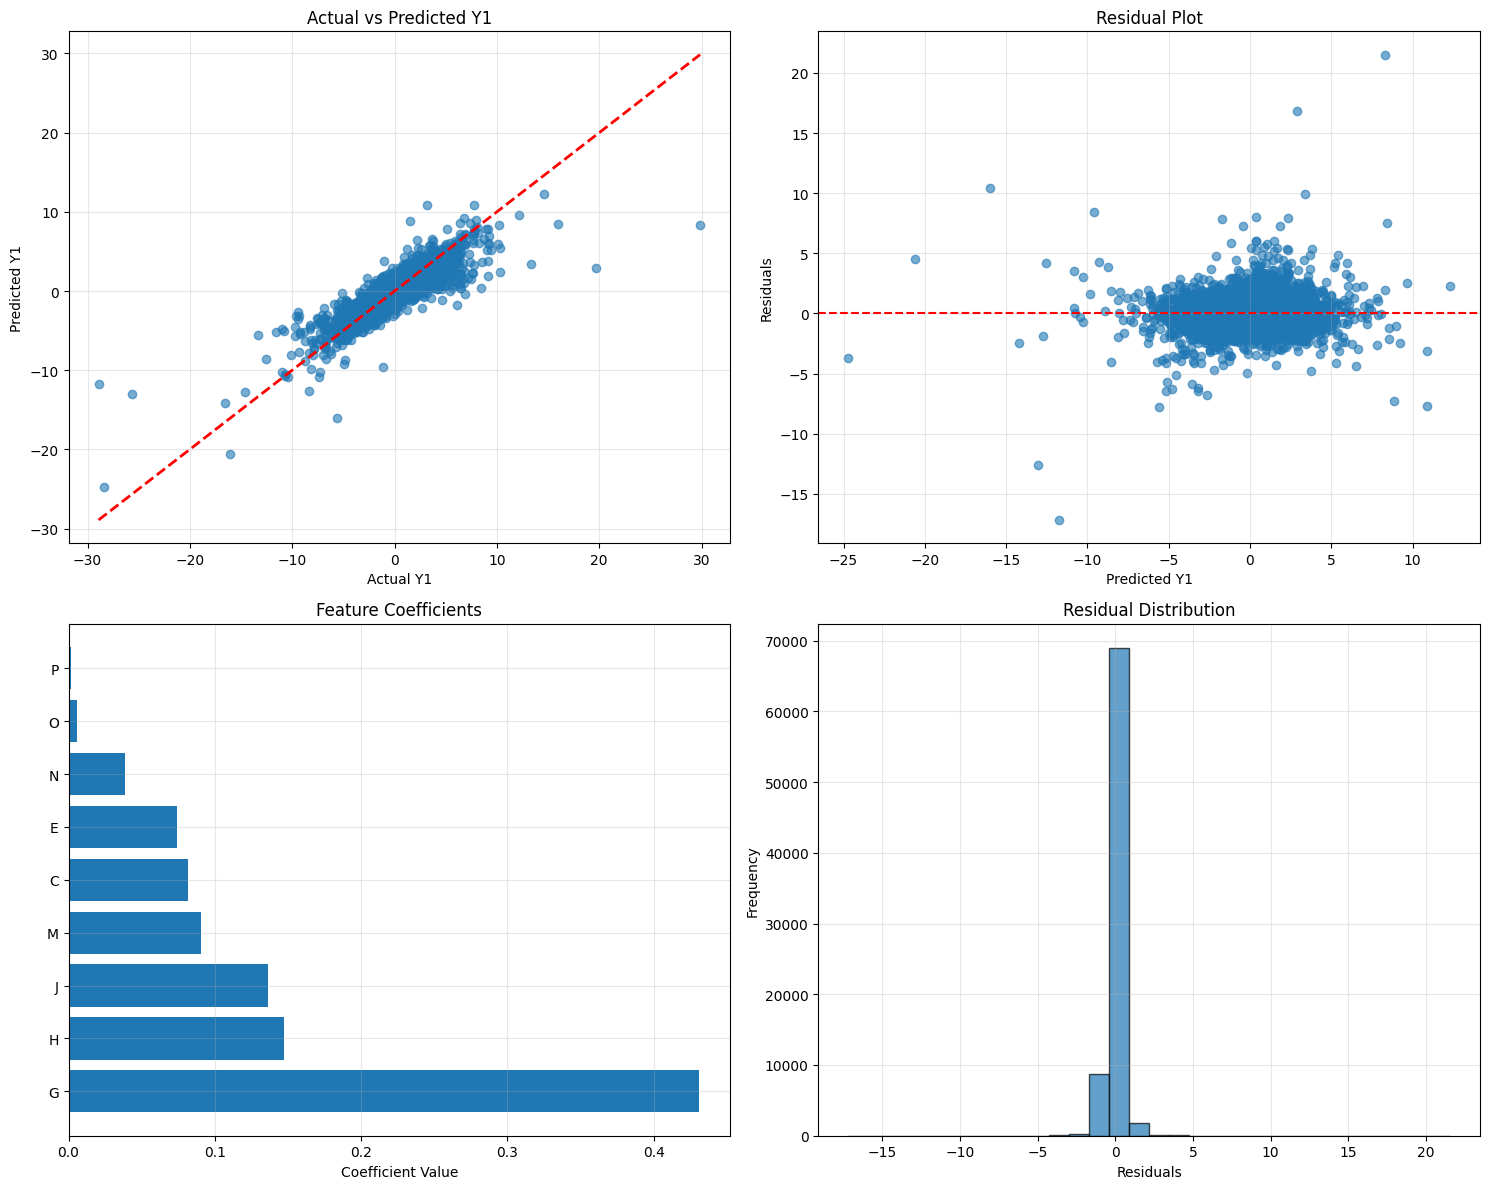


=== Feature Importance ===
  Feature  Coefficient  Abs_Coefficient
2       G     0.430722         0.430722
3       H     0.147535         0.147535
4       J     0.136600         0.136600
5       M     0.090227         0.090227
0       C     0.081595         0.081595
1       E     0.074319         0.074319
6       N     0.038689         0.038689
7       O     0.006013         0.006013
8       P     0.001760         0.001760
  Feature  Coefficient  Abs_Coefficient
2       G     0.430722         0.430722
3       H     0.147535         0.147535
4       J     0.136600         0.136600
5       M     0.090227         0.090227
0       C     0.081595         0.081595
1       E     0.074319         0.074319
6       N     0.038689         0.038689
7       O     0.006013         0.006013
8       P     0.001760         0.001760
Training Elastic Net model...
Training data shape: (80000, 9)
Target shape: (80000,)
Features used: ['C', 'E', 'G', 'H', 'J', 'M', 'N', 'O', 'P']
Tuning hyperparameters...


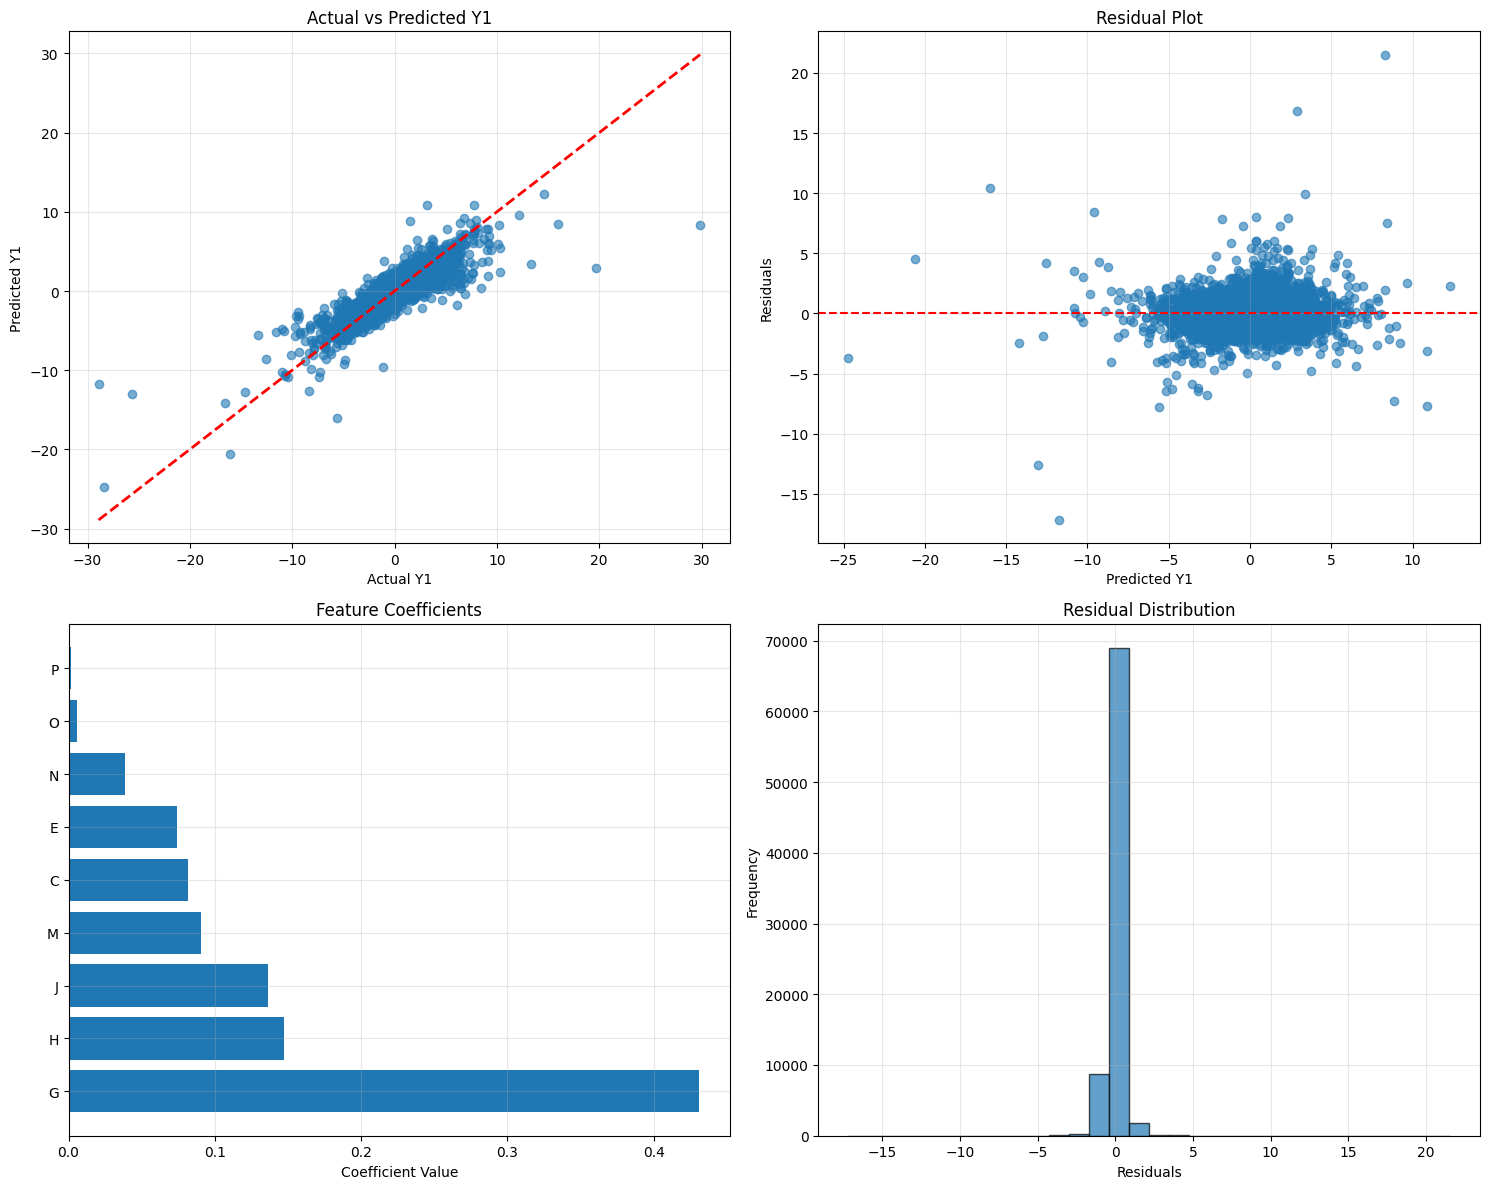


=== Feature Importance ===
  Feature  Coefficient  Abs_Coefficient
2       G     0.430722         0.430722
3       H     0.147535         0.147535
4       J     0.136600         0.136600
5       M     0.090227         0.090227
0       C     0.081595         0.081595
1       E     0.074319         0.074319
6       N     0.038689         0.038689
7       O     0.006013         0.006013
8       P     0.001760         0.001760

Prediction summary:
Mean prediction: 0.0012
Std prediction: 0.7100
Min prediction: -6.1853
Max prediction: 13.5789


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv("train.csv")
train = pd.concat([train, train_new], axis=1)
test = pd.read_csv("test.csv") 
test = pd.concat([test, test_new], axis=1)
class ElasticNetY1Predictor:
    def __init__(self):
        self.model = None
        self.scaler_X = StandardScaler()
        self.scaler_y = StandardScaler()
        self.feature_names = ['C', 'E', 'G', 'H', 'J', 'M', 'N','O','P']
        self.best_params = None
        
    def prepare_data(self, train_df, target_col='Y1'):
        """
        Prepare features and target from training dataframe
        """
        # Extract features
        X = train_df[self.feature_names].copy()
        y = train_df[target_col].copy()
        
        # Handle missing values if any
        X = X.fillna(X.mean())
        y = y.fillna(y.mean())
        
        print(f"Training data shape: {X.shape}")
        print(f"Target shape: {y.shape}")
        print(f"Features used: {self.feature_names}")
        
        return X, y
    
    def tune_hyperparameters(self, X, y, cv_folds=5):
        """
        Tune Elastic Net hyperparameters using GridSearchCV
        """
        print("Tuning hyperparameters...")
        
        # Define parameter grid
        param_grid = {
            'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
            'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]
        }
        
        # Create Elastic Net model
        elastic_net = ElasticNet(random_state=42, max_iter=10000)
        
        # Grid search with cross-validation
        grid_search = GridSearchCV(
            elastic_net, 
            param_grid, 
            cv=cv_folds,
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            verbose=1
        )
        
        # Scale features for tuning
        X_scaled = self.scaler_X.fit_transform(X)
        y_scaled = self.scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()
        
        # Fit grid search
        grid_search.fit(X_scaled, y_scaled)
        
        self.best_params = grid_search.best_params_
        print(f"Best parameters: {self.best_params}")
        print(f"Best CV score (neg_MSE): {grid_search.best_score_:.6f}")
        
        return grid_search.best_estimator_
    
    def train_model(self, train_df, target_col='Y1', tune_params=True):
        """
        Train the Elastic Net model
        """
        # Prepare data
        X, y = self.prepare_data(train_df, target_col)
        
        # Scale features and target
        X_scaled = self.scaler_X.fit_transform(X)
        y_scaled = self.scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()
        
        if tune_params:
            # Tune hyperparameters
            self.model = self.tune_hyperparameters(X, y)
        else:
            # Use default parameters
            self.model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42, max_iter=10000)
            self.model.fit(X_scaled, y_scaled)
        
        # Calculate training metrics
        y_train_pred_scaled = self.model.predict(X_scaled)
        y_train_pred = self.scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
        
        train_mse = mean_squared_error(y, y_train_pred)
        train_mae = mean_absolute_error(y, y_train_pred)
        train_r2 = r2_score(y, y_train_pred)
        
        print("\n=== Training Results ===")
        print(f"Training MSE: {train_mse:.6f}")
        print(f"Training MAE: {train_mae:.6f}")
        print(f"Training R²: {train_r2:.6f}")
        
        # Cross-validation scores
        cv_scores = cross_val_score(self.model, X_scaled, y_scaled, 
                                  cv=5, scoring='neg_mean_squared_error')
        print(f"CV MSE (mean ± std): {-cv_scores.mean():.6f} ± {cv_scores.std():.6f}")
        
        return self.model
    
    def predict(self, test_df):
        """
        Make predictions on test data
        """
        if self.model is None:
            raise ValueError("Model not trained yet. Call train_model() first.")
        
        # Extract features from test data
        X_test = test_df[self.feature_names].copy()
        
        # Handle missing values
        X_test = X_test.fillna(X_test.mean())
        
        # Scale features
        X_test_scaled = self.scaler_X.transform(X_test)
        
        # Make predictions
        y_pred_scaled = self.model.predict(X_test_scaled)
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
        
        print(f"Predictions made for {len(y_pred)} test samples")
        
        return y_pred
    
    def get_feature_importance(self):
        """
        Get feature coefficients from the trained model
        """
        if self.model is None:
            raise ValueError("Model not trained yet.")
        
        coefficients = self.model.coef_
        feature_importance = pd.DataFrame({
            'Feature': self.feature_names,
            'Coefficient': coefficients,
            'Abs_Coefficient': np.abs(coefficients)
        }).sort_values('Abs_Coefficient', ascending=False)
        
        return feature_importance
    
    def plot_results(self, train_df, target_col='Y1'):
        """
        Plot training results and feature importance
        """
        if self.model is None:
            raise ValueError("Model not trained yet.")
        
        # Prepare data for plotting
        X, y = self.prepare_data(train_df, target_col)
        X_scaled = self.scaler_X.transform(X)
        y_pred_scaled = self.model.predict(X_scaled)
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Plot 1: Actual vs Predicted
        axes[0, 0].scatter(y, y_pred, alpha=0.6)
        axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
        axes[0, 0].set_xlabel('Actual Y1')
        axes[0, 0].set_ylabel('Predicted Y1')
        axes[0, 0].set_title('Actual vs Predicted Y1')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Plot 2: Residuals
        residuals = y - y_pred
        axes[0, 1].scatter(y_pred, residuals, alpha=0.6)
        axes[0, 1].axhline(y=0, color='r', linestyle='--')
        axes[0, 1].set_xlabel('Predicted Y1')
        axes[0, 1].set_ylabel('Residuals')
        axes[0, 1].set_title('Residual Plot')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Plot 3: Feature Importance
        feature_imp = self.get_feature_importance()
        axes[1, 0].barh(feature_imp['Feature'], feature_imp['Coefficient'])
        axes[1, 0].set_xlabel('Coefficient Value')
        axes[1, 0].set_title('Feature Coefficients')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Plot 4: Residual Distribution
        axes[1, 1].hist(residuals, bins=30, alpha=0.7, edgecolor='black')
        axes[1, 1].set_xlabel('Residuals')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].set_title('Residual Distribution')
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print feature importance
        print("\n=== Feature Importance ===")
        print(feature_imp)

# Example usage:

# Initialize the predictor
predictor = ElasticNetY1Predictor()

# Train the model (assuming you have 'train' dataframe)
predictor.train_model(train, target_col='Y1', tune_params=True)

# Make predictions on test data (assuming you have 'test' dataframe)
test_predictions = predictor.predict(test)

# Add predictions to test dataframe
test['Y1'] = test_predictions

# Plot results and feature importance
predictor.plot_results(train)

# Get feature importance
feature_importance = predictor.get_feature_importance()
print(feature_importance)

def run_elastic_net_model(train_df, test_df, target_col='Y1'):
   
    predictor = ElasticNetY1Predictor()
    
    # Train model
    print("Training Elastic Net model...")
    predictor.train_model(train_df, target_col, tune_params=True)
    
    # Make predictions
    print("\nMaking predictions on test data...")
    test_predictions = predictor.predict(test_df)
    
    # Add predictions to test dataframe
    test_df_with_pred = test_df.copy()
    test_df_with_pred['Y1'] = test_predictions
    
    # Show results
    predictor.plot_results(train_df)
    
    print(f"\nPrediction summary:")
    print(f"Mean prediction: {test_predictions.mean():.4f}")
    print(f"Std prediction: {test_predictions.std():.4f}")
    print(f"Min prediction: {test_predictions.min():.4f}")
    print(f"Max prediction: {test_predictions.max():.4f}")
    
    return test_df_with_pred, predictor

# Uncomment and run this if you have your dataframes ready:
test_with_predictions, trained_model = run_elastic_net_model(train, test)

In [64]:
test

,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Y1
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796,NaN,NaN,0.381611
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599,NaN,NaN,-0.204376
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331,NaN,NaN,-0.193016
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772,NaN,0.0,-0.367361
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936,NaN,NaN,-0.871835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,15992,95996,-0.453361,-0.196443,-0.050846,-0.447012,-0.077724,-0.592894,-0.161817,-0.511905,-0.596177,-0.442584,-0.216181,0.122004,-0.697862,0.104958,NaN,NaN,-0.260604
15992,15993,95997,-0.481709,-0.258110,-0.454017,-0.603110,0.040541,-0.508827,-0.062558,-0.437095,-0.662719,-0.329388,-0.429567,-0.345853,0.092401,-0.273531,NaN,NaN,-0.164380
15993,15994,95998,-0.457018,-0.300467,0.403098,-0.555525,0.255084,-0.561159,0.126289,0.315079,-0.548791,0.373037,-0.210124,0.131684,0.659701,0.128788,NaN,0.0,0.250881
15994,15995,95999,-0.366164,-0.059930,0.541362,-0.505980,0.351848,-0.450031,-0.220432,0.985248,-0.513131,0.912360,-0.439541,0.741077,1.317468,0.268901,NaN,NaN,0.355335


Training data shape: (80000, 9)
Target shape: (80000,)
Features used: ['A', 'B', 'D', 'F', 'I', 'K', 'L', 'O', 'P']
Tuning hyperparameters...
Fitting 5 folds for each of 56 candidates, totalling 280 fits
Best parameters: {'alpha': 0.1, 'l1_ratio': 0.7}
Best CV score (neg_MSE): -0.445065

=== Training Results ===
Training MSE: 0.339918
Training MAE: 0.308665
Training R²: 0.601603
CV MSE (mean ± std): 0.445065 ± 0.234079
Predictions made for 15996 test samples
Training data shape: (80000, 9)
Target shape: (80000,)
Features used: ['A', 'B', 'D', 'F', 'I', 'K', 'L', 'O', 'P']


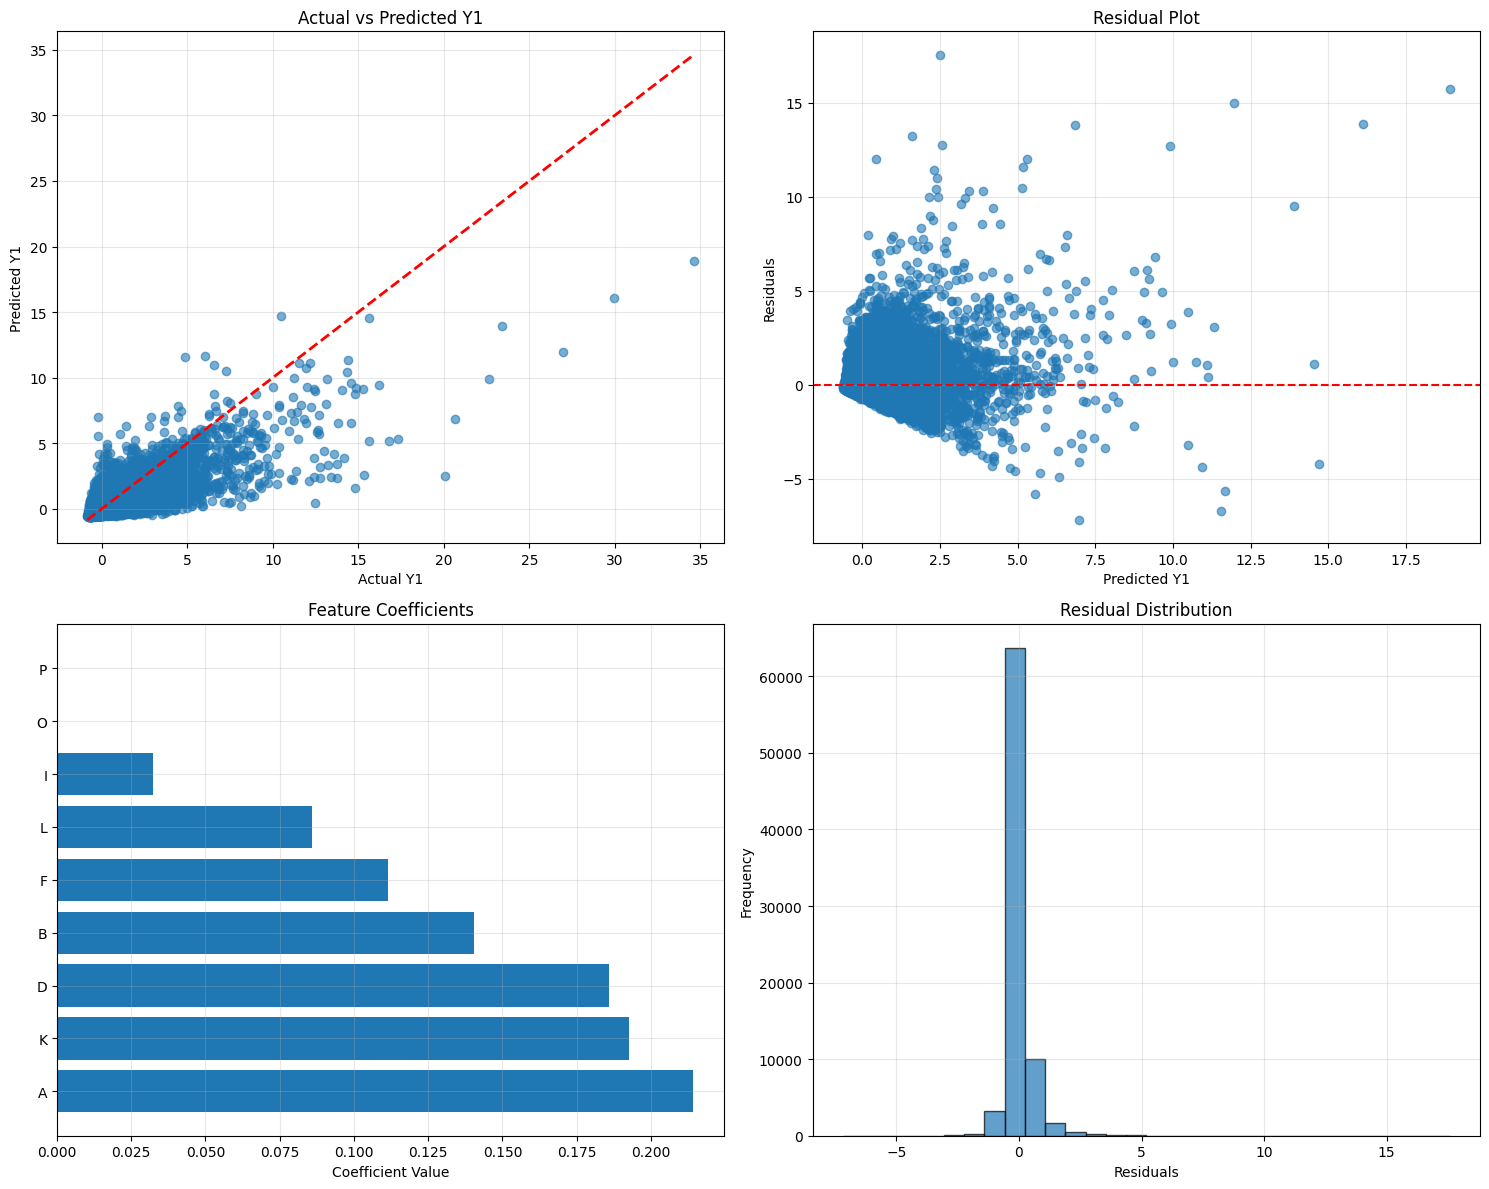


=== Feature Importance ===
  Feature  Coefficient  Abs_Coefficient
0       A     0.214019         0.214019
5       K     0.192683         0.192683
2       D     0.185920         0.185920
1       B     0.140280         0.140280
3       F     0.111383         0.111383
6       L     0.085814         0.085814
4       I     0.032493         0.032493
7       O     0.000000         0.000000
8       P     0.000000         0.000000
  Feature  Coefficient  Abs_Coefficient
0       A     0.214019         0.214019
5       K     0.192683         0.192683
2       D     0.185920         0.185920
1       B     0.140280         0.140280
3       F     0.111383         0.111383
6       L     0.085814         0.085814
4       I     0.032493         0.032493
7       O     0.000000         0.000000
8       P     0.000000         0.000000
Training Elastic Net model...
Training data shape: (80000, 9)
Target shape: (80000,)
Features used: ['A', 'B', 'D', 'F', 'I', 'K', 'L', 'O', 'P']
Tuning hyperparameters...


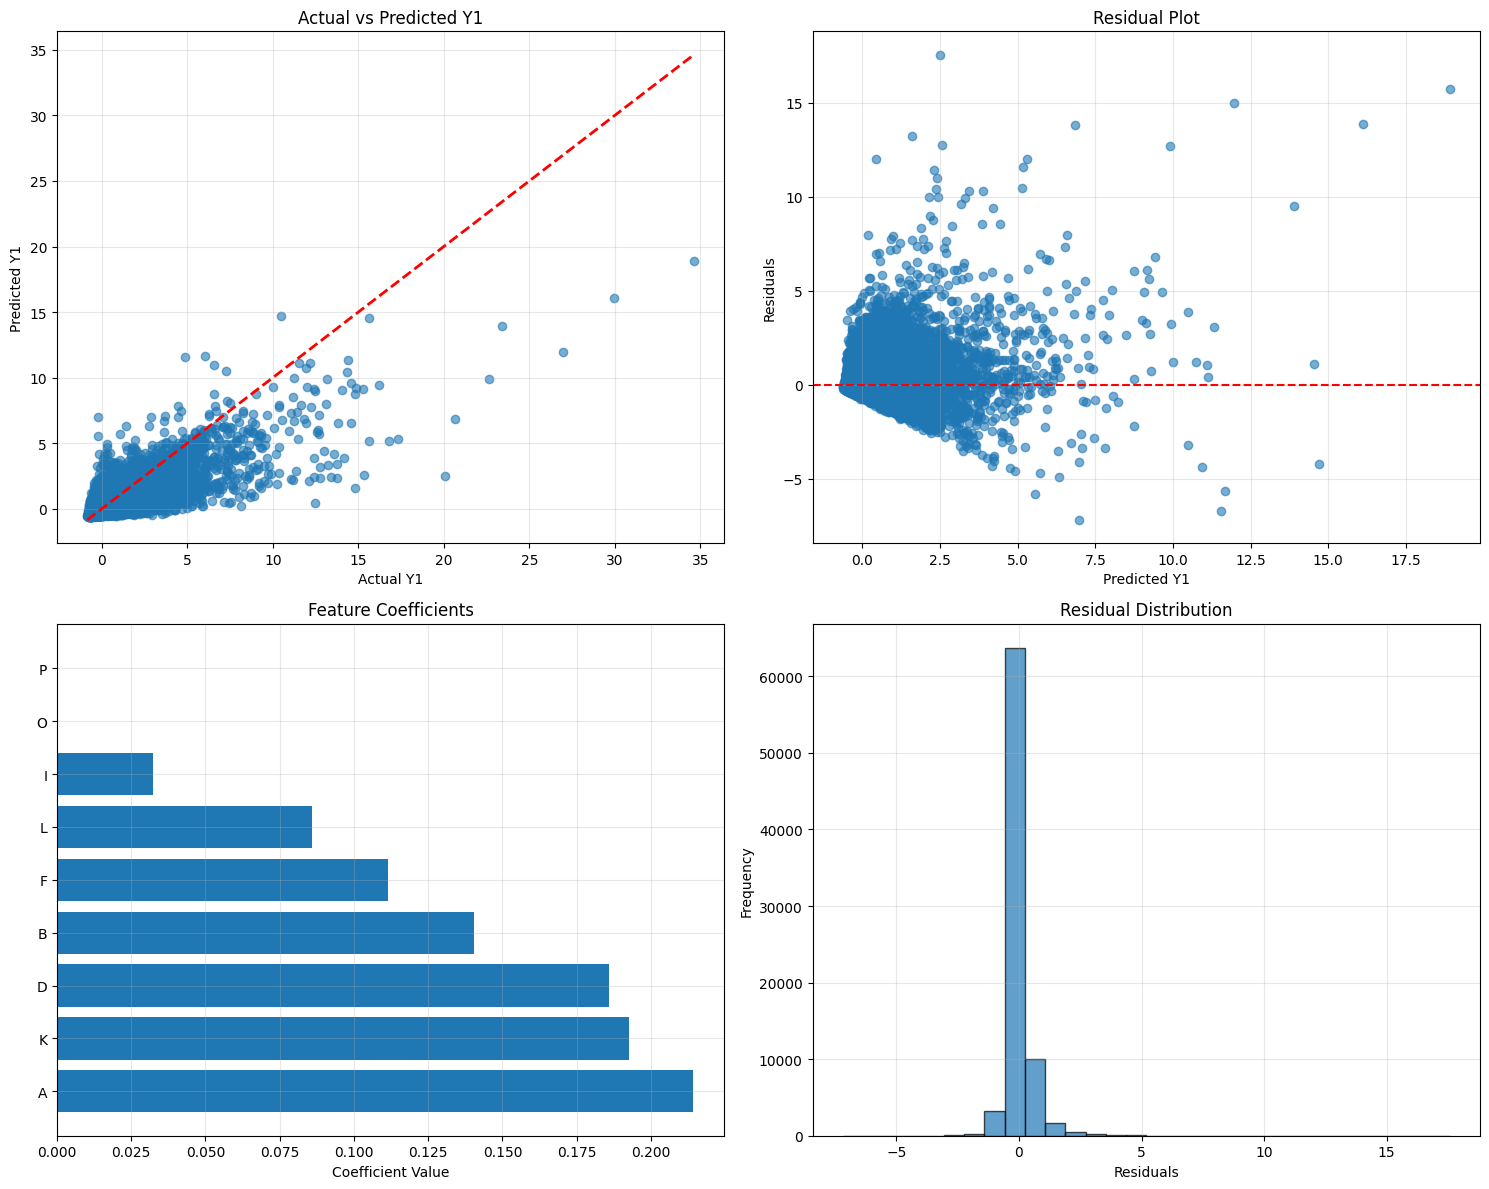


=== Feature Importance ===
  Feature  Coefficient  Abs_Coefficient
0       A     0.214019         0.214019
5       K     0.192683         0.192683
2       D     0.185920         0.185920
1       B     0.140280         0.140280
3       F     0.111383         0.111383
6       L     0.085814         0.085814
4       I     0.032493         0.032493
7       O     0.000000         0.000000
8       P     0.000000         0.000000

Prediction summary:
Mean prediction: -0.2208
Std prediction: 0.4046
Min prediction: -0.5866
Max prediction: 13.3048


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
class ElasticNetY1Predictor:
    def __init__(self):
        self.model = None
        self.scaler_X = StandardScaler()
        self.scaler_y = StandardScaler()
        self.feature_names = ['A', 'B', 'D', 'F', 'I', 'K', 'L', 'O', 'P']
        self.best_params = None
        
    def prepare_data(self, train_df, target_col='Y2'):
        X = train_df[self.feature_names].copy()
        y = train_df[target_col].copy()
        
        X = X.fillna(X.mean())
        y = y.fillna(y.mean())
        
        print(f"Training data shape: {X.shape}")
        print(f"Target shape: {y.shape}")
        print(f"Features used: {self.feature_names}")
        
        return X, y
    
    def tune_hyperparameters(self, X, y, cv_folds=5):
        print("Tuning hyperparameters...")
        
        # Define parameter grid
        param_grid = {
            'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
            'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]
        }
        
        # Create Elastic Net model
        elastic_net = ElasticNet(random_state=42, max_iter=10000)
        
        # Grid search with cross-validation
        grid_search = GridSearchCV(
            elastic_net, 
            param_grid, 
            cv=cv_folds,
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            verbose=1
        )
        
        # Scale features for tuning
        X_scaled = self.scaler_X.fit_transform(X)
        y_scaled = self.scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()
        
        # Fit grid search
        grid_search.fit(X_scaled, y_scaled)
        
        self.best_params = grid_search.best_params_
        print(f"Best parameters: {self.best_params}")
        print(f"Best CV score (neg_MSE): {grid_search.best_score_:.6f}")
        
        return grid_search.best_estimator_
    
    def train_model(self, train_df, target_col='Y2', tune_params=True):
     
        # Prepare data
        X, y = self.prepare_data(train_df, target_col)
        
        # Scale features and target
        X_scaled = self.scaler_X.fit_transform(X)
        y_scaled = self.scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()
        
        if tune_params:
            # Tune hyperparameters
            self.model = self.tune_hyperparameters(X, y)
        else:
            # Use default parameters
            self.model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42, max_iter=10000)
            self.model.fit(X_scaled, y_scaled)
        
        # Calculate training metrics
        y_train_pred_scaled = self.model.predict(X_scaled)
        y_train_pred = self.scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
        
        train_mse = mean_squared_error(y, y_train_pred)
        train_mae = mean_absolute_error(y, y_train_pred)
        train_r2 = r2_score(y, y_train_pred)
        
        print("\n=== Training Results ===")
        print(f"Training MSE: {train_mse:.6f}")
        print(f"Training MAE: {train_mae:.6f}")
        print(f"Training R²: {train_r2:.6f}")
        
        # Cross-validation scores
        cv_scores = cross_val_score(self.model, X_scaled, y_scaled, 
                                  cv=5, scoring='neg_mean_squared_error')
        print(f"CV MSE (mean ± std): {-cv_scores.mean():.6f} ± {cv_scores.std():.6f}")
        
        return self.model
    
    def predict(self, test_df):
        """
        Make predictions on test data
        """
        if self.model is None:
            raise ValueError("Model not trained yet. Call train_model() first.")
        
        # Extract features from test data
        X_test = test_df[self.feature_names].copy()
        
        # Handle missing values
        X_test = X_test.fillna(X_test.mean())
        
        # Scale features
        X_test_scaled = self.scaler_X.transform(X_test)
        
        # Make predictions
        y_pred_scaled = self.model.predict(X_test_scaled)
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
        
        print(f"Predictions made for {len(y_pred)} test samples")
        
        return y_pred
    
    def get_feature_importance(self):
        """
        Get feature coefficients from the trained model
        """
        if self.model is None:
            raise ValueError("Model not trained yet.")
        
        coefficients = self.model.coef_
        feature_importance = pd.DataFrame({
            'Feature': self.feature_names,
            'Coefficient': coefficients,
            'Abs_Coefficient': np.abs(coefficients)
        }).sort_values('Abs_Coefficient', ascending=False)
        
        return feature_importance
    
    def plot_results(self, train_df, target_col='Y2'):
        """
        Plot training results and feature importance
        """
        if self.model is None:
            raise ValueError("Model not trained yet.")
        X, y = self.prepare_data(train_df, target_col)
        X_scaled = self.scaler_X.transform(X)
        y_pred_scaled = self.model.predict(X_scaled)
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes[0, 0].scatter(y, y_pred, alpha=0.6)
        axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
        axes[0, 0].set_xlabel('Actual Y1')
        axes[0, 0].set_ylabel('Predicted Y1')
        axes[0, 0].set_title('Actual vs Predicted Y1')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Plot 2: Residuals
        residuals = y - y_pred
        axes[0, 1].scatter(y_pred, residuals, alpha=0.6)
        axes[0, 1].axhline(y=0, color='r', linestyle='--')
        axes[0, 1].set_xlabel('Predicted Y1')
        axes[0, 1].set_ylabel('Residuals')
        axes[0, 1].set_title('Residual Plot')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Plot 3: Feature Importance
        feature_imp = self.get_feature_importance()
        axes[1, 0].barh(feature_imp['Feature'], feature_imp['Coefficient'])
        axes[1, 0].set_xlabel('Coefficient Value')
        axes[1, 0].set_title('Feature Coefficients')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Plot 4: Residual Distribution
        axes[1, 1].hist(residuals, bins=30, alpha=0.7, edgecolor='black')
        axes[1, 1].set_xlabel('Residuals')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].set_title('Residual Distribution')
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print feature importance
        print("\n=== Feature Importance ===")
        print(feature_imp)

# Example usage:

# Initialize the predictor
predictor = ElasticNetY1Predictor()

# Train the model (assuming you have 'train' dataframe)
predictor.train_model(train, target_col='Y2', tune_params=True)

# Make predictions on test data (assuming you have 'test' dataframe)
test_predictions = predictor.predict(test)

# Add predictions to test dataframe
test['Y2'] = test_predictions

# Plot results and feature importance
predictor.plot_results(train)

# Get feature importance
feature_importance = predictor.get_feature_importance()
print(feature_importance)

# Save predictions
#test[['Y1_predicted']].to_csv('test_predictions.csv', index=False)
def run_elastic_net_model(train_df, test_df, target_col='Y2'):
    """
    Complete workflow function
    """
    # Initialize predictor
    predictor = ElasticNetY1Predictor()
    
    # Train model
    print("Training Elastic Net model...")
    predictor.train_model(train_df, target_col, tune_params=True)
    
    # Make predictions
    print("\nMaking predictions on test data...")
    test_predictions = predictor.predict(test_df)
    
    # Add predictions to test dataframe
    test_df_with_pred = test_df.copy()
    test_df_with_pred['Y2'] = test_predictions
    
    # Show results
    predictor.plot_results(train_df)
    
    print(f"\nPrediction summary:")
    print(f"Mean prediction: {test_predictions.mean():.4f}")
    print(f"Std prediction: {test_predictions.std():.4f}")
    print(f"Min prediction: {test_predictions.min():.4f}")
    print(f"Max prediction: {test_predictions.max():.4f}")
    
    return test_df_with_pred, predictor

# Uncomment and run this if you have your dataframes ready:
test_with_predictions, trained_model = run_elastic_net_model(train, test)

In [68]:
test

,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Y1,Y2
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796,NaN,NaN,0.381611,-0.380007
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599,NaN,NaN,-0.204376,-0.430516
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331,NaN,NaN,-0.193016,-0.322532
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772,NaN,0.0,-0.367361,-0.144150
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936,NaN,NaN,-0.871835,-0.234217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,15992,95996,-0.453361,-0.196443,-0.050846,-0.447012,-0.077724,-0.592894,-0.161817,-0.511905,-0.596177,-0.442584,-0.216181,0.122004,-0.697862,0.104958,NaN,NaN,-0.260604,-0.370653
15992,15993,95997,-0.481709,-0.258110,-0.454017,-0.603110,0.040541,-0.508827,-0.062558,-0.437095,-0.662719,-0.329388,-0.429567,-0.345853,0.092401,-0.273531,NaN,NaN,-0.164380,-0.474628
15993,15994,95998,-0.457018,-0.300467,0.403098,-0.555525,0.255084,-0.561159,0.126289,0.315079,-0.548791,0.373037,-0.210124,0.131684,0.659701,0.128788,NaN,0.0,0.250881,-0.396037
15994,15995,95999,-0.366164,-0.059930,0.541362,-0.505980,0.351848,-0.450031,-0.220432,0.985248,-0.513131,0.912360,-0.439541,0.741077,1.317468,0.268901,NaN,NaN,0.355335,-0.323002


In [69]:
test[['id', 'Y1', 'Y2']].to_csv('preds.csv', index=False)
test[['id', 'Y1', 'Y2']]

,id,Y1,Y2
0,1,0.381611,-0.380007
1,2,-0.204376,-0.430516
2,3,-0.193016,-0.322532
3,4,-0.367361,-0.144150
4,5,-0.871835,-0.234217
...,...,...,...
15991,15992,-0.260604,-0.370653
15992,15993,-0.164380,-0.474628
15993,15994,0.250881,-0.396037
15994,15995,0.355335,-0.323002


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'regressor__alpha': 0.01, 'regressor__l1_ratio': 0.5}

=== Training Results ===
MSE: 0.221370
MAE: 0.291339
RMSE: 0.470499
R²: 0.765040
CV MSE (mean ± std): 0.252677 ± 0.128045


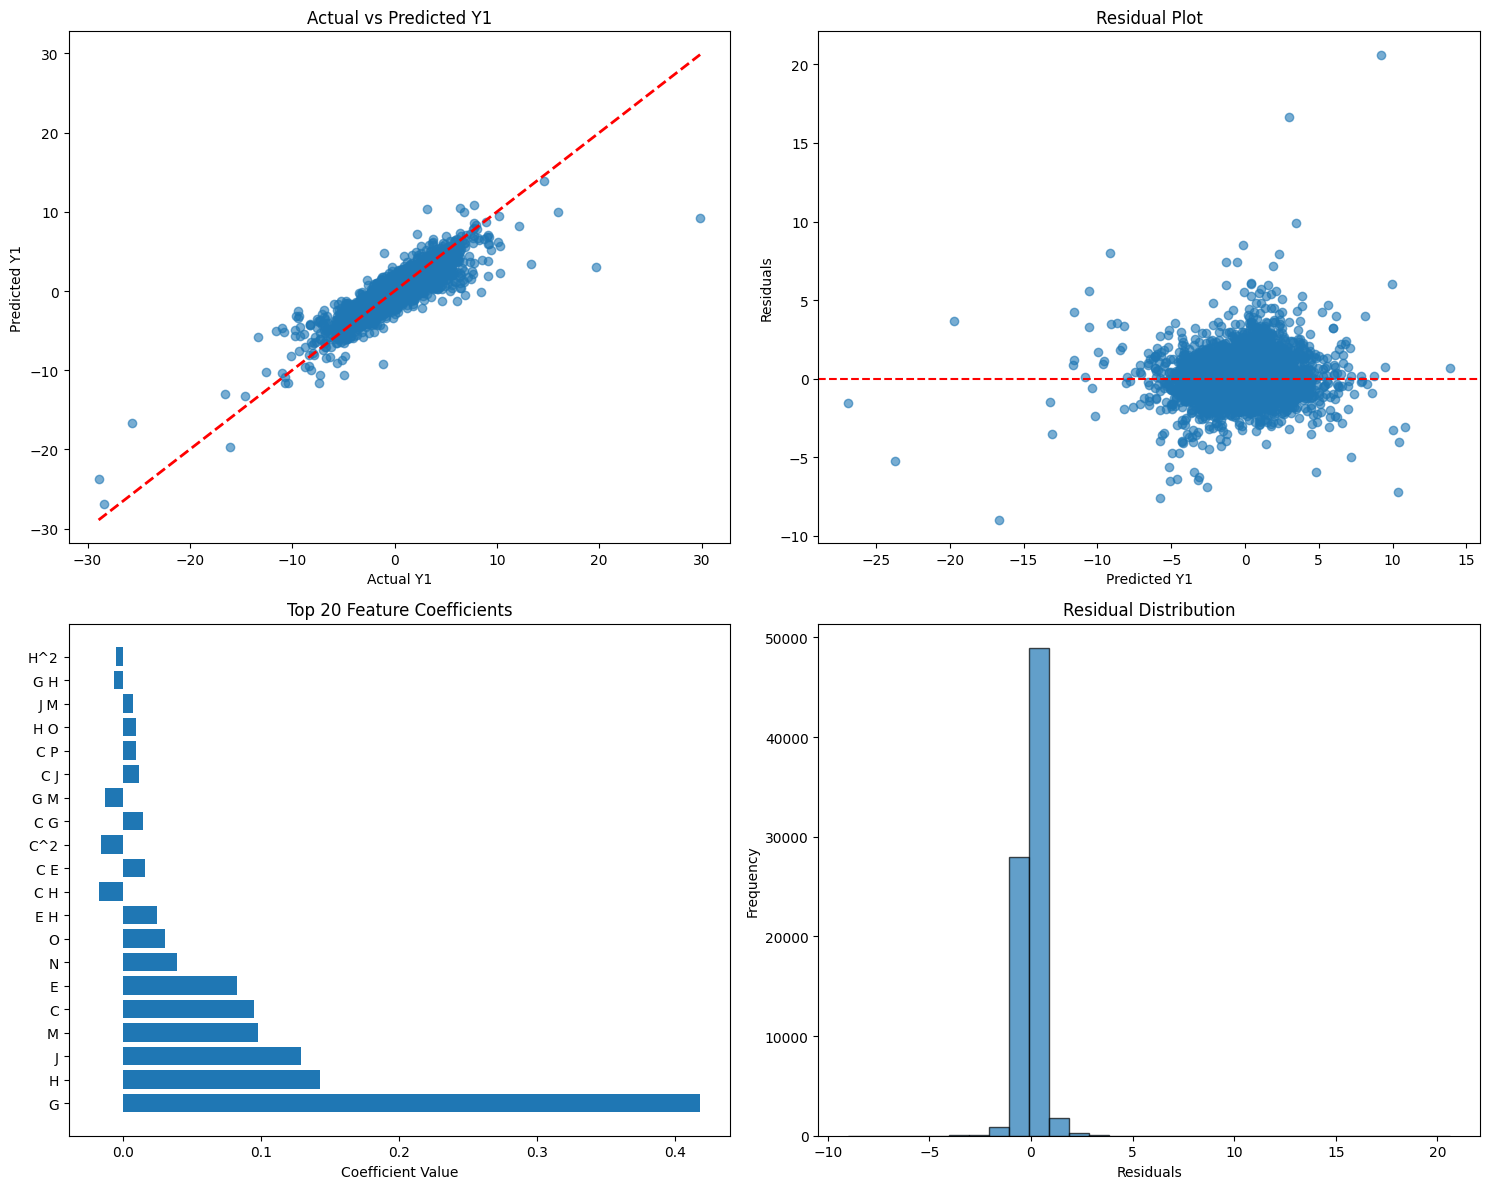


=== Top Feature Importance ===
   Feature  Coefficient  Abs_Coefficient
2        G     0.417849         0.417849
3        H     0.143120         0.143120
4        J     0.128766         0.128766
5        M     0.097873         0.097873
0        C     0.095022         0.095022
1        E     0.082538         0.082538
6        N     0.039265         0.039265
7        O     0.030400         0.030400
20     E H     0.024942         0.024942
12     C H    -0.017340         0.017340
10     C E     0.016256         0.016256
9      C^2    -0.015772         0.015772
11     C G     0.014597         0.014597
29     G M    -0.013035         0.013035
13     C J     0.011719         0.011719
17     C P     0.009641         0.009641
37     H O     0.009449         0.009449
40     J M     0.007771         0.007771
27     G H    -0.006058         0.006058
33     H^2    -0.004852         0.004852
   Feature  Coefficient  Abs_Coefficient
2        G     0.417849         0.417849
3        H     0.143120  

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class PolyRegularizedY1Predictor:
    def __init__(self, degree=2, model_type="elasticnet"):
        """
        Polynomial regression with regularization (ElasticNet / Ridge / Lasso)
        """
        self.degree = degree
        self.model_type = model_type.lower()
        self.pipeline = None
        self.scaler_y = StandardScaler()
        self.feature_names = ['C', 'E', 'G', 'H', 'J', 'M', 'N', 'O', 'P']
        self.best_params = None

    def prepare_data(self, train_df, target_col="Y1"):
        X = train_df[self.feature_names].copy()
        y = train_df[target_col].copy()
        X = X.fillna(X.mean())
        y = y.fillna(y.mean())
        return X, y

    def build_pipeline(self, alpha=1.0, l1_ratio=0.5):
        if self.model_type == "ridge":
            base_model = Ridge(alpha=alpha, random_state=42, max_iter=10000)
        elif self.model_type == "lasso":
            base_model = Lasso(alpha=alpha, random_state=42, max_iter=10000)
        else:  # elasticnet
            base_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio,
                                    random_state=42, max_iter=10000)

        self.pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=self.degree,
                                        include_bias=False,
                                        interaction_only=False)),
            ("regressor", base_model)
        ])
        return self.pipeline

    def train_model(self, train_df, target_col="Y1", tune_params=True):
        X, y = self.prepare_data(train_df, target_col)
        y_scaled = self.scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

        if tune_params:
            param_grid = {"regressor__alpha": [0.001, 0.01, 0.1, 1.0, 10.0]}
            if self.model_type == "elasticnet":
                param_grid["regressor__l1_ratio"] = [0.1, 0.5, 0.9]

            model = self.build_pipeline()
            grid = GridSearchCV(model, param_grid, cv=5,
                                scoring="neg_mean_squared_error",
                                n_jobs=-1, verbose=1)
            grid.fit(X, y_scaled)
            self.pipeline = grid.best_estimator_
            self.best_params = grid.best_params_
            print("Best parameters:", self.best_params)
        else:
            self.pipeline = self.build_pipeline()
            self.pipeline.fit(X, y_scaled)

        # Training metrics
        y_pred_scaled = self.pipeline.predict(X)
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, y_pred)

        print("\n=== Training Results ===")
        print(f"MSE: {mse:.6f}")
        print(f"MAE: {mae:.6f}")
        print(f"RMSE: {rmse:.6f}")
        print(f"R²: {r2:.6f}")

        # CV score
        cv_scores = cross_val_score(self.pipeline, X, y_scaled,
                                    cv=5, scoring="neg_mean_squared_error")
        print(f"CV MSE (mean ± std): {-cv_scores.mean():.6f} ± {cv_scores.std():.6f}")

        return self.pipeline

    def predict(self, test_df):
        X_test = test_df[self.feature_names].copy()
        X_test = X_test.fillna(X_test.mean())
        y_pred_scaled = self.pipeline.predict(X_test)
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
        return y_pred

    def get_feature_importance(self):
        if self.pipeline is None:
            raise ValueError("Model not trained yet.")
        poly = self.pipeline.named_steps["poly"]
        names = poly.get_feature_names_out(self.feature_names)
        coefs = self.pipeline.named_steps["regressor"].coef_
        return pd.DataFrame({
            "Feature": names,
            "Coefficient": coefs,
            "Abs_Coefficient": np.abs(coefs)
        }).sort_values("Abs_Coefficient", ascending=False)

    def plot_results(self, train_df, target_col="Y1"):
        X, y = self.prepare_data(train_df, target_col)
        y_pred_scaled = self.pipeline.predict(X)
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

        residuals = y - y_pred
        feature_imp = self.get_feature_importance()

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Plot 1: Actual vs Predicted
        axes[0, 0].scatter(y, y_pred, alpha=0.6)
        axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
        axes[0, 0].set_xlabel("Actual Y1")
        axes[0, 0].set_ylabel("Predicted Y1")
        axes[0, 0].set_title("Actual vs Predicted Y1")

        # Plot 2: Residuals
        axes[0, 1].scatter(y_pred, residuals, alpha=0.6)
        axes[0, 1].axhline(y=0, color="r", linestyle="--")
        axes[0, 1].set_xlabel("Predicted Y1")
        axes[0, 1].set_ylabel("Residuals")
        axes[0, 1].set_title("Residual Plot")

        # Plot 3: Feature Importance
        axes[1, 0].barh(feature_imp["Feature"][:20],
                        feature_imp["Coefficient"][:20])  # top 20
        axes[1, 0].set_xlabel("Coefficient Value")
        axes[1, 0].set_title("Top 20 Feature Coefficients")

        # Plot 4: Residual Distribution
        axes[1, 1].hist(residuals, bins=30, alpha=0.7, edgecolor="black")
        axes[1, 1].set_xlabel("Residuals")
        axes[1, 1].set_ylabel("Frequency")
        axes[1, 1].set_title("Residual Distribution")

        plt.tight_layout()
        plt.show()

        print("\n=== Top Feature Importance ===")
        print(feature_imp.head(20))
# Initialize (degree=2 polynomial, ElasticNet regularization)
predictor = PolyRegularizedY1Predictor(degree=2, model_type="elasticnet")

# Train
predictor.train_model(train, target_col="Y1", tune_params=True)

# Predict
test_preds = predictor.predict(test)
test["Y1_predicted"] = test_preds

# Plots
predictor.plot_results(train)

# Feature importance (with polynomial terms)
fi = predictor.get_feature_importance()
print(fi.head(30))


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/suyashjindal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.551e+01, tolerance: 5.084e+00
  model = cd_fast.enet_coordinate_descent(


Best parameters: {'regressor__alpha': 10.0, 'regressor__l1_ratio': 0.5}

=== Training Results ===
MSE: 0.825940
MAE: 0.495799
RMSE: 0.908812
R²: 0.031967
CV MSE (mean ± std): 1.012870 ± 0.448660


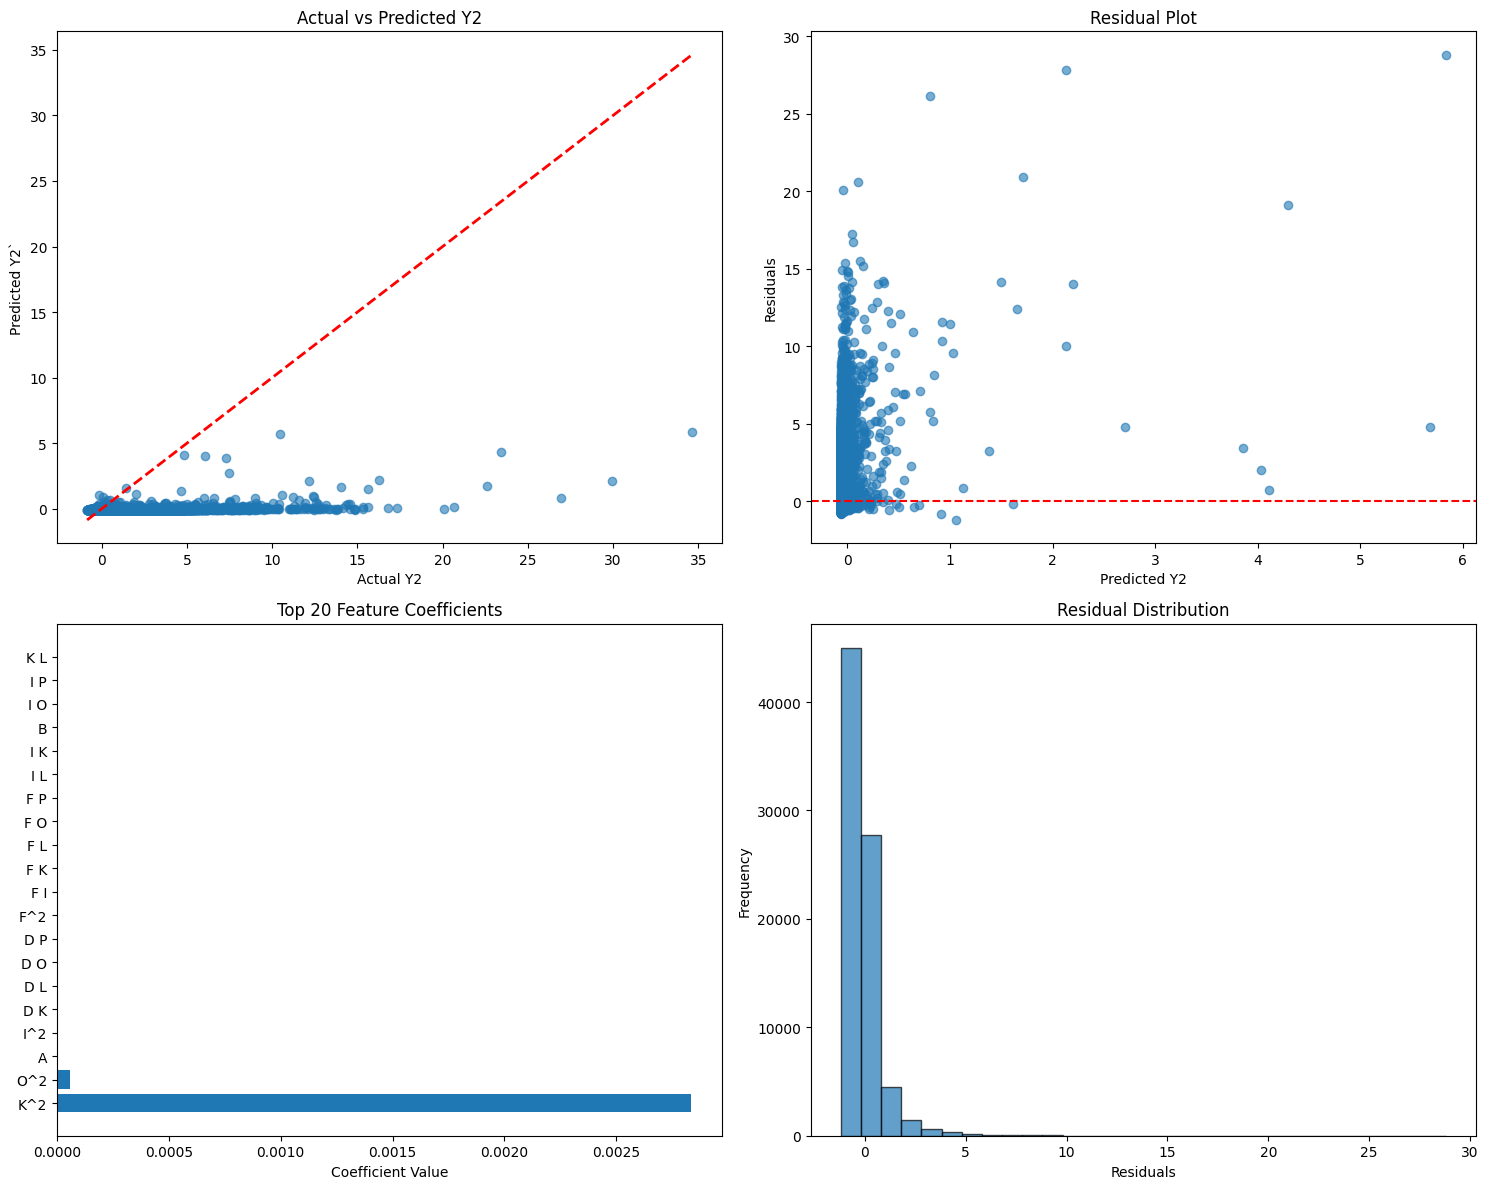


=== Top Feature Importance ===
   Feature  Coefficient  Abs_Coefficient
44     K^2     0.002833         0.002833
51     O^2     0.000057         0.000057
0        A     0.000000         0.000000
39     I^2     0.000000         0.000000
29     D K     0.000000         0.000000
30     D L     0.000000         0.000000
31     D O     0.000000         0.000000
32     D P     0.000000         0.000000
33     F^2     0.000000         0.000000
34     F I     0.000000         0.000000
35     F K     0.000000         0.000000
36     F L     0.000000         0.000000
37     F O     0.000000         0.000000
38     F P     0.000000         0.000000
41     I L     0.000000         0.000000
40     I K     0.000000         0.000000
1        B     0.000000         0.000000
42     I O     0.000000         0.000000
43     I P     0.000000         0.000000
45     K L     0.000000         0.000000
   Feature  Coefficient  Abs_Coefficient
44     K^2     0.002833         0.002833
51     O^2     0.000057  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class PolyRegularizedY1Predictor:
    def __init__(self, degree=2, model_type="elasticnet"):
        self.degree = degree
        self.model_type = model_type.lower()
        self.pipeline = None
        self.scaler_y = StandardScaler()
        self.feature_names = ['A', 'B', 'D', 'F', 'I', 'K', 'L', 'O', 'P']
        self.best_params = None

    def prepare_data(self, train_df, target_col="Y2"):
        X = train_df[self.feature_names].copy()
        y = train_df[target_col].copy()
        X = X.fillna(X.mean())
        y = y.fillna(y.mean())
        return X, y

    def build_pipeline(self, alpha=1.0, l1_ratio=0.5):
        if self.model_type == "ridge":
            base_model = Ridge(alpha=alpha, random_state=42, max_iter=10000)
        elif self.model_type == "lasso":
            base_model = Lasso(alpha=alpha, random_state=42, max_iter=10000)
        else:  # elasticnet
            base_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio,
                                    random_state=42, max_iter=10000)

        self.pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=self.degree,
                                        include_bias=False,
                                        interaction_only=False)),
            ("regressor", base_model)
        ])
        return self.pipeline

    def train_model(self, train_df, target_col="Y2", tune_params=True):
        X, y = self.prepare_data(train_df, target_col)
        y_scaled = self.scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

        if tune_params:
            param_grid = {"regressor__alpha": [0.001, 0.01, 0.1, 1.0, 10.0]}
            if self.model_type == "elasticnet":
                param_grid["regressor__l1_ratio"] = [0.1, 0.5, 0.9]

            model = self.build_pipeline()
            grid = GridSearchCV(model, param_grid, cv=5,
                                scoring="neg_mean_squared_error",
                                n_jobs=-1, verbose=1)
            grid.fit(X, y_scaled)
            self.pipeline = grid.best_estimator_
            self.best_params = grid.best_params_
            print("Best parameters:", self.best_params)
        else:
            self.pipeline = self.build_pipeline()
            self.pipeline.fit(X, y_scaled)

        # Training metrics
        y_pred_scaled = self.pipeline.predict(X)
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, y_pred)

        print("\n=== Training Results ===")
        print(f"MSE: {mse:.6f}")
        print(f"MAE: {mae:.6f}")
        print(f"RMSE: {rmse:.6f}")
        print(f"R²: {r2:.6f}")

        # CV score
        cv_scores = cross_val_score(self.pipeline, X, y_scaled,
                                    cv=5, scoring="neg_mean_squared_error")
        print(f"CV MSE (mean ± std): {-cv_scores.mean():.6f} ± {cv_scores.std():.6f}")

        return self.pipeline

    def predict(self, test_df):
        X_test = test_df[self.feature_names].copy()
        X_test = X_test.fillna(X_test.mean())
        y_pred_scaled = self.pipeline.predict(X_test)
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
        return y_pred

    def get_feature_importance(self):
        if self.pipeline is None:
            raise ValueError("Model not trained yet.")
        poly = self.pipeline.named_steps["poly"]
        names = poly.get_feature_names_out(self.feature_names)
        coefs = self.pipeline.named_steps["regressor"].coef_
        return pd.DataFrame({
            "Feature": names,
            "Coefficient": coefs,
            "Abs_Coefficient": np.abs(coefs)
        }).sort_values("Abs_Coefficient", ascending=False)

    def plot_results(self, train_df, target_col="Y2"):
        X, y = self.prepare_data(train_df, target_col)
        y_pred_scaled = self.pipeline.predict(X)
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

        residuals = y - y_pred
        feature_imp = self.get_feature_importance()

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Plot 1: Actual vs Predicted
        axes[0, 0].scatter(y, y_pred, alpha=0.6)
        axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
        axes[0, 0].set_xlabel("Actual Y2")
        axes[0, 0].set_ylabel("Predicted Y2`")
        axes[0, 0].set_title("Actual vs Predicted Y2")

        # Plot 2: Residuals
        axes[0, 1].scatter(y_pred, residuals, alpha=0.6)
        axes[0, 1].axhline(y=0, color="r", linestyle="--")
        axes[0, 1].set_xlabel("Predicted Y2")
        axes[0, 1].set_ylabel("Residuals")
        axes[0, 1].set_title("Residual Plot")

        # Plot 3: Feature Importance
        axes[1, 0].barh(feature_imp["Feature"][:20],
                        feature_imp["Coefficient"][:20])  # top 20
        axes[1, 0].set_xlabel("Coefficient Value")
        axes[1, 0].set_title("Top 20 Feature Coefficients")

        # Plot 4: Residual Distribution
        axes[1, 1].hist(residuals, bins=30, alpha=0.7, edgecolor="black")
        axes[1, 1].set_xlabel("Residuals")
        axes[1, 1].set_ylabel("Frequency")
        axes[1, 1].set_title("Residual Distribution")

        plt.tight_layout()
        plt.show()

        print("\n=== Top Feature Importance ===")
        print(feature_imp.head(20))
# Initialize (degree=2 polynomial, ElasticNet regularization)
predictor = PolyRegularizedY1Predictor(degree=2, model_type="elasticnet")

# Train
predictor.train_model(train, target_col="Y2", tune_params=True)

# Predict
test_preds = predictor.predict(test)
test["Y2_predicted"] = test_preds

# Plots
predictor.plot_results(train)

# Feature importance (with polynomial terms)
fi = predictor.get_feature_importance()
print(fi.head(30))


In [73]:
test

,id,time,A,B,C,D,E,F,G,H,...,K,L,M,N,O,P,Y1,Y2,Y1_predicted,Y2_predicted
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,...,-0.369900,-0.378902,0.470166,0.411796,NaN,NaN,0.381611,-0.380007,0.407827,-0.063508
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,...,-0.461901,-0.249516,-0.216745,-0.328599,NaN,NaN,-0.204376,-0.430516,-0.200451,-0.063323
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,...,-0.272153,-0.193158,-0.679351,-0.476331,NaN,NaN,-0.193016,-0.322532,-0.198861,-0.063661
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,...,0.518678,-0.028775,-0.610620,-0.846772,NaN,0.0,-0.367361,-0.144150,-0.369981,-0.063184
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,...,0.185197,-0.150254,-1.080190,-0.685936,NaN,NaN,-0.871835,-0.234217,-0.893175,-0.063755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,15992,95996,-0.453361,-0.196443,-0.050846,-0.447012,-0.077724,-0.592894,-0.161817,-0.511905,...,-0.216181,0.122004,-0.697862,0.104958,NaN,NaN,-0.260604,-0.370653,-0.251808,-0.063727
15992,15993,95997,-0.481709,-0.258110,-0.454017,-0.603110,0.040541,-0.508827,-0.062558,-0.437095,...,-0.429567,-0.345853,0.092401,-0.273531,NaN,NaN,-0.164380,-0.474628,-0.161207,-0.063393
15993,15994,95998,-0.457018,-0.300467,0.403098,-0.555525,0.255084,-0.561159,0.126289,0.315079,...,-0.210124,0.131684,0.659701,0.128788,NaN,0.0,0.250881,-0.396037,0.266258,-0.063733
15994,15995,95999,-0.366164,-0.059930,0.541362,-0.505980,0.351848,-0.450031,-0.220432,0.985248,...,-0.439541,0.741077,1.317468,0.268901,NaN,NaN,0.355335,-0.323002,0.382701,-0.063372


In [76]:
# drop all columns except Y1 and Y2 and id column and save to preds.csv file where id,Y1 ,Y2 this order 
#first make new dataframe where id ,and 1_predicted and then rename Y1_predicted to Y1 and Y2 to Y2
preds = test[['id', 'Y1_predicted', 'Y2']].copy()
preds.rename(columns={'Y1_predicted': 'Y1'}, inplace=True)
preds.to_csv('preds.csv', index=False)


In [75]:
preds

,id,Y1,Y2
0,1,0.407827,-0.380007
1,2,-0.200451,-0.430516
2,3,-0.198861,-0.322532
3,4,-0.369981,-0.144150
4,5,-0.893175,-0.234217
...,...,...,...
15991,15992,-0.251808,-0.370653
15992,15993,-0.161207,-0.474628
15993,15994,0.266258,-0.396037
15994,15995,0.382701,-0.323002


In [ ]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Load data
train = pd.read_csv("train.csv")
train = pd.concat([train, train_new], axis=1)
test = pd.read_csv("test.csv") 
test = pd.concat([test, test_new], axis=1)

def create_advanced_features(df, target_col='Y1', is_train=True):


    df_enhanced = df.copy()
    
    # Sort by time if there's a time column (adjust column name as needed)
    # df_enhanced = df_enhanced.sort_values('time_column').reset_index(drop=True)
    
    base_features = ['C', 'E', 'G', 'H', 'J', 'M', 'N', 'O', 'P']

    print("Creating pairwise difference features for base features...")
    
    # Create all pairwise differences for base features
    for i, feature1 in enumerate(base_features):
        for j, feature2 in enumerate(base_features):
            if i < j and feature1 in df_enhanced.columns and feature2 in df_enhanced.columns:  # Avoid duplicates
                # Simple difference
                df_enhanced[f'{feature1}_minus_{feature2}'] = df_enhanced[feature1] - df_enhanced[feature2]
                # Absolute difference
                df_enhanced[f'abs_{feature1}_minus_{feature2}'] = np.abs(df_enhanced[feature1] - df_enhanced[feature2])
                # Relative difference (percentage change)
                df_enhanced[f'{feature1}_rel_diff_{feature2}'] = (df_enhanced[feature1] - df_enhanced[feature2]) / (df_enhanced[feature2] + 1e-8) * 100
    
    # Create differences from mean for each base feature
    for feature in base_features:
        if feature in df_enhanced.columns:
            feature_mean = df_enhanced[feature].mean()
            df_enhanced[f'{feature}_diff_from_mean'] = df_enhanced[feature] - feature_mean
            df_enhanced[f'{feature}_abs_diff_from_mean'] = np.abs(df_enhanced[feature] - feature_mean)
    
    # =================================================================
    # TARGET VARIABLE FEATURES (if available)
    # =================================================================
    if target_col in df_enhanced.columns:
        print(f"Creating lag and difference features for {target_col}...")
        
        # Lag features (using past values only)
        lag_periods = [1, 2, 3, 5, 7, 10, 14, 21, 30]
        for lag in lag_periods:
            df_enhanced[f'{target_col}_lag_{lag}'] = df_enhanced[target_col].shift(lag)
        
        # DIFFERENCE FEATURES FOR TARGET VARIABLE
        # First-order differences (delta changes)
        for lag in [1, 2, 3, 5, 7, 10, 14, 21]:
            df_enhanced[f'{target_col}_delta_{lag}'] = df_enhanced[target_col] - df_enhanced[target_col].shift(lag)
            df_enhanced[f'{target_col}_abs_delta_{lag}'] = np.abs(df_enhanced[target_col] - df_enhanced[target_col].shift(lag))
            # Relative change
            df_enhanced[f'{target_col}_pct_change_{lag}'] = ((df_enhanced[target_col] - df_enhanced[target_col].shift(lag)) / (df_enhanced[target_col].shift(lag) + 1e-8) * 100)
        
        # Second-order differences (change in change)
        for lag in [1, 2, 3, 5, 7]:
            first_diff = df_enhanced[target_col].diff(lag)
            df_enhanced[f'{target_col}_second_diff_{lag}'] = first_diff.diff(1)
        
        # Rolling window statistics (using past values only)
        windows = [3, 5, 7, 10, 14, 21, 30]
        for window in windows:
            # Rolling mean
            rolling_mean = df_enhanced[target_col].rolling(window=window, min_periods=1).mean().shift(1)
            df_enhanced[f'{target_col}_rolling_mean_{window}'] = rolling_mean
            
            # Rolling standard deviation
            rolling_std = df_enhanced[target_col].rolling(window=window, min_periods=1).std().shift(1)
            df_enhanced[f'{target_col}_rolling_std_{window}'] = rolling_std
            
            # Rolling min/max
            df_enhanced[f'{target_col}_rolling_min_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).min().shift(1)
            df_enhanced[f'{target_col}_rolling_max_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).max().shift(1)
            
            # Rolling median
            df_enhanced[f'{target_col}_rolling_median_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).median().shift(1)
            
            # Rolling range
            df_enhanced[f'{target_col}_rolling_range_{window}'] = (df_enhanced[f'{target_col}_rolling_max_{window}'] - 
                                                                  df_enhanced[f'{target_col}_rolling_min_{window}'])
            
            # Difference from rolling mean
            df_enhanced[f'{target_col}_diff_from_rolling_mean_{window}'] = df_enhanced[target_col] - rolling_mean
        
        # Simple Moving Averages (SMA) with different periods
        sma_periods = [5, 10, 20, 50]
        for period in sma_periods:
            sma = df_enhanced[target_col].rolling(window=period, min_periods=1).mean().shift(1)
            df_enhanced[f'{target_col}_sma_{period}'] = sma
            # Difference from SMA
            df_enhanced[f'{target_col}_diff_from_sma_{period}'] = df_enhanced[target_col] - sma
        
        # Exponential Moving Average (EMA)
        ema_periods = [5, 10, 20]
        for period in ema_periods:
            ema = df_enhanced[target_col].ewm(span=period).mean().shift(1)
            df_enhanced[f'{target_col}_ema_{period}'] = ema
            # Difference from EMA
            df_enhanced[f'{target_col}_diff_from_ema_{period}'] = df_enhanced[target_col] - ema
        
        # Technical indicators
        # Rate of change
        for period in [5, 10, 20]:
            df_enhanced[f'{target_col}_roc_{period}'] = ((df_enhanced[target_col] - df_enhanced[target_col].shift(period)) / 
                                                        (df_enhanced[target_col].shift(period) + 1e-8) * 100).shift(1)
        
        # Momentum
        for period in [5, 10, 20]:
            df_enhanced[f'{target_col}_momentum_{period}'] = (df_enhanced[target_col] - df_enhanced[target_col].shift(period)).shift(1)
        
        # Bollinger Bands components
        for window in [10, 20]:
            rolling_mean = df_enhanced[target_col].rolling(window=window, min_periods=1).mean().shift(1)
            rolling_std = df_enhanced[target_col].rolling(window=window, min_periods=1).std().shift(1)
            df_enhanced[f'{target_col}_bb_upper_{window}'] = rolling_mean + (rolling_std * 2)
            df_enhanced[f'{target_col}_bb_lower_{window}'] = rolling_mean - (rolling_std * 2)
            df_enhanced[f'{target_col}_bb_width_{window}'] = df_enhanced[f'{target_col}_bb_upper_{window}'] - df_enhanced[f'{target_col}_bb_lower_{window}']
            # Position within Bollinger Bands
            df_enhanced[f'{target_col}_bb_position_{window}'] = ((df_enhanced[target_col] - df_enhanced[f'{target_col}_bb_lower_{window}']) / 
                                                                (df_enhanced[f'{target_col}_bb_width_{window}'] + 1e-8))
        
        # Relative strength index (simplified version)
        def calculate_rsi(series, period=14):
            delta = series.diff()
            gain = (delta.where(delta > 0, 0)).rolling(window=period, min_periods=1).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=period, min_periods=1).mean()
            rs = gain / (loss + 1e-8)
            return 100 - (100 / (1 + rs))
        
        df_enhanced[f'{target_col}_rsi_14'] = calculate_rsi(df_enhanced[target_col]).shift(1)
        
        # Volatility measures
        for window in [5, 10, 20]:
            df_enhanced[f'{target_col}_volatility_{window}'] = df_enhanced[target_col].rolling(window=window, min_periods=1).std().shift(1)
    

    print("Creating time-based difference features for base features...")
    
    # Create lag and difference features for each base feature
    for feature in base_features:
        if feature in df_enhanced.columns:
            # Lag features
            for lag in [1, 2, 3, 5, 7]:
                df_enhanced[f'{feature}_lag_{lag}'] = df_enhanced[feature].shift(lag)
                # Differences from lagged values
                df_enhanced[f'{feature}_diff_lag_{lag}'] = df_enhanced[feature] - df_enhanced[feature].shift(lag)
                df_enhanced[f'{feature}_abs_diff_lag_{lag}'] = np.abs(df_enhanced[feature] - df_enhanced[feature].shift(lag))
                # Relative change
                df_enhanced[f'{feature}_pct_change_{lag}'] = ((df_enhanced[feature] - df_enhanced[feature].shift(lag)) / 
                                                             (df_enhanced[feature].shift(lag) + 1e-8) * 100)
            
            # Rolling statistics
            for window in [3, 5, 10, 20]:
                rolling_mean = df_enhanced[feature].rolling(window=window, min_periods=1).mean()
                rolling_std = df_enhanced[feature].rolling(window=window, min_periods=1).std()
                df_enhanced[f'{feature}_rolling_mean_{window}'] = rolling_mean
                df_enhanced[f'{feature}_rolling_std_{window}'] = rolling_std
                # Difference from rolling mean
                df_enhanced[f'{feature}_diff_rolling_mean_{window}'] = df_enhanced[feature] - rolling_mean
                # Z-score (standardized difference)
                df_enhanced[f'{feature}_zscore_{window}'] = (df_enhanced[feature] - rolling_mean) / (rolling_std + 1e-8)
    

    print("Creating polynomial and interaction features...")
    
    # Polynomial features (degree 2 and 3) for selected features
    important_features = ['C', 'E', 'G', 'H', 'J', 'M', 'N']  # Adjust based on importance
    for feature in important_features:
        if feature in df_enhanced.columns:
            df_enhanced[f'{feature}_squared'] = df_enhanced[feature] ** 2
            df_enhanced[f'{feature}_cubed'] = df_enhanced[feature] ** 3
            df_enhanced[f'{feature}_sqrt'] = np.sqrt(np.abs(df_enhanced[feature]))
            df_enhanced[f'{feature}_log'] = np.log(np.abs(df_enhanced[feature]) + 1)
    
    # Feature interactions (multiplication)
    feature_pairs = [('C', 'E'), ('G', 'H'), ('M', 'N'), ('O', 'P'), ('J', 'M'), ('C', 'G'), ('E', 'H')]
    for f1, f2 in feature_pairs:
        if f1 in df_enhanced.columns and f2 in df_enhanced.columns:
            df_enhanced[f'{f1}_{f2}_interaction'] = df_enhanced[f1] * df_enhanced[f2]
            df_enhanced[f'{f1}_{f2}_ratio'] = df_enhanced[f1] / (df_enhanced[f2] + 1e-8)  # Add small epsilon to avoid division by zero
            # Harmonic mean
            df_enhanced[f'{f1}_{f2}_harmonic_mean'] = 2 * (df_enhanced[f1] * df_enhanced[f2]) / (df_enhanced[f1] + df_enhanced[f2] + 1e-8)
    

    print("Creating statistical aggregation features...")
    
    # Cross-feature statistics
    if len([f for f in base_features if f in df_enhanced.columns]) > 1:
        available_base_features = [f for f in base_features if f in df_enhanced.columns]
        
        # Mean, std, min, max across base features
        df_enhanced['base_features_mean'] = df_enhanced[available_base_features].mean(axis=1)
        df_enhanced['base_features_std'] = df_enhanced[available_base_features].std(axis=1)
        df_enhanced['base_features_min'] = df_enhanced[available_base_features].min(axis=1)
        df_enhanced['base_features_max'] = df_enhanced[available_base_features].max(axis=1)
        df_enhanced['base_features_range'] = df_enhanced['base_features_max'] - df_enhanced['base_features_min']
        df_enhanced['base_features_median'] = df_enhanced[available_base_features].median(axis=1)
        
        # Each feature's difference from the group statistics
        for feature in available_base_features:
            df_enhanced[f'{feature}_diff_from_group_mean'] = df_enhanced[feature] - df_enhanced['base_features_mean']
            df_enhanced[f'{feature}_diff_from_group_median'] = df_enhanced[feature] - df_enhanced['base_features_median']
            df_enhanced[f'{feature}_zscore_in_group'] = ((df_enhanced[feature] - df_enhanced['base_features_mean']) / 
                                                        (df_enhanced['base_features_std'] + 1e-8))
    
    return df_enhanced

# Create enhanced features
print("Creating advanced features with comprehensive difference calculations...")
train_enhanced = create_advanced_features(train, target_col='Y1', is_train=True)
test_enhanced = create_advanced_features(test, target_col='Y1', is_train=False)

# Get feature columns (exclude target and non-feature columns)
exclude_cols = ['Y1', 'Y2']  # Add any other columns to exclude
feature_cols = [col for col in train_enhanced.columns if col not in exclude_cols]

# Ensure only existing columns are used (avoid KeyError)
feature_cols = [col for col in feature_cols if col in train_enhanced.columns and col in test_enhanced.columns]

# Prepare training data
X_train = train_enhanced[feature_cols].fillna(0)  # Fill NaN values
y_train = train_enhanced['Y1']

# Prepare test data
X_test = test_enhanced[feature_cols].fillna(0)

print(f"Total features created: {len(feature_cols)}")
print("Sample feature columns:", feature_cols[:30])  # Show first 30 features

# Split training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=None
)

# Enhanced XGBoost model with more complexity
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,          # Increased number of trees
    learning_rate=0.03,         # Lower learning rate for better performance
    max_depth=10,               # Increased depth for more complexity
    min_child_weight=1,
    subsample=0.8,              # Subsample ratio of training instances
    colsample_bytree=0.7,       # Subsample ratio of features
    colsample_bylevel=0.8,      # Subsample ratio of columns by level
    gamma=0,                    # Minimum loss reduction required to make split
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=1.5,             # L2 regularization
    random_state=42,
    n_jobs=-1,                  # Use all available cores
    tree_method='hist',         # Use histogram-based algorithm
    eval_metric='rmse'
)

# Train the model with validation set for early stopping
print("Training enhanced XGBoost model with difference features...")
model.fit(
    X_train_split, 
    y_train_split,
    eval_set=[(X_val_split, y_val_split)],
   
    verbose=50  # Print progress every 50 iterations
)

# Evaluate on validation set
val_predictions = model.predict(X_val_split)
val_rmse = np.sqrt(mean_squared_error(y_val_split, val_predictions))
val_r2 = r2_score(y_val_split, val_predictions)

print(f"\nValidation RMSE: {val_rmse:.4f}")
print(f"Validation R²: {val_r2:.4f}")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 30 Most Important Features:")
print(feature_importance.head(30))

# Analyze different types of features
diff_features = [f for f in feature_cols if 'diff' in f.lower() or 'delta' in f.lower() or 'minus' in f.lower()]
lag_features = [f for f in feature_cols if 'lag' in f.lower()]
rolling_features = [f for f in feature_cols if 'rolling' in f.lower()]
interaction_features = [f for f in feature_cols if 'interaction' in f.lower() or 'ratio' in f.lower()]

print(f"\nFeature type analysis:")
print(f"Difference features: {len(diff_features)}")
print(f"Lag features: {len(lag_features)}")
print(f"Rolling features: {len(rolling_features)}")
print(f"Interaction features: {len(interaction_features)}")

print(f"\nTop difference features:")
top_diff_features = feature_importance[feature_importance['feature'].isin(diff_features)].head(10)
print(top_diff_features)

# Train on full training data
print("\nTraining final model on full training dataset...")
model_final = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=model.best_iteration if hasattr(model, 'best_iteration') else 1000,
    learning_rate=0.03,
    max_depth=10,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.7,
    colsample_bylevel=0.8,
    gamma=0,
    reg_alpha=0.1,
    reg_lambda=1.5,
    random_state=42,
    n_jobs=-1,
    tree_method='hist'
)

model_final.fit(X_train, y_train)

# Predict on test data
print("Making predictions on test data...")
test_predictions = model_final.predict(X_test)
test['Y1'] = test_predictions

# Display predictions
print("\nPredictions summary:")
print(f"Mean predicted Y1: {test_predictions.mean():.4f}")
print(f"Std predicted Y1: {test_predictions.std():.4f}")
print(f"Min predicted Y1: {test_predictions.min():.4f}")
print(f"Max predicted Y1: {test_predictions.max():.4f}")

# Save results
print(f"\nPredicted Y1 values (first 10):")
print(test[['Y1']].head(10))

Creating advanced features with comprehensive difference calculations...
Creating pairwise difference features for base features...
Creating lag and difference features for Y1...
Creating time-based difference features for base features...
Creating polynomial and interaction features...
Creating statistical aggregation features...
Creating pairwise difference features for base features...
Creating time-based difference features for base features...
Creating polynomial and interaction features...
Creating statistical aggregation features...
Total features created: 549
Sample feature columns: ['time', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'C_minus_E', 'abs_C_minus_E', 'C_rel_diff_E', 'C_minus_G', 'abs_C_minus_G', 'C_rel_diff_G', 'C_minus_H', 'abs_C_minus_H', 'C_rel_diff_H', 'C_minus_J', 'abs_C_minus_J', 'C_rel_diff_J', 'C_minus_M']
Training enhanced XGBoost model with difference features...
[0]	validation_0-rmse:0.93364
[50]	validation_0-rmse:0.4

In [85]:
test

,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Y1
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796,NaN,NaN,0.477160
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599,NaN,NaN,-0.343075
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331,NaN,NaN,-0.279834
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772,NaN,0.0,-0.359993
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936,NaN,NaN,-0.817257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,15992,95996,-0.453361,-0.196443,-0.050846,-0.447012,-0.077724,-0.592894,-0.161817,-0.511905,-0.596177,-0.442584,-0.216181,0.122004,-0.697862,0.104958,NaN,NaN,-0.292840
15992,15993,95997,-0.481709,-0.258110,-0.454017,-0.603110,0.040541,-0.508827,-0.062558,-0.437095,-0.662719,-0.329388,-0.429567,-0.345853,0.092401,-0.273531,NaN,NaN,-0.139882
15993,15994,95998,-0.457018,-0.300467,0.403098,-0.555525,0.255084,-0.561159,0.126289,0.315079,-0.548791,0.373037,-0.210124,0.131684,0.659701,0.128788,NaN,0.0,0.338093
15994,15995,95999,-0.366164,-0.059930,0.541362,-0.505980,0.351848,-0.450031,-0.220432,0.985248,-0.513131,0.912360,-0.439541,0.741077,1.317468,0.268901,NaN,NaN,0.494827


In [81]:
test

,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Y1
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796,NaN,NaN,0.063910
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599,NaN,NaN,-0.308482
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331,NaN,NaN,0.049737
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772,NaN,0.0,0.224637
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936,NaN,NaN,0.060883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,15992,95996,-0.453361,-0.196443,-0.050846,-0.447012,-0.077724,-0.592894,-0.161817,-0.511905,-0.596177,-0.442584,-0.216181,0.122004,-0.697862,0.104958,NaN,NaN,-0.319738
15992,15993,95997,-0.481709,-0.258110,-0.454017,-0.603110,0.040541,-0.508827,-0.062558,-0.437095,-0.662719,-0.329388,-0.429567,-0.345853,0.092401,-0.273531,NaN,NaN,-0.373851
15993,15994,95998,-0.457018,-0.300467,0.403098,-0.555525,0.255084,-0.561159,0.126289,0.315079,-0.548791,0.373037,-0.210124,0.131684,0.659701,0.128788,NaN,0.0,-0.300621
15994,15995,95999,-0.366164,-0.059930,0.541362,-0.505980,0.351848,-0.450031,-0.220432,0.985248,-0.513131,0.912360,-0.439541,0.741077,1.317468,0.268901,NaN,NaN,-0.337738


In [82]:
test_predictions = model_final.predict(X_test)
test['Y2'] = test_predictions

# Display predictions
print("\nPredictions summary:")
print(f"Mean predicted Y2: {test_predictions.mean():.4f}")
print(f"Std predicted Y2: {test_predictions.std():.4f}")
print(f"Min predicted Y2: {test_predictions.min():.4f}")
print(f"Max predicted Y2: {test_predictions.max():.4f}")

# Save results
print(f"\nPredicted Y2 values (first 10):")
print(test[['Y2']].head(10))


Predictions summary:
Mean predicted Y2: 0.0849
Std predicted Y2: 0.7604
Min predicted Y2: -0.5728
Max predicted Y2: 15.0108

Predicted Y2 values (first 10):
         Y2
0  0.063910
1 -0.308482
2  0.049737
3  0.224637
4  0.060883
5  0.181215
6  0.099291
7 -0.224315
8 -0.075821
9  0.049992


In [87]:
test

,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Y1,Y2
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796,NaN,NaN,0.477160,0.063910
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599,NaN,NaN,-0.343075,-0.308482
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331,NaN,NaN,-0.279834,0.049737
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772,NaN,0.0,-0.359993,0.224637
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936,NaN,NaN,-0.817257,0.060883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,15992,95996,-0.453361,-0.196443,-0.050846,-0.447012,-0.077724,-0.592894,-0.161817,-0.511905,-0.596177,-0.442584,-0.216181,0.122004,-0.697862,0.104958,NaN,NaN,-0.292840,-0.319738
15992,15993,95997,-0.481709,-0.258110,-0.454017,-0.603110,0.040541,-0.508827,-0.062558,-0.437095,-0.662719,-0.329388,-0.429567,-0.345853,0.092401,-0.273531,NaN,NaN,-0.139882,-0.373851
15993,15994,95998,-0.457018,-0.300467,0.403098,-0.555525,0.255084,-0.561159,0.126289,0.315079,-0.548791,0.373037,-0.210124,0.131684,0.659701,0.128788,NaN,0.0,0.338093,-0.300621
15994,15995,95999,-0.366164,-0.059930,0.541362,-0.505980,0.351848,-0.450031,-0.220432,0.985248,-0.513131,0.912360,-0.439541,0.741077,1.317468,0.268901,NaN,NaN,0.494827,-0.337738


In [89]:
# drop all columns except Y1 and Y2 and id column and save to preds.csv file where id,Y1 ,Y2 this order 
test[['id', 'Y1', 'Y2']].to_csv('preds.csv', index=False)
test[['id', 'Y1', 'Y2']]

,id,Y1,Y2
0,1,0.477160,0.063910
1,2,-0.343075,-0.308482
2,3,-0.279834,0.049737
3,4,-0.359993,0.224637
4,5,-0.817257,0.060883
...,...,...,...
15991,15992,-0.292840,-0.319738
15992,15993,-0.139882,-0.373851
15993,15994,0.338093,-0.300621
15994,15995,0.494827,-0.337738


In [1]:
# ---------- KNN Regression in PyTorch with CV Hyperparameter Tuning ----------
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# -------------------- Config --------------------
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# If your columns are strictly single letters A..N:
feature_cols = [c for c in train.columns if c in list("ABCDEFGHIJKLMN")]
target_col = "Y1"

assert target_col in train.columns, "train must contain 'Y1'"
assert len(feature_cols) > 0, "No features found among A..N"
# Fill NaN values with 0 in the training and test data
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)
# -------------------- Scaling --------------------
X_train_np = train[feature_cols].values.astype(np.float32)
y_train_np = train[target_col].values.astype(np.float32).reshape(-1, 1)
X_test_np  = test[feature_cols].values.astype(np.float32)

# Feature scaling is crucial for distance-based methods
x_scaler = StandardScaler()
X_train_np = x_scaler.fit_transform(X_train_np).astype(np.float32)
X_test_np  = x_scaler.transform(X_test_np).astype(np.float32)

# (Optional) don't scale y for KNN regression
y_train_np = y_train_np.squeeze(1)

# -------------------- PyTorch KNN Regressor --------------------
class KNNTorchRegressor:
    """
    Brute-force KNN Regressor implemented in PyTorch.
    Supports Euclidean, Manhattan, Cosine distances and uniform/distance weights.
    Uses batching to avoid allocating a full (n_test x n_train) distance matrix.
    """
    def __init__(self, k=5, metric='euclidean', weights='distance', batch_size=4096, eps=1e-8):
        assert metric in ['euclidean', 'manhattan', 'cosine']
        assert weights in ['uniform', 'distance']
        self.k = k
        self.metric = metric
        self.weights = weights
        self.batch_size = batch_size
        self.eps = eps
        self.X_train = None
        self.y_train = None
        self.train_norm_sq = None  # cache for euclidean
        self.train_norm = None     # cache for cosine

    def fit(self, X, y):
        # X: (n, d) numpy or torch; y: (n,)
        if not torch.is_tensor(X):
            X = torch.from_numpy(X)
        if not torch.is_tensor(y):
            y = torch.from_numpy(y)
        self.X_train = X.to(device).float()
        self.y_train = y.to(device).float()
        # Precompute norms when needed
        if self.metric == 'euclidean':
            self.train_norm_sq = (self.X_train ** 2).sum(dim=1)  # (n,)
        elif self.metric == 'cosine':
            self.train_norm = torch.norm(self.X_train, p=2, dim=1).clamp(min=self.eps)  # (n,)
        return self

    def _pairwise_distances(self, X_batch):
        # Returns distances of shape (b, n_train)
        if self.metric == 'euclidean':
            # ||x - y||^2 = ||x||^2 + ||y||^2 - 2 x·y
            batch_norm_sq = (X_batch ** 2).sum(dim=1, keepdim=True)  # (b,1)
            d2 = batch_norm_sq + self.train_norm_sq.unsqueeze(0) - 2.0 * X_batch @ self.X_train.T
            d2 = torch.clamp(d2, min=0.0)
            return torch.sqrt(d2 + self.eps)
        elif self.metric == 'manhattan':
            # L1 distance: sum |x - y|
            # Compute in chunks of train as well if needed (usually batch_size handles test dimension)
            # Here we broadcast (b,1,d) vs (1,n,d) -> (b,n,d), then sum over d
            b = X_batch.shape[0]
            n = self.X_train.shape[0]
            # To keep memory OK, loop over train in chunks if needed
            chunk = 8192  # train chunk
            dists = []
            for start in range(0, n, chunk):
                end = min(start + chunk, n)
                d_chunk = (X_batch.unsqueeze(1) - self.X_train[start:end].unsqueeze(0)).abs().sum(dim=2)
                dists.append(d_chunk)
            return torch.cat(dists, dim=1)
        else:  # cosine
            # distance = 1 - cosine_similarity
            batch_norm = torch.norm(X_batch, p=2, dim=1).clamp(min=self.eps).unsqueeze(1)  # (b,1)
            sim = (X_batch @ self.X_train.T) / (batch_norm * self.train_norm.unsqueeze(0))
            return 1.0 - sim.clamp(-1.0, 1.0)

    def predict(self, X):
        if not torch.is_tensor(X):
            X = torch.from_numpy(X)
        X = X.to(device).float()
        n_test = X.shape[0]
        preds = []
        for start in range(0, n_test, self.batch_size):
            end = min(start + self.batch_size, n_test)
            Xb = X[start:end]
            dists = self._pairwise_distances(Xb)  # (b, n_train)
            # Top-k smallest distances
            dvals, idx = torch.topk(dists, k=self.k, dim=1, largest=False)
            neigh_y = self.y_train[idx]  # (b, k)
            if self.weights == 'uniform':
                yhat = neigh_y.mean(dim=1)
            else:
                w = 1.0 / (dvals + self.eps)  # inverse distance
                w = w / (w.sum(dim=1, keepdim=True) + self.eps)
                yhat = (w * neigh_y).sum(dim=1)
            preds.append(yhat.detach().cpu())
            # free memory early
            del dists, dvals, idx, neigh_y
            torch.cuda.empty_cache() if device.type == 'cuda' else None
        return torch.cat(preds, dim=0).numpy()

# -------------------- Cross-Validation & Hyperparameter Tuning --------------------
def evaluate_cv(params, X, y, n_splits=5):
    """
    Returns mean R2 across folds.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)
    r2s, maes, rmses = [], [], []
    for tr_idx, va_idx in kf.split(X):
        X_tr, X_va = X[tr_idx], X[va_idx]
        y_tr, y_va = y[tr_idx], y[va_idx]
        model = KNNTorchRegressor(**params)
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_va)
        r2s.append(r2_score(y_va, y_pred))
        maes.append(mean_absolute_error(y_va, y_pred))
        rmses.append(np.sqrt(mean_squared_error(y_va, y_pred)))
    return np.mean(r2s), np.mean(maes), np.mean(rmses)

# Hyperparameter grid (adjust as needed)
param_grid = {
    "k":        [3, 5, 7, 9, 15, 25, 35],
    "metric":   ["euclidean", "manhattan", "cosine"],
    "weights":  ["uniform", "distance"],
    "batch_size": [2048] if device.type == 'cuda' else [1024, 2048],
}

def grid_search_knn(X, y, param_grid):
    best_score = -np.inf
    best_params = None
    results = []
    for k in param_grid["k"]:
        for metric in param_grid["metric"]:
            for weights in param_grid["weights"]:
                for bs in param_grid["batch_size"]:
                    params = {"k": k, "metric": metric, "weights": weights, "batch_size": bs}
                    r2, mae, rmse = evaluate_cv(params, X, y, n_splits=5)
                    results.append({**params, "cv_r2": r2, "cv_mae": mae, "cv_rmse": rmse})
                    print(f"Params: {params} => R2={r2:.6f}, MAE={mae:.6f}, RMSE={rmse:.6f}")
                    if r2 > best_score:
                        best_score = r2
                        best_params = params
    results_df = pd.DataFrame(results).sort_values(by="cv_r2", ascending=False)
    return best_params, best_score, results_df

best_params, best_cv_r2, cv_table = grid_search_knn(X_train_np, y_train_np, param_grid)
print("\nBest CV params:", best_params, "Best mean R2:", best_cv_r2)
display(cv_table.head(10))

# -------------------- Train Final Model & Predict Test --------------------
final_model = KNNTorchRegressor(**best_params)
final_model.fit(X_train_np, y_train_np)
test_pred = final_model.predict(X_test_np)

# Attach to test; if you need exactly 'Y1', set that column
test['Y1'] = test_pred
print("\nTest predictions (first 10):")
print(test[['Y1']].head(10))

# (Optional) Save submission
# test[['Y1']].to_csv("submission_knn_torch.csv", index=False)


Using device: cpu
Params: {'k': 3, 'metric': 'euclidean', 'weights': 'uniform', 'batch_size': 1024} => R2=0.684181, MAE=0.337679, RMSE=0.545121
Params: {'k': 3, 'metric': 'euclidean', 'weights': 'uniform', 'batch_size': 2048} => R2=0.684181, MAE=0.337679, RMSE=0.545121
Params: {'k': 3, 'metric': 'euclidean', 'weights': 'distance', 'batch_size': 1024} => R2=0.685576, MAE=0.337481, RMSE=0.543908
Params: {'k': 3, 'metric': 'euclidean', 'weights': 'distance', 'batch_size': 2048} => R2=0.685576, MAE=0.337481, RMSE=0.543908
Params: {'k': 3, 'metric': 'manhattan', 'weights': 'uniform', 'batch_size': 1024} => R2=0.694029, MAE=0.333277, RMSE=0.536574
Params: {'k': 3, 'metric': 'manhattan', 'weights': 'uniform', 'batch_size': 2048} => R2=0.694029, MAE=0.333277, RMSE=0.536574
Params: {'k': 3, 'metric': 'manhattan', 'weights': 'distance', 'batch_size': 1024} => R2=0.694754, MAE=0.333313, RMSE=0.535918
Params: {'k': 3, 'metric': 'manhattan', 'weights': 'distance', 'batch_size': 2048} => R2=0.694754

,k,metric,weights,batch_size,cv_r2,cv_mae,cv_rmse
67,25,manhattan,distance,2048,0.749030,0.291561,0.486112
66,25,manhattan,distance,1024,0.749030,0.291561,0.486112
79,35,manhattan,distance,2048,0.748359,0.289970,0.486784
78,35,manhattan,distance,1024,0.748359,0.289970,0.486784
65,25,manhattan,uniform,2048,0.747912,0.291770,0.487207
64,25,manhattan,uniform,1024,0.747912,0.291770,0.487207
77,35,manhattan,uniform,2048,0.746900,0.290240,0.488206
76,35,manhattan,uniform,1024,0.746900,0.290240,0.488206
55,15,manhattan,distance,2048,0.746318,0.295598,0.488650
54,15,manhattan,distance,1024,0.746318,0.295598,0.488650



Test predictions (first 10):
         Y1
0  0.368595
1 -0.216109
2 -0.220198
3 -0.437282
4 -0.769483
5  0.327465
6  1.053480
7 -0.181864
8 -0.599186
9 -1.203889


In [ ]:

import os
import math
import random
import numpy as np
import pandas as pd
from typing import List, Dict, Tuple

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ------------- Utilities -------------
def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# ------------- Data handling -------------
class TabDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray = None):
        self.X = X.astype(np.float32)
        self.y = None if y is None else y.astype(np.float32).reshape(-1, 1)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        if self.y is None:
            return torch.from_numpy(self.X[idx])
        return torch.from_numpy(self.X[idx]), torch.from_numpy(self.y[idx])


def prepare_dataframes(train_df: pd.DataFrame,
                       test_df: pd.DataFrame,
                       target_col: str = "Y1",
                       feature_cols: List[str] = None):
    """
    - Auto-detect features among A..N if not provided.
    - Median impute; Standardize X and y (y is inverse-transformed at the end).
    """
    # Auto-detect A..N features that exist
    if feature_cols is None:
        letters = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
        cand = letters[:letters.index("N") + 1]  # A..N inclusive
        feature_cols = [c for c in cand if c in train_df.columns]

    if target_col not in train_df.columns:
        raise ValueError(f"Target column '{target_col}' not found in train_df.")

    X_train_raw = train_df[feature_cols].copy()
    y_train_raw = train_df[target_col].copy().values
    X_test_raw  = test_df[feature_cols].copy()

    # Imputation (fit on train; apply to train+test)
    imputer = SimpleImputer(strategy="median")
    X_train_imp = imputer.fit_transform(X_train_raw)
    X_test_imp  = imputer.transform(X_test_raw)

    # Scaling (fit on train; apply to both)
    x_scaler = StandardScaler()
    X_train_scaled = x_scaler.fit_transform(X_train_imp)
    X_test_scaled  = x_scaler.transform(X_test_imp)

    # Scale y as well (helps NN stability)
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train_raw.reshape(-1, 1)).ravel()

    meta = {
        "feature_cols": feature_cols,
        "imputer": imputer,
        "x_scaler": x_scaler,
        "y_scaler": y_scaler
    }
    return X_train_scaled, y_train_scaled, X_test_scaled, meta


# ------------- FT-Transformer model -------------
class FTTransformerRegressor(nn.Module):
    """
    Simple FT-Transformer-style model for continuous tabular features:
    - Each scalar feature -> token via (value * weight + bias) in R^{d_model}
    - Prepend learnable [CLS] token, optional learned pos emb
    - TransformerEncoder -> take CLS -> MLP head -> scalar y
    """
    def __init__(self, n_features: int, d_model: int = 128, n_heads: int = 8,
                 n_layers: int = 3, dropout: float = 0.2):
        super().__init__()
        self.n_features = n_features
        self.d_model = d_model

        # Numerical feature tokenizer (per-feature weight & bias)
        self.weight = nn.Parameter(torch.randn(n_features, d_model) / math.sqrt(d_model))
        self.bias   = nn.Parameter(torch.zeros(n_features, d_model))

        # [CLS] token and (optional) positional embedding
        self.cls_token = nn.Parameter(torch.zeros(1, 1, d_model))
        self.pos_emb   = nn.Parameter(torch.zeros(1, n_features + 1, d_model))

        # Transformer encoder (batch_first=True to use (B, S, E))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=4 * d_model,
            dropout=dropout,
            batch_first=True,
            activation='gelu'
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.norm = nn.LayerNorm(d_model)

        # Regression head
        hidden = max(64, d_model // 2)
        self.head = nn.Sequential(
            nn.Linear(d_model, hidden),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, 1)
        )

        # Init
        nn.init.trunc_normal_(self.pos_emb, std=0.02)
        nn.init.trunc_normal_(self.cls_token, std=0.02)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: (B, n_features)
        B = x.size(0)

        # Tokenize continuous features: (B, F, 1) * (F, D) + (F, D) -> (B, F, D)
        # Broadcast by aligning dims
        tokens = x.unsqueeze(-1) * self.weight.unsqueeze(0) + self.bias.unsqueeze(0)  # (B, F, D)

        # Prepend [CLS]
        cls = self.cls_token.expand(B, -1, -1)  # (B, 1, D)
        h = torch.cat([cls, tokens], dim=1)     # (B, F+1, D)

        # Add learned positional embedding
        h = h + self.pos_emb[:, :h.size(1), :]

        # Transformer encoder
        h = self.encoder(h)                     # (B, F+1, D)
        cls_out = self.norm(h[:, 0, :])         # (B, D)

        y = self.head(cls_out)                  # (B, 1)
        return y.squeeze(-1)


# ------------- Training / Evaluation -------------
def train_one_model(model, train_loader, val_loader, epochs, lr, weight_decay,
                    patience=20, verbose=False):
    model = model.to(DEVICE)
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.MSELoss()

    best_val = float('inf')
    best_state = None
    no_improve = 0

    for ep in range(1, epochs + 1):
        model.train()
        train_losses = []
        for xb, yb in train_loader:
            xb = xb.to(DEVICE)
            yb = yb.to(DEVICE).squeeze(-1)
            opt.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            opt.step()
            train_losses.append(loss.item())

        # Validation
        model.eval()
        val_losses = []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(DEVICE)
                yb = yb.to(DEVICE).squeeze(-1)
                preds = model(xb)
                loss = loss_fn(preds, yb)
                val_losses.append(loss.item())
        val_loss = float(np.mean(val_losses))

        if verbose and (ep % 10 == 0 or ep == 1):
            print(f"Epoch {ep:03d} | train MSE={np.mean(train_losses):.4f} | val MSE={val_loss:.4f}")

        # Early stopping on val loss
        if val_loss + 1e-8 < best_val:
            best_val = val_loss
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                break

    # Load best
    if best_state is not None:
        model.load_state_dict(best_state)
    return model, best_val


def evaluate(model, loader, y_scaler):
    model.eval()
    preds_list, ys_list = [], []
    with torch.no_grad():
        for batch in loader:
            xb, yb = batch
            xb = xb.to(DEVICE)
            pred_scaled = model(xb).detach().cpu().numpy().ravel()
            preds_list.append(pred_scaled)
            ys_list.append(yb.numpy().ravel())
    preds_scaled = np.concatenate(preds_list)
    ys_scaled = np.concatenate(ys_list)

    # Inverse transform
    preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
    ys    = y_scaler.inverse_transform(ys_scaled.reshape(-1, 1)).ravel()

    r2   = r2_score(ys, preds)
    rmse = math.sqrt(mean_squared_error(ys, preds))
    mae  = mean_absolute_error(ys, preds)
    return {"R2": r2, "RMSE": rmse, "MAE": mae}


# ------------- Hyperparameter tuning (randomized search with 3-fold CV) -------------
def sample_configs(n_features: int, n_trials: int = 14) -> List[Dict]:
    """
    Only return (d_model, n_heads) combos where d_model % n_heads == 0.
    """
    d_models = [64, 128, 256]
    heads    = [4, 8]
    layers   = [2, 3, 4]
    dropouts = [0.1, 0.2, 0.3]
    lrs      = [1e-3, 5e-4]
    wds      = [1e-4, 1e-5]
    batches  = [128, 256]

    all_cfgs = []
    for dm in d_models:
        for nh in heads:
            if dm % nh != 0:
                continue
            for nl in layers:
                for dr in dropouts:
                    for lr in lrs:
                        for wd in wds:
                            for bs in batches:
                                all_cfgs.append({
                                    "d_model": dm,
                                    "n_heads": nh,
                                    "n_layers": nl,
                                    "dropout": dr,
                                    "lr": lr,
                                    "weight_decay": wd,
                                    "batch_size": bs,
                                    "epochs": 300,
                                    "patience": 30
                                })
    random.shuffle(all_cfgs)
    return all_cfgs[:n_trials]


def cv_score(X_scaled, y_scaled, config, n_splits=3, verbose=False):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    r2s = []
    for tr_idx, va_idx in kf.split(X_scaled):
        X_tr, X_va = X_scaled[tr_idx], X_scaled[va_idx]
        y_tr, y_va = y_scaled[tr_idx], y_scaled[va_idx]

        # simple 90/10 split inside fold to monitor early stopping if you prefer, but here we use the fold's val
        train_ds = TabDataset(X_tr, y_tr)
        val_ds   = TabDataset(X_va, y_va)

        train_loader = DataLoader(train_ds, batch_size=config["batch_size"], shuffle=True, num_workers=0)
        val_loader   = DataLoader(val_ds, batch_size=config["batch_size"], shuffle=False, num_workers=0)

        model = FTTransformerRegressor(
            n_features=X_scaled.shape[1],
            d_model=config["d_model"],
            n_heads=config["n_heads"],
            n_layers=config["n_layers"],
            dropout=config["dropout"]
        )

        # We use loss-based early stopping; for R² we need a scaler to invert y
        # Build a y_scaler fitted only on training fold (to avoid leakage) — but y is already standardized globally.
        # For a clean metric in original scale, fit a local scaler:
        local_y_scaler = StandardScaler().fit(y_tr.reshape(-1, 1))

        # train
        model, _ = train_one_model(model, train_loader, val_loader,
                                   epochs=config["epochs"], lr=config["lr"],
                                   weight_decay=config["weight_decay"],
                                   patience=config["patience"], verbose=False)

        # compute R² on the fold validation in original scale
        model.eval()
        preds_scaled = []
        with torch.no_grad():
            for xb, _ in val_loader:
                xb = xb.to(DEVICE)
                preds_scaled.append(model(xb).cpu().numpy().ravel())
        preds_scaled = np.concatenate(preds_scaled)
        preds = local_y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
        ys    = local_y_scaler.inverse_transform(y_va.reshape(-1, 1)).ravel()
        r2s.append(r2_score(ys, preds))
    return float(np.mean(r2s))


def tune_hyperparams(X_scaled, y_scaled, n_trials=14, verbose=True):
    best_cfg, best_score = None, -1e9
    for i, cfg in enumerate(sample_configs(X_scaled.shape[1], n_trials=n_trials), 1):
        score = cv_score(X_scaled, y_scaled, cfg, n_splits=3, verbose=False)
        if verbose:
            print(f"[{i:02d}/{n_trials}] CV R2={score:.4f} | cfg={cfg}")
        if score > best_score:
            best_score, best_cfg = score, cfg
    if verbose:
        print(f"\nBest CV R² = {best_score:.4f}\nBest config = {best_cfg}\n")
    return best_cfg, best_score


# ------------- Final fit + predictions -------------
def fit_and_predict(train_df: pd.DataFrame,
                    test_df: pd.DataFrame,
                    target_col: str = "Y1",
                    feature_cols: List[str] = None,
                    n_trials: int = 14,
                    out_csv: str = "preds.csv",
                    verbose: bool = True) -> Tuple[pd.DataFrame, Dict]:
    # Prep data (impute + scale)
    X_tr, y_tr, X_te, meta = prepare_dataframes(train_df, test_df, target_col, feature_cols)

    # Hyperparameter tuning
    best_cfg, _ = tune_hyperparams(X_tr, y_tr, n_trials=n_trials, verbose=verbose)

    # Final train/val split (for early stopping)
    X_trn, X_val, y_trn, y_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=42)
    tr_ds  = TabDataset(X_trn, y_trn)
    va_ds  = TabDataset(X_val, y_val)
    te_ds  = TabDataset(X_te, None)

    train_loader = DataLoader(tr_ds, batch_size=best_cfg["batch_size"], shuffle=True, num_workers=0)
    val_loader   = DataLoader(va_ds, batch_size=best_cfg["batch_size"], shuffle=False, num_workers=0)
    test_loader  = DataLoader(te_ds, batch_size=best_cfg["batch_size"], shuffle=False, num_workers=0)

    # Build model and train with early stopping
    model = FTTransformerRegressor(
        n_features=X_tr.shape[1],
        d_model=best_cfg["d_model"],
        n_heads=best_cfg["n_heads"],
        n_layers=best_cfg["n_layers"],
        dropout=best_cfg["dropout"]
    ).to(DEVICE)

    model, _ = train_one_model(
        model, train_loader, val_loader,
        epochs=best_cfg["epochs"],
        lr=best_cfg["lr"],
        weight_decay=best_cfg["weight_decay"],
        patience=best_cfg["patience"],
        verbose=verbose
    )

    # Train/val metrics in original scale
    # (Use full scaler fitted earlier on all train data to inverse y)
    y_scaler = meta["y_scaler"]
    tr_full_loader = DataLoader(TabDataset(X_tr, y_tr), batch_size=best_cfg["batch_size"], shuffle=False)

    train_metrics = evaluate(model, tr_full_loader, y_scaler)
    val_metrics   = evaluate(model, val_loader, y_scaler)

    if verbose:
        print(f"\nFinal (refit) TRAIN  -> R2={train_metrics['R2']:.4f}, RMSE={train_metrics['RMSE']:.4f}, MAE={train_metrics['MAE']:.4f}")
        print(f"Final (refit) VAL    -> R2={val_metrics['R2']:.4f}, RMSE={val_metrics['RMSE']:.4f}, MAE={val_metrics['MAE']:.4f}")

    # Predict test (inverse-transform to original scale)
    model.eval()
    preds_scaled = []
    with torch.no_grad():
        for xb in test_loader:
            xb = xb.to(DEVICE)
            preds_scaled.append(model(xb).cpu().numpy().ravel())
    preds_scaled = np.concatenate(preds_scaled)
    preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()

    out = pd.DataFrame({"Y1": preds}, index=test_df.index)
    out.to_csv(out_csv, index=True)
    if verbose:
        print(f"\nSaved predictions to: {os.path.abspath(out_csv)}")

    return out, {
        "best_config": best_cfg,
        "train_metrics": train_metrics,
        "val_metrics": val_metrics,
        "feature_cols": meta["feature_cols"]
    }


#
# Option B) Load from CSV first:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
preds, info = fit_and_predict(train, test, target_col="Y1", feature_cols=None, n_trials=14)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
import warnings

warnings.filterwarnings('ignore')
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# Assuming train and test are pandas DataFrames with datetime index
y = train['Y1']
exog_train = train.loc[:, 'A':'N']
exog_test = test.loc[:, 'A':'N']

def find_best_sarimax_params(endog, exog, p_values, d_values, q_values, P_values, D_values, Q_values, s_values):
    """
    Perform grid search to find the best SARIMAX parameters based on AIC.
    
    Parameters:
    - endog: pd.Series, the endogenous variable (y)
    - exog: pd.DataFrame, the exogenous variables
    - p_values, d_values, q_values: lists of possible ARIMA orders
    - P_values, D_values, Q_values, s_values: lists of possible seasonal orders
    
    Returns:
    - best_params: tuple of (best_order, best_seasonal_order)
    - best_aic: float, the lowest AIC value
    """
    best_aic = np.inf
    best_params = None
    
    # Generate all combinations
    param_combinations = list(product(p_values, d_values, q_values))
    seasonal_param_combinations = list(product(P_values, D_values, Q_values, s_values))
    
    for param in param_combinations:
        for seasonal_param in seasonal_param_combinations:
            try:
                model = SARIMAX(endog=endog,
                                exog=exog,
                                order=param,
                                seasonal_order=seasonal_param[:-1] + (seasonal_param[-1],),  # s is last
                                enforce_stationarity=False,
                                enforce_invertibility=False)
                results = model.fit(disp=False)
                aic = results.aic
                
                if aic < best_aic:
                    best_aic = aic
                    best_params = (param, seasonal_param)
                    
            except Exception as e:
                continue  # Skip invalid parameter combinations
    
    return best_params, best_aic

# Define ranges for hyperparameters (adjust these based on your knowledge of the data)
p_values = range(0, 3)  # AR terms
d_values = range(0, 2)  # Differencing (since data may be stationary, include 0)
q_values = range(0, 3)  # MA terms
P_values = range(0, 3)  # Seasonal AR
D_values = range(0, 2)  # Seasonal differencing
Q_values = range(0, 3)  # Seasonal MA
s_values = [12]  # Seasonal period (e.g., 12 for monthly data; adjust as needed, e.g., 7 for weekly, 365 for daily)

# Extract data
y_train = train['Y1']
exog_train = train.loc[:, 'A':'N']
exog_test = test.loc[:, 'A':'N']

# Find best parameters
best_params, best_aic = find_best_sarimax_params(y_train, exog_train, p_values, d_values, q_values, P_values, D_values, Q_values, s_values)

if best_params is not None:
    best_order, best_seasonal_order = best_params
    print(f"Best SARIMAX order: {best_order}")
    print(f"Best seasonal order: {best_seasonal_order}")
    print(f"Best AIC: {best_aic}")
    
    # Fit the best model
    best_model = SARIMAX(endog=y_train,
                         exog=exog_train,
                         order=best_order,
                         seasonal_order=best_seasonal_order[:-1] + (best_seasonal_order[-1],),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
    best_results = best_model.fit(disp=False)
    
    # Predict on test data
    # Note: For forecasting, the number of steps is len(exog_test), and provide future exog
    predictions = best_results.forecast(steps=len(exog_test), exog=exog_test)
    
    # Add predictions to test DataFrame
    test['Y1_pred'] = predictions
    
    print("Predictions added to test['Y1_pred']")
else:
    print("No valid parameters found. Adjust hyperparameter ranges.")

In [ ]:

import os
import math
import random
import numpy as np
import pandas as pd
from typing import List, Dict, Tuple

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ------------- Utilities -------------
def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# ------------- Data handling -------------
class TabDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray = None):
        self.X = X.astype(np.float32)
        self.y = None if y is None else y.astype(np.float32).reshape(-1, 1)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        if self.y is None:
            return torch.from_numpy(self.X[idx])
        return torch.from_numpy(self.X[idx]), torch.from_numpy(self.y[idx])


def prepare_dataframes(train_df: pd.DataFrame,
                       test_df: pd.DataFrame,
                       target_col: str = "Y1",
                       feature_cols: List[str] = None):

    if feature_cols is None:
        letters = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
        cand = letters[:letters.index("N") + 1]  # A..N inclusive
        feature_cols = [c for c in cand if c in train_df.columns]

    if target_col not in train_df.columns:
        raise ValueError(f"Target column '{target_col}' not found in train_df.")

    X_train_raw = train_df[feature_cols].copy()
    y_train_raw = train_df[target_col].copy().values
    X_test_raw  = test_df[feature_cols].copy()

    # Imputation (fit on train; apply to train+test)
    imputer = SimpleImputer(strategy="median")
    X_train_imp = imputer.fit_transform(X_train_raw)
    X_test_imp  = imputer.transform(X_test_raw)

    # Scaling (fit on train; apply to both)
    x_scaler = StandardScaler()
    X_train_scaled = x_scaler.fit_transform(X_train_imp)
    X_test_scaled  = x_scaler.transform(X_test_imp)

    # Scale y as well (helps NN stability)
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train_raw.reshape(-1, 1)).ravel()

    meta = {
        "feature_cols": feature_cols,
        "imputer": imputer,
        "x_scaler": x_scaler,
        "y_scaler": y_scaler
    }
    return X_train_scaled, y_train_scaled, X_test_scaled, meta


# ------------- FT-Transformer model -------------
class FTTransformerRegressor(nn.Module):
    """
    Simple FT-Transformer-style model for continuous tabular features:
    - Each scalar feature -> token via (value * weight + bias) in R^{d_model}
    - Prepend learnable [CLS] token, optional learned pos emb
    - TransformerEncoder -> take CLS -> MLP head -> scalar y
    """
    def __init__(self, n_features: int, d_model: int = 128, n_heads: int = 8,
                 n_layers: int = 3, dropout: float = 0.2):
        super().__init__()
        self.n_features = n_features
        self.d_model = d_model

        # Numerical feature tokenizer (per-feature weight & bias)
        self.weight = nn.Parameter(torch.randn(n_features, d_model) / math.sqrt(d_model))
        self.bias   = nn.Parameter(torch.zeros(n_features, d_model))

        # [CLS] token and (optional) positional embedding
        self.cls_token = nn.Parameter(torch.zeros(1, 1, d_model))
        self.pos_emb   = nn.Parameter(torch.zeros(1, n_features + 1, d_model))

        # Transformer encoder (batch_first=True to use (B, S, E))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=4 * d_model,
            dropout=dropout,
            batch_first=True,
            activation='gelu'
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.norm = nn.LayerNorm(d_model)

        # Regression head
        hidden = max(64, d_model // 2)
        self.head = nn.Sequential(
            nn.Linear(d_model, hidden),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, 1)
        )

        # Init
        nn.init.trunc_normal_(self.pos_emb, std=0.02)
        nn.init.trunc_normal_(self.cls_token, std=0.02)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: (B, n_features)
        B = x.size(0)

        # Tokenize continuous features: (B, F, 1) * (F, D) + (F, D) -> (B, F, D)
        # Broadcast by aligning dims
        tokens = x.unsqueeze(-1) * self.weight.unsqueeze(0) + self.bias.unsqueeze(0)  # (B, F, D)

        # Prepend [CLS]
        cls = self.cls_token.expand(B, -1, -1)  # (B, 1, D)
        h = torch.cat([cls, tokens], dim=1)     # (B, F+1, D)

        # Add learned positional embedding
        h = h + self.pos_emb[:, :h.size(1), :]

        # Transformer encoder
        h = self.encoder(h)                     # (B, F+1, D)
        cls_out = self.norm(h[:, 0, :])         # (B, D)

        y = self.head(cls_out)                  # (B, 1)
        return y.squeeze(-1)


# ------------- Training / Evaluation -------------
def train_one_model(model, train_loader, val_loader, epochs, lr, weight_decay,
                    patience=20, verbose=False):
    model = model.to(DEVICE)
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.MSELoss()

    best_val = float('inf')
    best_state = None
    no_improve = 0

    for ep in range(1, epochs + 1):
        model.train()
        train_losses = []
        for xb, yb in train_loader:
            xb = xb.to(DEVICE)
            yb = yb.to(DEVICE).squeeze(-1)
            opt.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            opt.step()
            train_losses.append(loss.item())

        # Validation
        model.eval()
        val_losses = []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(DEVICE)
                yb = yb.to(DEVICE).squeeze(-1)
                preds = model(xb)
                loss = loss_fn(preds, yb)
                val_losses.append(loss.item())
        val_loss = float(np.mean(val_losses))

        if verbose and (ep % 10 == 0 or ep == 1):
            print(f"Epoch {ep:03d} | train MSE={np.mean(train_losses):.4f} | val MSE={val_loss:.4f}")

        # Early stopping on val loss
        if val_loss + 1e-8 < best_val:
            best_val = val_loss
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                break

    # Load best
    if best_state is not None:
        model.load_state_dict(best_state)
    return model, best_val


def evaluate(model, loader, y_scaler):
    model.eval()
    preds_list, ys_list = [], []
    with torch.no_grad():
        for batch in loader:
            xb, yb = batch
            xb = xb.to(DEVICE)
            pred_scaled = model(xb).detach().cpu().numpy().ravel()
            preds_list.append(pred_scaled)
            ys_list.append(yb.numpy().ravel())
    preds_scaled = np.concatenate(preds_list)
    ys_scaled = np.concatenate(ys_list)

    # Inverse transform
    preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
    ys    = y_scaler.inverse_transform(ys_scaled.reshape(-1, 1)).ravel()

    r2   = r2_score(ys, preds)
    rmse = math.sqrt(mean_squared_error(ys, preds))
    mae  = mean_absolute_error(ys, preds)
    return {"R2": r2, "RMSE": rmse, "MAE": mae}


# ------------- Hyperparameter tuning (randomized search with 3-fold CV) -------------
def sample_configs(n_features: int, n_trials: int = 14) -> List[Dict]:
    """
    Only return (d_model, n_heads) combos where d_model % n_heads == 0.
    """
    d_models = [64, 128, 256]
    heads    = [4, 8]
    layers   = [2, 3, 4]
    dropouts = [0.1, 0.2, 0.3]
    lrs      = [1e-3, 5e-4]
    wds      = [1e-4, 1e-5]
    batches  = [128, 256]

    all_cfgs = []
    for dm in d_models:
        for nh in heads:
            if dm % nh != 0:
                continue
            for nl in layers:
                for dr in dropouts:
                    for lr in lrs:
                        for wd in wds:
                            for bs in batches:
                                all_cfgs.append({
                                    "d_model": dm,
                                    "n_heads": nh,
                                    "n_layers": nl,
                                    "dropout": dr,
                                    "lr": lr,
                                    "weight_decay": wd,
                                    "batch_size": bs,
                                    "epochs": 300,
                                    "patience": 30
                                })
    random.shuffle(all_cfgs)
    return all_cfgs[:n_trials]


def cv_score(X_scaled, y_scaled, config, n_splits=3, verbose=False):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    r2s = []
    for tr_idx, va_idx in kf.split(X_scaled):
        X_tr, X_va = X_scaled[tr_idx], X_scaled[va_idx]
        y_tr, y_va = y_scaled[tr_idx], y_scaled[va_idx]

        # simple 90/10 split inside fold to monitor early stopping if you prefer, but here we use the fold's val
        train_ds = TabDataset(X_tr, y_tr)
        val_ds   = TabDataset(X_va, y_va)

        train_loader = DataLoader(train_ds, batch_size=config["batch_size"], shuffle=True, num_workers=0)
        val_loader   = DataLoader(val_ds, batch_size=config["batch_size"], shuffle=False, num_workers=0)

        model = FTTransformerRegressor(
            n_features=X_scaled.shape[1],
            d_model=config["d_model"],
            n_heads=config["n_heads"],
            n_layers=config["n_layers"],
            dropout=config["dropout"]
        )

        # We use loss-based early stopping; for R² we need a scaler to invert y
        # Build a y_scaler fitted only on training fold (to avoid leakage) — but y is already standardized globally.
        # For a clean metric in original scale, fit a local scaler:
        local_y_scaler = StandardScaler().fit(y_tr.reshape(-1, 1))

        # train
        model, _ = train_one_model(model, train_loader, val_loader,
                                   epochs=config["epochs"], lr=config["lr"],
                                   weight_decay=config["weight_decay"],
                                   patience=config["patience"], verbose=False)

        # compute R² on the fold validation in original scale
        model.eval()
        preds_scaled = []
        with torch.no_grad():
            for xb, _ in val_loader:
                xb = xb.to(DEVICE)
                preds_scaled.append(model(xb).cpu().numpy().ravel())
        preds_scaled = np.concatenate(preds_scaled)
        preds = local_y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
        ys    = local_y_scaler.inverse_transform(y_va.reshape(-1, 1)).ravel()
        r2s.append(r2_score(ys, preds))
    return float(np.mean(r2s))


def tune_hyperparams(X_scaled, y_scaled, n_trials=14, verbose=True):
    best_cfg, best_score = None, -1e9
    for i, cfg in enumerate(sample_configs(X_scaled.shape[1], n_trials=n_trials), 1):
        score = cv_score(X_scaled, y_scaled, cfg, n_splits=3, verbose=False)
        if verbose:
            print(f"[{i:02d}/{n_trials}] CV R2={score:.4f} | cfg={cfg}")
        if score > best_score:
            best_score, best_cfg = score, cfg
    if verbose:
        print(f"\nBest CV R² = {best_score:.4f}\nBest config = {best_cfg}\n")
    return best_cfg, best_score


# ------------- Final fit + predictions -------------
def fit_and_predict(train_df: pd.DataFrame,
                    test_df: pd.DataFrame,
                    target_col: str = "Y1",
                    feature_cols: List[str] = None,
                    n_trials: int = 14,
                    out_csv: str = "preds.csv",
                    verbose: bool = True) -> Tuple[pd.DataFrame, Dict]:
    # Prep data (impute + scale)
    X_tr, y_tr, X_te, meta = prepare_dataframes(train_df, test_df, target_col, feature_cols)

    # Hyperparameter tuning
    best_cfg, _ = tune_hyperparams(X_tr, y_tr, n_trials=n_trials, verbose=verbose)

    # Final train/val split (for early stopping)
    X_trn, X_val, y_trn, y_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=42)
    tr_ds  = TabDataset(X_trn, y_trn)
    va_ds  = TabDataset(X_val, y_val)
    te_ds  = TabDataset(X_te, None)

    train_loader = DataLoader(tr_ds, batch_size=best_cfg["batch_size"], shuffle=True, num_workers=0)
    val_loader   = DataLoader(va_ds, batch_size=best_cfg["batch_size"], shuffle=False, num_workers=0)
    test_loader  = DataLoader(te_ds, batch_size=best_cfg["batch_size"], shuffle=False, num_workers=0)

    # Build model and train with early stopping
    model = FTTransformerRegressor(
        n_features=X_tr.shape[1],
        d_model=best_cfg["d_model"],
        n_heads=best_cfg["n_heads"],
        n_layers=best_cfg["n_layers"],
        dropout=best_cfg["dropout"]
    ).to(DEVICE)

    model, _ = train_one_model(
        model, train_loader, val_loader,
        epochs=best_cfg["epochs"],
        lr=best_cfg["lr"],
        weight_decay=best_cfg["weight_decay"],
        patience=best_cfg["patience"],
        verbose=verbose
    )
    y_scaler = meta["y_scaler"]
    tr_full_loader = DataLoader(TabDataset(X_tr, y_tr), batch_size=best_cfg["batch_size"], shuffle=False)

    train_metrics = evaluate(model, tr_full_loader, y_scaler)
    val_metrics   = evaluate(model, val_loader, y_scaler)

    if verbose:
        print(f"\nFinal (refit) TRAIN  -> R2={train_metrics['R2']:.4f}, RMSE={train_metrics['RMSE']:.4f}, MAE={train_metrics['MAE']:.4f}")
        print(f"Final (refit) VAL    -> R2={val_metrics['R2']:.4f}, RMSE={val_metrics['RMSE']:.4f}, MAE={val_metrics['MAE']:.4f}")

    # Predict test (inverse-transform to original scale)
    model.eval()
    preds_scaled = []
    with torch.no_grad():
        for xb in test_loader:
            xb = xb.to(DEVICE)
            preds_scaled.append(model(xb).cpu().numpy().ravel())
    preds_scaled = np.concatenate(preds_scaled)
    preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()

    out = pd.DataFrame({"Y1": preds}, index=test_df.index)
    out.to_csv(out_csv, index=True)
    if verbose:
        print(f"\nSaved predictions to: {os.path.abspath(out_csv)}")

    return out, {
        "best_config": best_cfg,
        "train_metrics": train_metrics,
        "val_metrics": val_metrics,
        "feature_cols": meta["feature_cols"]
    }
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
preds, info = fit_and_predict(train, test, target_col="Y1", feature_cols=None, n_trials=10)

In [ ]:
import numpy as np
from itertools import product
from statsmodels.tsa.stattools import adfuller

def suggest_d(endog, max_d=1):
    """
    Quick test to suggest non-seasonal differencing order d in {0,1}.
    Returns 0 if already stationary by ADF (p<=0.05), else 1 (capped by max_d).
    """
    try:
        pval = adfuller(endog.dropna(), autolag='AIC')[1]
        return 0 if pval <= 0.05 else min(1, max_d)
    except Exception:
        return 0

def find_best_sarimax_params_fast(
    endog, exog, 
    p_grid=(0,1,2), q_grid=(0,1,2),
    P_grid=(0,1),   Q_grid=(0,1),
    d=None, D=None, s=12,
    max_models=20,         # hard cap on models to evaluate
    early_stop_patience=8, # stop if no AIC improvement after these many tries
    verbose=True
):

    if d is None:
        d = suggest_d(endog)
    if D is None:
        # seasonal differencing heuristic: if s>1 and ADF on s-lagged diff is non-stationary → D=1
        if s is not None and s > 1:
            try:
                seas_diff = endog.diff(s).dropna()
                pval_seas = adfuller(seas_diff, autolag='AIC')[1]
                D = 0 if pval_seas <= 0.05 else 1
            except Exception:
                D = 0
        else:
            D = 0

    # 2) candidates for (p,q,P,Q) with a bias toward lower orders
    base_grid = list(product(p_grid, q_grid, P_grid, Q_grid))
    # sort by sum of orders so we try simpler models first
    base_grid.sort(key=lambda t: (t[0]+t[1]+t[2]+t[3], t))

    # 3) sample up to max_models: take first few simple ones, then random among rest
    head = min(max_models // 2, len(base_grid))
    chosen = base_grid[:head]
    remaining = base_grid[head:]
    if remaining:
        rng = np.random.default_rng(42)
        k = max_models - len(chosen)
        if k > 0:
            k = min(k, len(remaining))
            chosen += list(remaining[i] for i in rng.choice(len(remaining), size=k, replace=False))

    if verbose:
        print(f"Searching up to {len(chosen)} models with d={d}, D={D}, s={s}")

    best_aic = np.inf
    best_params = None
    no_improve = 0

    for (p, q, P, Q) in chosen:
        order = (p, d, q)
        seas_order = (P, D, Q, s if s is not None else 0)
        try:
            model = SARIMAX(
                endog=endog,
                exog=exog,
                order=order,
                seasonal_order=seas_order,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            res = model.fit(disp=False)
            aic = res.aic
            if verbose:
                print(f"order={order}, seasonal={seas_order} -> AIC={aic:.2f}")

            if aic < best_aic - 1e-6:
                best_aic = aic
                best_params = (order, seas_order)
                no_improve = 0
            else:
                no_improve += 1

            if no_improve >= early_stop_patience:
                if verbose:
                    print(f"Early stopping after {early_stop_patience} non-improving trials.")
                break
        except Exception:
            continue

    return best_params, best_aic


In [8]:
# --- MUCH smaller search space; d,D auto-picked ---
# (you can tweak these tiny grids a bit if needed)
p_grid = (0,1,2)
q_grid = (0,1,2)
P_grid = (0,1)
Q_grid = (0,1)
s = 12  # set to 7 for weekly, 24 for hourly, etc. or None for non-seasonal

best_params, best_aic = find_best_sarimax_params_fast(
    y_train, exog_train,
    p_grid=p_grid, q_grid=q_grid,
    P_grid=P_grid, Q_grid=Q_grid,
    d=None, D=None, s=s,          # let it pick d,D automatically
    max_models=20,                # hard cap on trials
    early_stop_patience=8,        # stop if AIC stalls
    verbose=True
)

if best_params is not None:
    best_order, best_seasonal_order = best_params
    print(f"\nBest SARIMAX order: {best_order}")
    print(f"Best seasonal order: {best_seasonal_order}")
    print(f"Best AIC: {best_aic:.2f}")

    best_model = SARIMAX(
        endog=y_train,
        exog=exog_train,
        order=best_order,
        seasonal_order=best_seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    best_results = best_model.fit(disp=False)

    predictions = best_results.forecast(steps=len(exog_test), exog=exog_test)
    test['Y1_pred'] = predictions
    print("Predictions added to test['Y1_pred']")
else:
    print("No valid parameters found. Consider widening the small grids slightly.")


Searching up to 20 models with d=0, D=0, s=12
order=(0, 0, 0), seasonal=(0, 0, 0, 12) -> AIC=109315.96
order=(0, 0, 0), seasonal=(0, 0, 1, 12) -> AIC=109308.02
order=(0, 0, 0), seasonal=(1, 0, 0, 12) -> AIC=109308.64
order=(0, 0, 1), seasonal=(0, 0, 0, 12) -> AIC=109310.28
order=(1, 0, 0), seasonal=(0, 0, 0, 12) -> AIC=109310.54
order=(0, 0, 0), seasonal=(1, 0, 1, 12) -> AIC=109308.74
order=(0, 0, 1), seasonal=(0, 0, 1, 12) -> AIC=109301.92
order=(0, 0, 1), seasonal=(1, 0, 0, 12) -> AIC=109303.27
order=(0, 0, 2), seasonal=(0, 0, 0, 12) -> AIC=109305.10
order=(1, 0, 0), seasonal=(0, 0, 1, 12) -> AIC=109302.52
order=(2, 0, 1), seasonal=(1, 0, 1, 12) -> AIC=109300.18
order=(0, 0, 2), seasonal=(1, 0, 1, 12) -> AIC=109297.09
order=(1, 0, 1), seasonal=(0, 0, 0, 12) -> AIC=109309.49
order=(2, 0, 1), seasonal=(0, 0, 0, 12) -> AIC=109308.40
order=(1, 0, 1), seasonal=(1, 0, 0, 12) -> AIC=109302.05
order=(1, 0, 2), seasonal=(0, 0, 0, 12) -> AIC=109307.47
order=(1, 0, 2), seasonal=(1, 0, 0, 12) ->

In [13]:
test['Y1_pred'] = predictions
test

,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Y1_pred
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796,NaN
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599,NaN
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331,NaN
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772,NaN
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,15992,95996,-0.453361,-0.196443,-0.050846,-0.447012,-0.077724,-0.592894,-0.161817,-0.511905,-0.596177,-0.442584,-0.216181,0.122004,-0.697862,0.104958,NaN
15992,15993,95997,-0.481709,-0.258110,-0.454017,-0.603110,0.040541,-0.508827,-0.062558,-0.437095,-0.662719,-0.329388,-0.429567,-0.345853,0.092401,-0.273531,NaN
15993,15994,95998,-0.457018,-0.300467,0.403098,-0.555525,0.255084,-0.561159,0.126289,0.315079,-0.548791,0.373037,-0.210124,0.131684,0.659701,0.128788,NaN
15994,15995,95999,-0.366164,-0.059930,0.541362,-0.505980,0.351848,-0.450031,-0.220432,0.985248,-0.513131,0.912360,-0.439541,0.741077,1.317468,0.268901,NaN


In [11]:
train

,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Y1,Y2
0,0,0.207366,-0.159951,-0.634176,-0.580962,-0.266505,0.060173,-0.475257,-1.486516,-0.332594,-0.671466,-0.226149,-0.187624,-0.780237,-0.785965,-0.935902,-0.310081
1,1,0.188828,-0.265508,0.042143,-0.550442,-0.132319,-0.185219,0.028295,0.093210,-0.518139,-0.251917,-0.347845,-0.359069,-0.161254,0.020401,-0.089707,-0.305374
2,2,-0.144261,-0.577142,-0.214634,-0.747391,-0.184255,-0.464831,-0.085181,0.700449,-0.603438,0.197773,-0.566696,-0.580799,0.202726,0.135261,-0.077855,-0.631485
3,3,0.208982,-0.310449,0.513708,-0.562868,0.742308,-0.305487,0.762246,1.363020,-0.384575,0.525556,-0.348514,-0.428099,0.548993,0.471031,0.941271,-0.535212
4,4,0.093320,-0.358156,0.173188,-0.687296,-0.161461,-0.116062,-0.245748,0.863372,-0.655588,-0.263358,-0.557428,-0.481214,0.083602,0.003087,-0.039582,-0.490561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,80000,-0.339802,-0.372094,-0.120952,-0.363438,0.266299,-0.222866,-0.000358,0.470755,-0.412086,-0.332426,-0.374358,-0.251086,-0.058820,0.312828,-0.564065,-0.154864
79996,80001,-0.421921,-0.222554,-0.689585,-0.512266,-0.206562,-0.494450,-0.197705,-0.566908,-0.570731,-1.093729,-0.382964,-0.249580,-0.446410,-0.527049,0.031323,-0.474736
79997,80002,-0.467038,-0.282018,0.010707,-0.589594,0.067635,-0.410820,0.032695,-0.506164,-0.513340,-0.871582,-0.345584,-0.402364,-0.372984,-0.419894,-0.213572,-0.503083
79998,80003,-0.369710,-0.322384,-0.540326,-0.563206,-0.568736,-0.550024,-0.339077,-0.903734,-0.212600,-0.571418,-0.223712,-0.307187,-1.057527,-2.012514,-0.600713,-0.233209


In [ ]:
import os
import math
import random
import numpy as np
import pandas as pd
from typing import List, Dict, Tuple

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ------------- Utilities -------------
def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

# ------------- Data handling -------------
class TabDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray = None):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = None if y is None else torch.from_numpy(y.astype(np.float32)).reshape(-1, 1)
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        if self.y is None:
            return self.X[idx]
        return self.X[idx], self.y[idx]


def prepare_dataframes(train_df: pd.DataFrame,
                       test_df: pd.DataFrame,
                       target_col: str = "Y1",
                       feature_cols: List[str] = None):

    if feature_cols is None:
        letters = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
        cand = letters[:letters.index("N") + 1]  # A..N inclusive
        feature_cols = [c for c in cand if c in train_df.columns]

    if target_col not in train_df.columns:
        raise ValueError(f"Target column '{target_col}' not found in train_df.")

    X_train_raw = train_df[feature_cols].copy()
    y_train_raw = train_df[target_col].copy().values
    X_test_raw  = test_df[feature_cols].copy()

    # Imputation (fit on train; apply to train+test)
    imputer = SimpleImputer(strategy="median")
    X_train_imp = imputer.fit_transform(X_train_raw)
    X_test_imp  = imputer.transform(X_test_raw)

    # Scaling (fit on train; apply to both)
    x_scaler = StandardScaler()
    X_train_scaled = x_scaler.fit_transform(X_train_imp)
    X_test_scaled  = x_scaler.transform(X_test_imp)

    # Scale y as well (helps NN stability)
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train_raw.reshape(-1, 1)).ravel()

    meta = {
        "feature_cols": feature_cols,
        "imputer": imputer,
        "x_scaler": x_scaler,
        "y_scaler": y_scaler
    }
    return X_train_scaled, y_train_scaled, X_test_scaled, meta


# ------------- Simplified FT-Transformer model -------------
class FTTransformerRegressor(nn.Module):
    """
    Simplified FT-Transformer-style model for continuous tabular features
    """
    def __init__(self, n_features: int, d_model: int = 128, n_heads: int = 8,
                 n_layers: int = 2, dropout: float = 0.1):
        super().__init__()
        self.n_features = n_features
        self.d_model = d_model

        # Numerical feature tokenizer (per-feature weight & bias)
        self.weight = nn.Parameter(torch.randn(n_features, d_model) / math.sqrt(d_model))
        self.bias   = nn.Parameter(torch.zeros(n_features, d_model))

        # [CLS] token
        self.cls_token = nn.Parameter(torch.zeros(1, 1, d_model))

        # Simplified transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=2 * d_model,  # Reduced from 4*d_model
            dropout=dropout,
            batch_first=True,
            activation='relu'  # Faster than GELU
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.norm = nn.LayerNorm(d_model)

        # Simpler regression head
        self.head = nn.Sequential(
            nn.Linear(d_model, d_model // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(d_model // 2, 1)
        )

        # Init
        nn.init.trunc_normal_(self.cls_token, std=0.02)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: (B, n_features)
        B = x.size(0)

        # Tokenize continuous features: (B, F, 1) * (F, D) + (F, D) -> (B, F, D)
        tokens = x.unsqueeze(-1) * self.weight.unsqueeze(0) + self.bias.unsqueeze(0)  # (B, F, D)

        # Prepend [CLS]
        cls = self.cls_token.expand(B, -1, -1)  # (B, 1, D)
        h = torch.cat([cls, tokens], dim=1)     # (B, F+1, D)

        # Transformer encoder (no positional embedding for speed)
        h = self.encoder(h)                     # (B, F+1, D)
        cls_out = self.norm(h[:, 0, :])         # (B, D)

        y = self.head(cls_out)                  # (B, 1)
        return y.squeeze(-1)


# ------------- Faster Training / Evaluation -------------
def train_one_model(model, train_loader, val_loader, epochs, lr, weight_decay,
                    patience=10, verbose=False):
    model = model.to(DEVICE)
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=5, factor=0.5)
    loss_fn = nn.MSELoss()

    best_val = float('inf')
    best_state = None
    no_improve = 0

    for ep in range(1, epochs + 1):
        model.train()
        train_losses = []
        for xb, yb in train_loader:
            xb = xb.to(DEVICE, non_blocking=True)
            yb = yb.to(DEVICE, non_blocking=True).squeeze(-1)
            opt.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            opt.step()
            train_losses.append(loss.item())

        # Validation
        model.eval()
        val_losses = []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(DEVICE, non_blocking=True)
                yb = yb.to(DEVICE, non_blocking=True).squeeze(-1)
                preds = model(xb)
                loss = loss_fn(preds, yb)
                val_losses.append(loss.item())
        val_loss = float(np.mean(val_losses))
        scheduler.step(val_loss)

        if verbose and (ep % 20 == 0 or ep == 1):
            print(f"Epoch {ep:03d} | train MSE={np.mean(train_losses):.4f} | val MSE={val_loss:.4f}")

        # Faster early stopping
        if val_loss + 1e-6 < best_val:
            best_val = val_loss
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                break

    # Load best
    if best_state is not None:
        model.load_state_dict(best_state)
    return model, best_val


def evaluate_fast(model, loader, y_scaler):
    model.eval()
    preds_list, ys_list = [], []
    with torch.no_grad():
        for batch in loader:
            xb, yb = batch
            xb = xb.to(DEVICE, non_blocking=True)
            pred_scaled = model(xb).detach().cpu().numpy().ravel()
            preds_list.append(pred_scaled)
            ys_list.append(yb.numpy().ravel())
    
    preds_scaled = np.concatenate(preds_list)
    ys_scaled = np.concatenate(ys_list)

    # Inverse transform
    preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
    ys    = y_scaler.inverse_transform(ys_scaled.reshape(-1, 1)).ravel()

    r2   = r2_score(ys, preds)
    rmse = math.sqrt(mean_squared_error(ys, preds))
    mae  = mean_absolute_error(ys, preds)
    return {"R2": r2, "RMSE": rmse, "MAE": mae}


# ------------- Faster Hyperparameter tuning -------------
def sample_configs_fast(n_features: int, n_trials: int = 8) -> List[Dict]:
    """
    Reduced search space for faster tuning
    """
    # Prioritize smaller, faster configurations
    configs = [
        # Small, fast configs
        {"d_model": 64, "n_heads": 4, "n_layers": 2, "dropout": 0.1, "lr": 1e-3, "weight_decay": 1e-4, "batch_size": 256},
        {"d_model": 64, "n_heads": 4, "n_layers": 2, "dropout": 0.2, "lr": 5e-4, "weight_decay": 1e-5, "batch_size": 256},
        {"d_model": 128, "n_heads": 8, "n_layers": 2, "dropout": 0.1, "lr": 1e-3, "weight_decay": 1e-4, "batch_size": 256},
        {"d_model": 128, "n_heads": 8, "n_layers": 2, "dropout": 0.2, "lr": 5e-4, "weight_decay": 1e-5, "batch_size": 256},
        # Medium configs
        {"d_model": 128, "n_heads": 4, "n_layers": 3, "dropout": 0.15, "lr": 5e-4, "weight_decay": 1e-4, "batch_size": 128},
        {"d_model": 128, "n_heads": 8, "n_layers": 3, "dropout": 0.15, "lr": 5e-4, "weight_decay": 1e-5, "batch_size": 128},
        # Larger configs (only if we have time)
        {"d_model": 256, "n_heads": 8, "n_layers": 2, "dropout": 0.2, "lr": 5e-4, "weight_decay": 1e-4, "batch_size": 128},
        {"d_model": 256, "n_heads": 8, "n_layers": 3, "dropout": 0.1, "lr": 5e-4, "weight_decay": 1e-5, "batch_size": 128},
    ]
    
    # Add common parameters
    for cfg in configs:
        cfg.update({
            "epochs": 100,  # Reduced from 300
            "patience": 12  # Reduced from 30
        })
    
    return configs[:n_trials]


def cv_score_fast(X_scaled, y_scaled, config, n_splits=3):
    """Faster cross-validation with optimized data loading"""
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    r2s = []
    
    # Optimize data loader settings
    num_workers = 2 if torch.cuda.is_available() else 0
    pin_memory = torch.cuda.is_available()
    
    for fold, (tr_idx, va_idx) in enumerate(kf.split(X_scaled)):
        X_tr, X_va = X_scaled[tr_idx], X_scaled[va_idx]
        y_tr, y_va = y_scaled[tr_idx], y_scaled[va_idx]

        train_ds = TabDataset(X_tr, y_tr)
        val_ds   = TabDataset(X_va, y_va)

        train_loader = DataLoader(train_ds, batch_size=config["batch_size"], 
                                shuffle=True, num_workers=num_workers, 
                                pin_memory=pin_memory, persistent_workers=num_workers>0)
        val_loader   = DataLoader(val_ds, batch_size=config["batch_size"], 
                                shuffle=False, num_workers=num_workers, 
                                pin_memory=pin_memory, persistent_workers=num_workers>0)

        model = FTTransformerRegressor(
            n_features=X_scaled.shape[1],
            d_model=config["d_model"],
            n_heads=config["n_heads"],
            n_layers=config["n_layers"],
            dropout=config["dropout"]
        )

        # Local y_scaler for this fold
        local_y_scaler = StandardScaler().fit(y_tr.reshape(-1, 1))

        # Train with reduced epochs and patience
        model, _ = train_one_model(model, train_loader, val_loader,
                                   epochs=config["epochs"], lr=config["lr"],
                                   weight_decay=config["weight_decay"],
                                   patience=config["patience"], verbose=False)

        # Evaluate
        model.eval()
        preds_scaled = []
        with torch.no_grad():
            for xb, _ in val_loader:
                xb = xb.to(DEVICE, non_blocking=True)
                preds_scaled.append(model(xb).cpu().numpy().ravel())
        preds_scaled = np.concatenate(preds_scaled)
        preds = local_y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
        ys    = local_y_scaler.inverse_transform(y_va.reshape(-1, 1)).ravel()
        r2s.append(r2_score(ys, preds))
        
        # Clean up to save memory
        del model, train_loader, val_loader, train_ds, val_ds
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
    
    return float(np.mean(r2s))


def tune_hyperparams_fast(X_scaled, y_scaled, n_trials=8, verbose=True):
    """Faster hyperparameter tuning"""
    configs = sample_configs_fast(X_scaled.shape[1], n_trials=n_trials)
    best_cfg, best_score = None, -1e9
    
    for i, cfg in enumerate(configs, 1):
        if verbose:
            print(f"[{i:02d}/{n_trials}] Testing config: {cfg}")
        
        score = cv_score_fast(X_scaled, y_scaled, cfg, n_splits=3)
        
        if verbose:
            print(f"[{i:02d}/{n_trials}] CV R2={score:.4f}")
        
        if score > best_score:
            best_score, best_cfg = score, cfg
    
    if verbose:
        print(f"\nBest CV R² = {best_score:.4f}")
        print(f"Best config = {best_cfg}\n")
    
    return best_cfg, best_score


# ------------- Final fit + predictions -------------
def fit_and_predict_fast(train_df: pd.DataFrame,
                        test_df: pd.DataFrame,
                        target_col: str = "Y1",
                        feature_cols: List[str] = None,
                        n_trials: int = 8,
                        out_csv: str = "preds.csv",
                        verbose: bool = True) -> Tuple[pd.DataFrame, Dict]:
    # Prep data (impute + scale)
    X_tr, y_tr, X_te, meta = prepare_dataframes(train_df, test_df, target_col, feature_cols)

    # Faster hyperparameter tuning
    best_cfg, _ = tune_hyperparams_fast(X_tr, y_tr, n_trials=n_trials, verbose=verbose)

    # Final train/val split (for early stopping)
    X_trn, X_val, y_trn, y_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=42)
    tr_ds  = TabDataset(X_trn, y_trn)
    va_ds  = TabDataset(X_val, y_val)
    te_ds  = TabDataset(X_te, None)

    # Optimized data loaders
    num_workers = 2 if torch.cuda.is_available() else 0
    pin_memory = torch.cuda.is_available()
    
    train_loader = DataLoader(tr_ds, batch_size=best_cfg["batch_size"], 
                            shuffle=True, num_workers=num_workers, pin_memory=pin_memory)
    val_loader   = DataLoader(va_ds, batch_size=best_cfg["batch_size"], 
                            shuffle=False, num_workers=num_workers, pin_memory=pin_memory)
    test_loader  = DataLoader(te_ds, batch_size=best_cfg["batch_size"], 
                            shuffle=False, num_workers=num_workers, pin_memory=pin_memory)

    # Build model and train with early stopping
    model = FTTransformerRegressor(
        n_features=X_tr.shape[1],
        d_model=best_cfg["d_model"],
        n_heads=best_cfg["n_heads"],
        n_layers=best_cfg["n_layers"],
        dropout=best_cfg["dropout"]
    ).to(DEVICE)

    # Extended training for final model
    final_epochs = min(200, best_cfg["epochs"] * 2)  # More epochs for final model but still reasonable
    model, _ = train_one_model(
        model, train_loader, val_loader,
        epochs=final_epochs,
        lr=best_cfg["lr"],
        weight_decay=best_cfg["weight_decay"],
        patience=20,  # More patience for final model
        verbose=verbose
    )
    
    y_scaler = meta["y_scaler"]
    tr_full_loader = DataLoader(TabDataset(X_tr, y_tr), batch_size=best_cfg["batch_size"], 
                              shuffle=False, num_workers=num_workers, pin_memory=pin_memory)

    train_metrics = evaluate_fast(model, tr_full_loader, y_scaler)
    val_metrics   = evaluate_fast(model, val_loader, y_scaler)

    if verbose:
        print(f"\nFinal TRAIN  -> R2={train_metrics['R2']:.4f}, RMSE={train_metrics['RMSE']:.4f}, MAE={train_metrics['MAE']:.4f}")
        print(f"Final VAL    -> R2={val_metrics['R2']:.4f}, RMSE={val_metrics['RMSE']:.4f}, MAE={val_metrics['MAE']:.4f}")

    # Predict test (inverse-transform to original scale)
    model.eval()
    preds_scaled = []
    with torch.no_grad():
        for xb in test_loader:
            xb = xb.to(DEVICE, non_blocking=True)
            preds_scaled.append(model(xb).cpu().numpy().ravel())
    preds_scaled = np.concatenate(preds_scaled)
    preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()

    out = pd.DataFrame({"Y1": preds}, index=test_df.index)
    out.to_csv(out_csv, index=True)
    if verbose:
        print(f"\nSaved predictions to: {os.path.abspath(out_csv)}")

    return out, {
        "best_config": best_cfg,
        "train_metrics": train_metrics,
        "val_metrics": val_metrics,
        "feature_cols": meta["feature_cols"]
    }


# ------------- Usage -------------
if __name__ == "__main__":
    # Load data
    train = pd.read_csv("train.csv")
    test  = pd.read_csv("test.csv")
    
    # Run optimized version
    preds, info = fit_and_predict_fast(train, test, target_col="Y1", 
                                      feature_cols=None, n_trials=8, verbose=True)

In [ ]:
import os
import math
import random
import numpy as np
import pandas as pd
from typing import List, Dict, Tuple

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")
class TabDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray = None):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = None if y is None else torch.from_numpy(y.astype(np.float32)).reshape(-1, 1)
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        if self.y is None:
            return self.X[idx]
        return self.X[idx], self.y[idx]


def prepare_dataframes(train_df: pd.DataFrame,
                       test_df: pd.DataFrame,
                       target_col: str = "Y2",
                       feature_cols: List[str] = None):
    # Auto-detect A..N features that exist
    if feature_cols is None:
        letters = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
        cand = letters[:letters.index("N") + 1]  # A..N inclusive
        feature_cols = [c for c in cand if c in train_df.columns]

    if target_col not in train_df.columns:
        raise ValueError(f"Target column '{target_col}' not found in train_df.")

    X_train_raw = train_df[feature_cols].copy()
    y_train_raw = train_df[target_col].copy().values
    X_test_raw  = test_df[feature_cols].copy()
    imputer = SimpleImputer(strategy="median")
    X_train_imp = imputer.fit_transform(X_train_raw)
    X_test_imp  = imputer.transform(X_test_raw)
    x_scaler = StandardScaler()
    X_train_scaled = x_scaler.fit_transform(X_train_imp)
    X_test_scaled  = x_scaler.transform(X_test_imp)
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train_raw.reshape(-1, 1)).ravel()

    meta = {
        "feature_cols": feature_cols,
        "imputer": imputer,
        "x_scaler": x_scaler,
        "y_scaler": y_scaler
    }
    return X_train_scaled, y_train_scaled, X_test_scaled, meta
class FTTransformerRegressor(nn.Module):
    def __init__(self, n_features: int, d_model: int = 128, n_heads: int = 8,
                 n_layers: int = 2, dropout: float = 0.1):
        super().__init__()
        self.n_features = n_features
        self.d_model = d_model
        self.weight = nn.Parameter(torch.randn(n_features, d_model) / math.sqrt(d_model))
        self.bias   = nn.Parameter(torch.zeros(n_features, d_model))
        self.cls_token = nn.Parameter(torch.zeros(1, 1, d_model))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=2 * d_model,  # Reduced from 4*d_model
            dropout=dropout,
            batch_first=True,
            activation='relu'  # Faster than GELU
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.norm = nn.LayerNorm(d_model)

        # Simpler regression head
        self.head = nn.Sequential(
            nn.Linear(d_model, d_model // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(d_model // 2, 1)
        )

        # Init
        nn.init.trunc_normal_(self.cls_token, std=0.02)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: (B, n_features)
        B = x.size(0)

        # Tokenize continuous features: (B, F, 1) * (F, D) + (F, D) -> (B, F, D)
        tokens = x.unsqueeze(-1) * self.weight.unsqueeze(0) + self.bias.unsqueeze(0)  # (B, F, D)

        # Prepend [CLS]
        cls = self.cls_token.expand(B, -1, -1)  # (B, 1, D)
        h = torch.cat([cls, tokens], dim=1)     # (B, F+1, D)

        # Transformer encoder (no positional embedding for speed)
        h = self.encoder(h)                     # (B, F+1, D)
        cls_out = self.norm(h[:, 0, :])         # (B, D)

        y = self.head(cls_out)                  # (B, 1)
        return y.squeeze(-1)


# ------------- Faster Training / Evaluation -------------
def train_one_model(model, train_loader, val_loader, epochs, lr, weight_decay,
                    patience=10, verbose=False):
    model = model.to(DEVICE)
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=5, factor=0.5)
    loss_fn = nn.MSELoss()

    best_val = float('inf')
    best_state = None
    no_improve = 0

    for ep in range(1, epochs + 1):
        model.train()
        train_losses = []
        for xb, yb in train_loader:
            xb = xb.to(DEVICE, non_blocking=True)
            yb = yb.to(DEVICE, non_blocking=True).squeeze(-1)
            opt.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            opt.step()
            train_losses.append(loss.item())

        # Validation
        model.eval()
        val_losses = []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(DEVICE, non_blocking=True)
                yb = yb.to(DEVICE, non_blocking=True).squeeze(-1)
                preds = model(xb)
                loss = loss_fn(preds, yb)
                val_losses.append(loss.item())
        val_loss = float(np.mean(val_losses))
        scheduler.step(val_loss)

        if verbose and (ep % 20 == 0 or ep == 1):
            print(f"Epoch {ep:03d} | train MSE={np.mean(train_losses):.4f} | val MSE={val_loss:.4f}")

        # Faster early stopping
        if val_loss + 1e-6 < best_val:
            best_val = val_loss
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                break

    # Load best
    if best_state is not None:
        model.load_state_dict(best_state)
    return model, best_val


def evaluate_fast(model, loader, y_scaler):
    model.eval()
    preds_list, ys_list = [], []
    with torch.no_grad():
        for batch in loader:
            xb, yb = batch
            xb = xb.to(DEVICE, non_blocking=True)
            pred_scaled = model(xb).detach().cpu().numpy().ravel()
            preds_list.append(pred_scaled)
            ys_list.append(yb.numpy().ravel())
    
    preds_scaled = np.concatenate(preds_list)
    ys_scaled = np.concatenate(ys_list)

    # Inverse transform
    preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
    ys    = y_scaler.inverse_transform(ys_scaled.reshape(-1, 1)).ravel()

    r2   = r2_score(ys, preds)
    rmse = math.sqrt(mean_squared_error(ys, preds))
    mae  = mean_absolute_error(ys, preds)
    return {"R2": r2, "RMSE": rmse, "MAE": mae}


# ------------- Faster Hyperparameter tuning -------------
def sample_configs_fast(n_features: int, n_trials: int = 8) -> List[Dict]:
    """
    Reduced search space for faster tuning
    """
    # Prioritize smaller, faster configurations
    configs = [
        # Small, fast configs
        {"d_model": 64, "n_heads": 4, "n_layers": 2, "dropout": 0.1, "lr": 1e-3, "weight_decay": 1e-4, "batch_size": 256},
        {"d_model": 64, "n_heads": 4, "n_layers": 2, "dropout": 0.2, "lr": 5e-4, "weight_decay": 1e-5, "batch_size": 256},
        {"d_model": 128, "n_heads": 8, "n_layers": 2, "dropout": 0.1, "lr": 1e-3, "weight_decay": 1e-4, "batch_size": 256},
        {"d_model": 128, "n_heads": 8, "n_layers": 2, "dropout": 0.2, "lr": 5e-4, "weight_decay": 1e-5, "batch_size": 256},
        # Medium configs
        {"d_model": 128, "n_heads": 4, "n_layers": 3, "dropout": 0.15, "lr": 5e-4, "weight_decay": 1e-4, "batch_size": 128},
        {"d_model": 128, "n_heads": 8, "n_layers": 3, "dropout": 0.15, "lr": 5e-4, "weight_decay": 1e-5, "batch_size": 128},
        # Larger configs (only if we have time)
        {"d_model": 256, "n_heads": 8, "n_layers": 2, "dropout": 0.2, "lr": 5e-4, "weight_decay": 1e-4, "batch_size": 128},
        {"d_model": 256, "n_heads": 8, "n_layers": 3, "dropout": 0.1, "lr": 5e-4, "weight_decay": 1e-5, "batch_size": 128},
    ]
    
    # Add common parameters
    for cfg in configs:
        cfg.update({
            "epochs": 100,  # Reduced from 300
            "patience": 12  # Reduced from 30
        })
    
    return configs[:n_trials]


def cv_score_fast(X_scaled, y_scaled, config, n_splits=3):
    """Faster cross-validation with optimized data loading"""
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    r2s = []
    
    # Optimize data loader settings
    num_workers = 2 if torch.cuda.is_available() else 0
    pin_memory = torch.cuda.is_available()
    
    for fold, (tr_idx, va_idx) in enumerate(kf.split(X_scaled)):
        X_tr, X_va = X_scaled[tr_idx], X_scaled[va_idx]
        y_tr, y_va = y_scaled[tr_idx], y_scaled[va_idx]

        train_ds = TabDataset(X_tr, y_tr)
        val_ds   = TabDataset(X_va, y_va)

        train_loader = DataLoader(train_ds, batch_size=config["batch_size"], 
                                shuffle=True, num_workers=num_workers, 
                                pin_memory=pin_memory, persistent_workers=num_workers>0)
        val_loader   = DataLoader(val_ds, batch_size=config["batch_size"], 
                                shuffle=False, num_workers=num_workers, 
                                pin_memory=pin_memory, persistent_workers=num_workers>0)

        model = FTTransformerRegressor(
            n_features=X_scaled.shape[1],
            d_model=config["d_model"],
            n_heads=config["n_heads"],
            n_layers=config["n_layers"],
            dropout=config["dropout"]
        )

        # Local y_scaler for this fold
        local_y_scaler = StandardScaler().fit(y_tr.reshape(-1, 1))

        # Train with reduced epochs and patience
        model, _ = train_one_model(model, train_loader, val_loader,
                                   epochs=config["epochs"], lr=config["lr"],
                                   weight_decay=config["weight_decay"],
                                   patience=config["patience"], verbose=False)

        # Evaluate
        model.eval()
        preds_scaled = []
        with torch.no_grad():
            for xb, _ in val_loader:
                xb = xb.to(DEVICE, non_blocking=True)
                preds_scaled.append(model(xb).cpu().numpy().ravel())
        preds_scaled = np.concatenate(preds_scaled)
        preds = local_y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
        ys    = local_y_scaler.inverse_transform(y_va.reshape(-1, 1)).ravel()
        r2s.append(r2_score(ys, preds))
        
        # Clean up to save memory
        del model, train_loader, val_loader, train_ds, val_ds
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
    
    return float(np.mean(r2s))


def tune_hyperparams_fast(X_scaled, y_scaled, n_trials=8, verbose=True):
    """Faster hyperparameter tuning"""
    configs = sample_configs_fast(X_scaled.shape[1], n_trials=n_trials)
    best_cfg, best_score = None, -1e9
    
    for i, cfg in enumerate(configs, 1):
        if verbose:
            print(f"[{i:02d}/{n_trials}] Testing config: {cfg}")
        
        score = cv_score_fast(X_scaled, y_scaled, cfg, n_splits=3)
        
        if verbose:
            print(f"[{i:02d}/{n_trials}] CV R2={score:.4f}")
        
        if score > best_score:
            best_score, best_cfg = score, cfg
    
    if verbose:
        print(f"\nBest CV R² = {best_score:.4f}")
        print(f"Best config = {best_cfg}\n")
    
    return best_cfg, best_score


# ------------- Final fit + predictions -------------
def fit_and_predict_fast(train_df: pd.DataFrame,
                        test_df: pd.DataFrame,
                        target_col: str = "Y1",
                        feature_cols: List[str] = None,
                        n_trials: int = 8,
                        out_csv: str = "preds.csv",
                        verbose: bool = True) -> Tuple[pd.DataFrame, Dict]:
    # Prep data (impute + scale)
    X_tr, y_tr, X_te, meta = prepare_dataframes(train_df, test_df, target_col, feature_cols)

    # Faster hyperparameter tuning
    best_cfg, _ = tune_hyperparams_fast(X_tr, y_tr, n_trials=n_trials, verbose=verbose)

    # Final train/val split (for early stopping)
    X_trn, X_val, y_trn, y_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=42)
    tr_ds  = TabDataset(X_trn, y_trn)
    va_ds  = TabDataset(X_val, y_val)
    te_ds  = TabDataset(X_te, None)

    # Optimized data loaders
    num_workers = 2 if torch.cuda.is_available() else 0
    pin_memory = torch.cuda.is_available()
    
    train_loader = DataLoader(tr_ds, batch_size=best_cfg["batch_size"], 
                            shuffle=True, num_workers=num_workers, pin_memory=pin_memory)
    val_loader   = DataLoader(va_ds, batch_size=best_cfg["batch_size"], 
                            shuffle=False, num_workers=num_workers, pin_memory=pin_memory)
    test_loader  = DataLoader(te_ds, batch_size=best_cfg["batch_size"], 
                            shuffle=False, num_workers=num_workers, pin_memory=pin_memory)

    # Build model and train with early stopping
    model = FTTransformerRegressor(
        n_features=X_tr.shape[1],
        d_model=best_cfg["d_model"],
        n_heads=best_cfg["n_heads"],
        n_layers=best_cfg["n_layers"],
        dropout=best_cfg["dropout"]
    ).to(DEVICE)

    # Extended training for final model
    final_epochs = min(200, best_cfg["epochs"] * 2)  # More epochs for final model but still reasonable
    model, _ = train_one_model(
        model, train_loader, val_loader,
        epochs=final_epochs,
        lr=best_cfg["lr"],
        weight_decay=best_cfg["weight_decay"],
        patience=20,  # More patience for final model
        verbose=verbose
    )
    
    y_scaler = meta["y_scaler"]
    tr_full_loader = DataLoader(TabDataset(X_tr, y_tr), batch_size=best_cfg["batch_size"], 
                              shuffle=False, num_workers=num_workers, pin_memory=pin_memory)

    train_metrics = evaluate_fast(model, tr_full_loader, y_scaler)
    val_metrics   = evaluate_fast(model, val_loader, y_scaler)

    if verbose:
        print(f"\nFinal TRAIN  -> R2={train_metrics['R2']:.4f}, RMSE={train_metrics['RMSE']:.4f}, MAE={train_metrics['MAE']:.4f}")
        print(f"Final VAL    -> R2={val_metrics['R2']:.4f}, RMSE={val_metrics['RMSE']:.4f}, MAE={val_metrics['MAE']:.4f}")

    # Predict test (inverse-transform to original scale)
    model.eval()
    preds_scaled = []
    with torch.no_grad():
        for xb in test_loader:
            xb = xb.to(DEVICE, non_blocking=True)
            preds_scaled.append(model(xb).cpu().numpy().ravel())
    preds_scaled = np.concatenate(preds_scaled)
    preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()

    out = pd.DataFrame({"Y1": preds}, index=test_df.index)
    out.to_csv(out_csv, index=True)
    if verbose:
        print(f"\nSaved predictions to: {os.path.abspath(out_csv)}")

    return out, {
        "best_config": best_cfg,
        "train_metrics": train_metrics,
        "val_metrics": val_metrics,
        "feature_cols": meta["feature_cols"]
    }


# ------------- Usage -------------
if __name__ == "__main__":
    # Load data
    train = pd.read_csv("train.csv")
    test  = pd.read_csv("test.csv")
    
    # Run optimized version
    preds, info = fit_and_predict_fast(train, test, target_col="Y2", 
                                      feature_cols=None, n_trials=8, verbose=True)

In [ ]:

import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def fit_and_predict_fixed(
    train_df: pd.DataFrame,
    test_df: pd.DataFrame,
    config: dict,
    target_col: str = "Y1",
    feature_cols=None,
    out_csv: str = "preds.csv",
    verbose: bool = True
):
    # 1) Preprocess (impute + scale X, scale y)
    X_tr, y_tr, X_te, meta = prepare_dataframes(train_df, test_df, target_col, feature_cols)

    # 2) Small holdout for early stopping
    X_trn, X_val, y_trn, y_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=42)
    tr_ds = TabDataset(X_trn, y_trn)
    va_ds = TabDataset(X_val, y_val)
    te_ds = TabDataset(X_te, None)

    train_loader = DataLoader(tr_ds, batch_size=config["batch_size"], shuffle=True,  num_workers=0)
    val_loader   = DataLoader(va_ds, batch_size=config["batch_size"], shuffle=False, num_workers=0)
    test_loader  = DataLoader(te_ds, batch_size=config["batch_size"], shuffle=False, num_workers=0)

    # 3) Model (your fixed hyperparams)
    model = FTTransformerRegressor(
        n_features=X_tr.shape[1],
        d_model=config["d_model"],
        n_heads=config["n_heads"],
        n_layers=config["n_layers"],
        dropout=config["dropout"]
    ).to(DEVICE)

    # 4) Train with early stopping on val loss
    model, _ = train_one_model(
        model, train_loader, val_loader,
        epochs=config["epochs"],
        lr=config["lr"],
        weight_decay=config["weight_decay"],
        patience=config["patience"],
        verbose=verbose
    )

    # 5) Metrics (in original Y1 scale)
    y_scaler = meta["y_scaler"]
    full_train_loader = DataLoader(TabDataset(X_tr, y_tr), batch_size=config["batch_size"], shuffle=False)
    train_metrics = evaluate(model, full_train_loader, y_scaler)
    val_metrics   = evaluate(model, val_loader, y_scaler)

    if verbose:
        print(f"\n[Fixed-config results]")
        print(f"TRAIN -> R2={train_metrics['R2']:.4f}, RMSE={train_metrics['RMSE']:.4f}, MAE={train_metrics['MAE']:.4f}")
        print(f"VAL   -> R2={val_metrics['R2']:.4f}, RMSE={val_metrics['RMSE']:.4f}, MAE={val_metrics['MAE']:.4f}")

    # 6) Predict test and inverse-transform to original scale
    model.eval()
    preds_scaled = []
    with torch.no_grad():
        for xb in test_loader:
            xb = xb.to(DEVICE)
            preds_scaled.append(model(xb).cpu().numpy().ravel())
    preds_scaled = np.concatenate(preds_scaled)
    preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()

    out = pd.DataFrame({"Y1": preds}, index=test_df.index)
    out.to_csv(out_csv, index=True)
    if verbose:
        import os
        print(f"\nSaved predictions to: {os.path.abspath(out_csv)}")

    info = {
        "used_config": config,
        "train_metrics": train_metrics,
        "val_metrics": val_metrics,
        "feature_cols": meta["feature_cols"]
    }
    return out, info


# ============================= USE: your chosen config =============================
best_cfg = {
    "d_model": 128,
    "n_heads": 4,
    "n_layers": 3,
    "dropout": 0.15,
    "lr": 5e-4,
    "weight_decay": 1e-4,
    "batch_size": 128,
    "epochs": 100,
    "patience": 12
}

# Assuming you already have `train` and `test` DataFrames:
preds, info = fit_and_predict_fixed(train, test, best_cfg, target_col="Y1", feature_cols=None, out_csv="preds.csv", verbose=True)

print("\nTop of predictions:")
print(preds.head())
print("\nFeature columns used:", info["feature_cols"])


Epoch 001 | train MSE=0.3219 | val MSE=0.2178
Epoch 020 | train MSE=0.2495 | val MSE=0.1912
Epoch 040 | train MSE=0.2265 | val MSE=0.1960

[Fixed-config results]
TRAIN -> R2=0.7850, RMSE=0.4501, MAE=0.2801
VAL   -> R2=0.7969, RMSE=0.4198, MAE=0.2738

Saved predictions to: /Users/suyashjindal/Desktop/Quant_Competiton/preds.csv

Top of predictions:
         Y1
0  0.461703
1 -0.189709
2 -0.239738
3 -0.363317
4 -0.919279

Feature columns used: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']


In [ ]:
import os
import math
import random
import numpy as np
import pandas as pd
from typing import List, Dict, Tuple

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class TabDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray = None):
        self.X = X.astype(np.float32)
        self.y = None if y is None else y.astype(np.float32).reshape(-1, 1)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        if self.y is None:
            return torch.from_numpy(self.X[idx])
        return torch.from_numpy(self.X[idx]), torch.from_numpy(self.y[idx])


def prepare_dataframes(train_df: pd.DataFrame,
                       test_df: pd.DataFrame,
                       target_col: str = "Y2",
                       feature_cols: List[str] = None):
    if feature_cols is None:
        letters = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
        cand = letters[:letters.index("N") + 1]  # A..N inclusive
        feature_cols = [c for c in cand if c in train_df.columns]

    if target_col not in train_df.columns:
        raise ValueError(f"Target column '{target_col}' not found in train_df.")

    X_train_raw = train_df[feature_cols].copy()
    y_train_raw = train_df[target_col].copy().values
    X_test_raw  = test_df[feature_cols].copy()
    imputer = SimpleImputer(strategy="median")
    X_train_imp = imputer.fit_transform(X_train_raw)
    X_test_imp  = imputer.transform(X_test_raw)
    x_scaler = StandardScaler()
    X_train_scaled = x_scaler.fit_transform(X_train_imp)
    X_test_scaled  = x_scaler.transform(X_test_imp)
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train_raw.reshape(-1, 1)).ravel()

    meta = {
        "feature_cols": feature_cols,
        "imputer": imputer,
        "x_scaler": x_scaler,
        "y_scaler": y_scaler
    }
    return X_train_scaled, y_train_scaled, X_test_scaled, meta
class FTTransformerRegressor(nn.Module):
    def __init__(self, n_features: int, d_model: int = 128, n_heads: int = 8,
                 n_layers: int = 3, dropout: float = 0.2):
        super().__init__()
        self.n_features = n_features
        self.d_model = d_model

       
        self.weight = nn.Parameter(torch.randn(n_features, d_model) / math.sqrt(d_model))
        self.bias   = nn.Parameter(torch.zeros(n_features, d_model))
        self.cls_token = nn.Parameter(torch.zeros(1, 1, d_model))
        self.pos_emb   = nn.Parameter(torch.zeros(1, n_features + 1, d_model))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=4 * d_model,
            dropout=dropout,
            batch_first=True,
            activation='gelu'
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.norm = nn.LayerNorm(d_model)

        # Regression head
        hidden = max(64, d_model // 2)
        self.head = nn.Sequential(
            nn.Linear(d_model, hidden),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, 1)
        )

       
        nn.init.trunc_normal_(self.pos_emb, std=0.02)
        nn.init.trunc_normal_(self.cls_token, std=0.02)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: (B, n_features)
        B = x.size(0)

        # Tokenize continuous features: (B, F, 1) * (F, D) + (F, D) -> (B, F, D)
        # Broadcast by aligning dims
        tokens = x.unsqueeze(-1) * self.weight.unsqueeze(0) + self.bias.unsqueeze(0)  # (B, F, D)

        # Prepend [CLS]
        cls = self.cls_token.expand(B, -1, -1)  # (B, 1, D)
        h = torch.cat([cls, tokens], dim=1)     # (B, F+1, D)

        # Add learned positional embedding
        h = h + self.pos_emb[:, :h.size(1), :]

        # Transformer encoder
        h = self.encoder(h)                     # (B, F+1, D)
        cls_out = self.norm(h[:, 0, :])         # (B, D)

        y = self.head(cls_out)                  # (B, 1)
        return y.squeeze(-1)

def train_one_model(model, train_loader, val_loader, epochs, lr, weight_decay,
                    patience=20, verbose=False):
    model = model.to(DEVICE)
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.MSELoss()

    best_val = float('inf')
    best_state = None
    no_improve = 0

    for ep in range(1, epochs + 1):
        model.train()
        train_losses = []
        for xb, yb in train_loader:
            xb = xb.to(DEVICE)
            yb = yb.to(DEVICE).squeeze(-1)
            opt.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            opt.step()
            train_losses.append(loss.item())

        # Validation
        model.eval()
        val_losses = []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(DEVICE)
                yb = yb.to(DEVICE).squeeze(-1)
                preds = model(xb)
                loss = loss_fn(preds, yb)
                val_losses.append(loss.item())
        val_loss = float(np.mean(val_losses))

        if verbose and (ep % 10 == 0 or ep == 1):
            print(f"Epoch {ep:03d} | train MSE={np.mean(train_losses):.4f} | val MSE={val_loss:.4f}")
        if val_loss + 1e-8 < best_val:
            best_val = val_loss
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                break
    if best_state is not None:
        model.load_state_dict(best_state)
    return model, best_val


def evaluate(model, loader, y_scaler):
    model.eval()
    preds_list, ys_list = [], []
    with torch.no_grad():
        for batch in loader:
            xb, yb = batch
            xb = xb.to(DEVICE)
            pred_scaled = model(xb).detach().cpu().numpy().ravel()
            preds_list.append(pred_scaled)
            ys_list.append(yb.numpy().ravel())
    preds_scaled = np.concatenate(preds_list)
    ys_scaled = np.concatenate(ys_list)
    preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
    ys    = y_scaler.inverse_transform(ys_scaled.reshape(-1, 1)).ravel()

    r2   = r2_score(ys, preds)
    rmse = math.sqrt(mean_squared_error(ys, preds))
    mae  = mean_absolute_error(ys, preds)
    return {"R2": r2, "RMSE": rmse, "MAE": mae}
def sample_configs(n_features: int, n_trials: int = 14) -> List[Dict]:
    d_models = [64, 128, 256]
    heads    = [4, 8]
    layers   = [2, 3, 4]
    dropouts = [0.1, 0.2, 0.3]
    lrs      = [1e-3, 5e-4]
    wds      = [1e-4, 1e-5]
    batches  = [128, 256]

    all_cfgs = []
    for dm in d_models:
        for nh in heads:
            if dm % nh != 0:
                continue
            for nl in layers:
                for dr in dropouts:
                    for lr in lrs:
                        for wd in wds:
                            for bs in batches:
                                all_cfgs.append({
                                    "d_model": dm,
                                    "n_heads": nh,
                                    "n_layers": nl,
                                    "dropout": dr,
                                    "lr": lr,
                                    "weight_decay": wd,
                                    "batch_size": bs,
                                    "epochs": 300,
                                    "patience": 30
                                })
    random.shuffle(all_cfgs)
    return all_cfgs[:n_trials]

def cv_score(X_scaled, y_scaled, config, n_splits=3, verbose=False):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    r2s = []
    for tr_idx, va_idx in kf.split(X_scaled):
        X_tr, X_va = X_scaled[tr_idx], X_scaled[va_idx]
        y_tr, y_va = y_scaled[tr_idx], y_scaled[va_idx]

        
        train_ds = TabDataset(X_tr, y_tr)
        val_ds   = TabDataset(X_va, y_va)

        train_loader = DataLoader(train_ds, batch_size=config["batch_size"], shuffle=True, num_workers=0)
        val_loader   = DataLoader(val_ds, batch_size=config["batch_size"], shuffle=False, num_workers=0)

        model = FTTransformerRegressor(
            n_features=X_scaled.shape[1],
            d_model=config["d_model"],
            n_heads=config["n_heads"],
            n_layers=config["n_layers"],
            dropout=config["dropout"]
        )
        local_y_scaler = StandardScaler().fit(y_tr.reshape(-1, 1))

        # train
        model, _ = train_one_model(model, train_loader, val_loader,
                                   epochs=config["epochs"], lr=config["lr"],
                                   weight_decay=config["weight_decay"],
                                   patience=config["patience"], verbose=False)

    
        model.eval()
        preds_scaled = []
        with torch.no_grad():
            for xb, _ in val_loader:
                xb = xb.to(DEVICE)
                preds_scaled.append(model(xb).cpu().numpy().ravel())
        preds_scaled = np.concatenate(preds_scaled)
        preds = local_y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
        ys    = local_y_scaler.inverse_transform(y_va.reshape(-1, 1)).ravel()
        r2s.append(r2_score(ys, preds))
    return float(np.mean(r2s))


def tune_hyperparams(X_scaled, y_scaled, n_trials=14, verbose=True):
    best_cfg, best_score = None, -1e9
    for i, cfg in enumerate(sample_configs(X_scaled.shape[1], n_trials=n_trials), 1):
        score = cv_score(X_scaled, y_scaled, cfg, n_splits=3, verbose=False)
        if verbose:
            print(f"[{i:02d}/{n_trials}] CV R2={score:.4f} | cfg={cfg}")
        if score > best_score:
            best_score, best_cfg = score, cfg
    if verbose:
        print(f"\nBest CV R² = {best_score:.4f}\nBest config = {best_cfg}\n")
    return best_cfg, best_score
def fit_and_predict(train_df: pd.DataFrame,
                    test_df: pd.DataFrame,
                    target_col: str = "Y2",
                    feature_cols: List[str] = None,
                    n_trials: int = 14,
                    out_csv: str = "preds.csv",
                    verbose: bool = True) -> Tuple[pd.DataFrame, Dict]:
    
    X_tr, y_tr, X_te, meta = prepare_dataframes(train_df, test_df, target_col, feature_cols)


    best_cfg, _ = tune_hyperparams(X_tr, y_tr, n_trials=n_trials, verbose=verbose)
    X_trn, X_val, y_trn, y_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=42)
    tr_ds  = TabDataset(X_trn, y_trn)
    va_ds  = TabDataset(X_val, y_val)
    te_ds  = TabDataset(X_te, None)

    train_loader = DataLoader(tr_ds, batch_size=best_cfg["batch_size"], shuffle=True, num_workers=0)
    val_loader   = DataLoader(va_ds, batch_size=best_cfg["batch_size"], shuffle=False, num_workers=0)
    test_loader  = DataLoader(te_ds, batch_size=best_cfg["batch_size"], shuffle=False, num_workers=0)

   
    model = FTTransformerRegressor(
        n_features=X_tr.shape[1],
        d_model=best_cfg["d_model"],
        n_heads=best_cfg["n_heads"],
        n_layers=best_cfg["n_layers"],
        dropout=best_cfg["dropout"]
    ).to(DEVICE)

    model, _ = train_one_model(
        model, train_loader, val_loader,
        epochs=best_cfg["epochs"],
        lr=best_cfg["lr"],
        weight_decay=best_cfg["weight_decay"],
        patience=best_cfg["patience"],
        verbose=verbose
    )
    y_scaler = meta["y_scaler"]
    tr_full_loader = DataLoader(TabDataset(X_tr, y_tr), batch_size=best_cfg["batch_size"], shuffle=False)

    train_metrics = evaluate(model, tr_full_loader, y_scaler)
    val_metrics   = evaluate(model, val_loader, y_scaler)

    if verbose:
        print(f"\nFinal (refit) TRAIN  -> R2={train_metrics['R2']:.4f}, RMSE={train_metrics['RMSE']:.4f}, MAE={train_metrics['MAE']:.4f}")
        print(f"Final (refit) VAL    -> R2={val_metrics['R2']:.4f}, RMSE={val_metrics['RMSE']:.4f}, MAE={val_metrics['MAE']:.4f}")


    model.eval()
    preds_scaled = []
    with torch.no_grad():
        for xb in test_loader:
            xb = xb.to(DEVICE)
            preds_scaled.append(model(xb).cpu().numpy().ravel())
    preds_scaled = np.concatenate(preds_scaled)
    preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()

    out = pd.DataFrame({"Y2": preds}, index=test_df.index)
    out.to_csv(out_csv, index=True)
    if verbose:
        print(f"\nSaved predictions to: {os.path.abspath(out_csv)}")

    return out, {
        "best_config": best_cfg,
        "train_metrics": train_metrics,
        "val_metrics": val_metrics,
        "feature_cols": meta["feature_cols"]
    }
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
preds, info = fit_and_predict(train, test, target_col="Y2", feature_cols=None, n_trials=10)